<a href="https://colab.research.google.com/github/ftaheri/neural_networks/blob/main/bankFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization ,Add
from tensorflow.keras.optimizers import SGD,Adam,Adadelta
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras import activations
import cv2
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import zipfile
import matplotlib.image as mpimg
from tensorflow import keras
from skimage import exposure,transform
from skimage.util import random_noise
import random
from sklearn import metrics
import math
import seaborn as sns
%matplotlib inline

# Loading

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!ls "/gdrive/My Drive/"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
'Colab Notebooks'      'pics.zip (Unzipped Files)'   Proj3.zip
'Getting started.pdf'   Proj2_data


In [ ]:
with zipfile.ZipFile("/gdrive/My Drive/Proj3.zip", 'r') as zip:
  for info in zip.infolist():
    ifile = zip.open(info)
    if (info.filename=='Proj3/test_identity.csv'):
      pass
    elif (info.filename=='Proj3/train_identity.csv'):
      train_identity=pd.read_csv(ifile)
    elif (info.filename=='Proj3/train_transaction.csv'):
      train_transaction=pd.read_csv(ifile)

KeyboardInterrupt: ignored

# train_identity preprocessing

In [ ]:
print(train_identity.shape)
train_identity.head()

(144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
train_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             2.33
id_03            54.02
id_04            54.02
id_05             5.11
id_06             5.11
id_07            96.43
id_08            96.43
id_09            48.05
id_10            48.05
id_11             2.26
id_12             0.00
id_13            11.73
id_14            44.50
id_15             2.25
id_16            10.33
id_17             3.37
id_18            68.72
id_19             3.41
id_20             3.45
id_21            96.42
id_22            96.42
id_23            96.42
id_24            96.71
id_25            96.44
id_26            96.42
id_27            96.42
id_28             2.26
id_29             2.26
id_30            46.22
id_31             2.74
id_32            46.21
id_33            49.19
id_34            46.06
id_35             2.25
id_36             2.25
id_37             2.25
id_38             2.25
DeviceType        2.37
DeviceInfo       17.73
dtype: float64

In [ ]:
for i in train_identity['id_23']:
  if(not pd.isna(i)):
    print(i)

Streaming output truncated to the last 5000 lines.
IP_PROXY:ANONYMOUS
IP_PROXY:ANONYMOUS
IP_PROXY:ANONYMOUS
IP_PROXY:ANONYMOUS
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:ANONYMOUS
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:TRANSPARENT
IP_PROXY:HIDDEN
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:ANONYMOUS
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:TRANSPARENT
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:ANONYMOUS
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:TRANSPARENT
IP_PROXY:ANONYMOUS
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:ANONYMOUS
IP_PROXY:TRANSPARENT
IP_PROXY:ANONYMOUS
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:ANONYMOUS
IP_PROXY:ANONYMOUS
IP_

proxy cold be important to detect fraud so we won't delete it

In [ ]:
train_identity.drop(['id_07','id_08','id_21','id_22','id_24','id_25','id_26','id_27'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


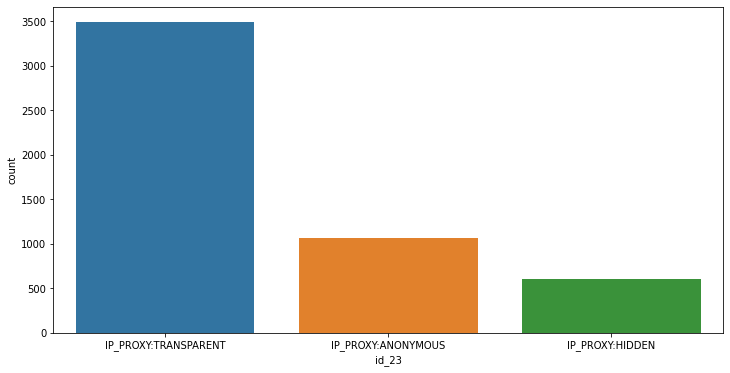

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_identity['id_23'])

In [ ]:
train_identity.fillna({'id_23':'IP_PROXY:ANONYMOUS'}, inplace=True)

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             2.33
id_03            54.02
id_04            54.02
id_05             5.11
id_06             5.11
id_09            48.05
id_10            48.05
id_11             2.26
id_12             0.00
id_13            11.73
id_14            44.50
id_15             2.25
id_16            10.33
id_17             3.37
id_18            68.72
id_19             3.41
id_20             3.45
id_23             0.00
id_28             2.26
id_29             2.26
id_30            46.22
id_31             2.74
id_32            46.21
id_33            49.19
id_34            46.06
id_35             2.25
id_36             2.25
id_37             2.25
id_38             2.25
DeviceType        2.37
DeviceInfo       17.73
dtype: float64

In [ ]:
train_identity[train_identity['id_02'].isna() & train_identity['id_11'].isna() & train_identity['id_15'].isna() & train_identity['id_28'].isna()
 & train_identity['id_29'].isna() & train_identity['id_31'].isna() & train_identity['id_35'].isna() & train_identity['id_36'].isna()
 & train_identity['id_37'].isna() & train_identity['id_38'].isna() & train_identity['DeviceType'].isna()]

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2987108,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2987319,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,2987633,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,2987912,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144127,3576982,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144128,3576983,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144132,3576991,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144144,3577056,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
delete_index = train_identity[train_identity['id_02'].isna() & train_identity['id_11'].isna() & train_identity['id_15'].isna() & train_identity['id_28'].isna()
 & train_identity['id_29'].isna() & train_identity['id_31'].isna() & train_identity['id_35'].isna() & train_identity['id_36'].isna()
 & train_identity['id_37'].isna() & train_identity['id_38'].isna() & train_identity['DeviceType'].isna()].index
train_identity.drop(index = delete_index, inplace=True)

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             0.08
id_03            52.96
id_04            52.96
id_05             2.92
id_06             2.92
id_09            46.86
id_10            46.86
id_11             0.00
id_12             0.00
id_13            12.00
id_14            43.23
id_15             0.00
id_16             8.26
id_17             1.15
id_18            68.00
id_19             1.18
id_20             1.22
id_23             0.00
id_28             0.00
id_29             0.00
id_30            44.98
id_31             0.50
id_32            44.97
id_33            48.02
id_34            44.81
id_35             0.00
id_36             0.00
id_37             0.00
id_38             0.00
DeviceType        0.12
DeviceInfo       15.83
dtype: float64

we are going to have a lot of null data in train_transaction join train_identity
so we better get rid of null columns as much as possible
but we keep columns 30(os),34(match status) because they might be important

In [ ]:
train_identity.drop(['id_03','id_04','id_09','id_10','id_14','id_18','id_32','id_33'],axis=1,inplace=True)

In [ ]:
train_identity['id_30'].value_counts()

Windows 10          21155
Windows 7           13110
iOS 11.2.1           3722
iOS 11.1.2           3699
Android 7.0          2871
                    ...  
func                   10
iOS 11.4.0              5
Mac OS X 10_13_5        4
Windows                 3
iOS 11.4.1              1
Name: id_30, Length: 75, dtype: int64

In [ ]:
windows=0
mac=0
linux=0
ios=0
android=0
other=0
for i in train_identity['id_30']:
  if (pd.isna(i)):
    pass
  elif ('Windows' in i):
    windows+=1
  elif ('Mac' in i):
    mac+=1
  elif ('Linux' in i):
    linux+=1
  elif ('iOS' in i):
    ios+=1
  elif ('Android' in i):
    android+=1
  elif ('other' in i or 'func' in i):
    other+=1
print('windows: ',windows)
print('mac: ',mac)
print('linux: ',linux)
print('ios: ',ios)
print('android: ',android)
print('other: ',other)

windows:  36739
mac:  13580
linux:  1136
ios:  19782
android:  6303
other:  25


In [ ]:
train_identity.fillna({'id_30':'linux'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


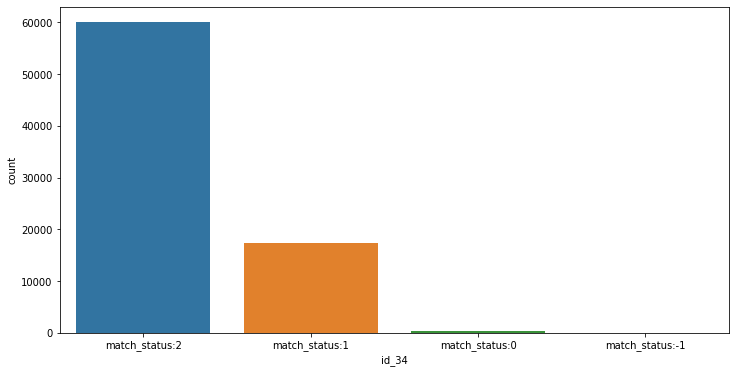

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_identity['id_34'])

In [ ]:
train_identity.fillna({'id_34':'match_status:1'}, inplace=True)

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             0.08
id_05             2.92
id_06             2.92
id_11             0.00
id_12             0.00
id_13            12.00
id_15             0.00
id_16             8.26
id_17             1.15
id_19             1.18
id_20             1.22
id_23             0.00
id_28             0.00
id_29             0.00
id_30             0.00
id_31             0.50
id_34             0.00
id_35             0.00
id_36             0.00
id_37             0.00
id_38             0.00
DeviceType        0.12
DeviceInfo       15.83
dtype: float64

In [ ]:
train_identity[train_identity['id_05'].isna() & train_identity['id_06'].isna() & train_identity['id_17'].isna() & train_identity['id_19'].isna()
 & train_identity['id_20'].isna()]

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
303,2988062,-70.0,70894.0,NaN,NaN,100.000000,NotFound,57.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 62.0 for android,match_status:1,F,F,T,T,mobile,Blade V6 Plus Build/MRA58K
304,2988064,-70.0,400890.0,NaN,NaN,100.000000,NotFound,57.0,Found,Found,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 62.0 for android,match_status:1,F,F,T,T,mobile,Blade V6 Plus Build/MRA58K
336,2988389,-15.0,75604.0,NaN,NaN,90.910004,NotFound,52.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,Windows 7,chrome 62.0,match_status:1,T,F,T,F,desktop,Windows
383,2988749,-15.0,108803.0,NaN,NaN,100.000000,NotFound,52.0,Found,Found,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 62.0,match_status:1,F,F,T,T,desktop,Windows
397,2988823,-15.0,135971.0,NaN,NaN,97.269997,NotFound,52.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,Windows 7,chrome 62.0,match_status:2,T,F,T,F,desktop,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144036,3576423,-15.0,118746.0,NaN,NaN,100.000000,NotFound,52.0,Found,Found,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,Windows 10,ie 11.0 for desktop,match_status:2,T,F,T,T,desktop,Trident/7.0
144056,3576560,-10.0,41910.0,NaN,NaN,100.000000,NotFound,51.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,New,NotFound,Windows 7,chrome 55.0,match_status:2,T,T,T,T,desktop,Windows
144083,3576684,-16.0,71681.0,NaN,NaN,100.000000,NotFound,52.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,New,NotFound,Windows 10,chrome 65.0,match_status:2,T,F,T,F,desktop,Windows
144113,3576874,-15.0,383816.0,NaN,NaN,92.660004,NotFound,52.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,Windows 10,ie 11.0 for tablet,match_status:2,T,F,T,T,desktop,Trident/7.0


In [ ]:
delete_index = train_identity[train_identity['id_05'].isna() & train_identity['id_06'].isna() & train_identity['id_17'].isna() & train_identity['id_19'].isna()
 & train_identity['id_20'].isna()].index
train_identity.drop(index = delete_index, inplace=True)

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             0.00
id_05             1.82
id_06             1.82
id_11             0.00
id_12             0.00
id_13            12.13
id_15             0.00
id_16             8.22
id_17             0.03
id_19             0.06
id_20             0.10
id_23             0.00
id_28             0.00
id_29             0.00
id_30             0.00
id_31             0.18
id_34             0.00
id_35             0.00
id_36             0.00
id_37             0.00
id_38             0.00
DeviceType        0.04
DeviceInfo       15.71
dtype: float64

In [ ]:
train_identity[train_identity['id_13'].isna() & train_identity['id_16'].isna()]

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo


device type is much more important than device info so we can remove device info column

In [ ]:
train_identity.drop(['DeviceInfo'],axis=1,inplace=True)

In [ ]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139406 entries, 0 to 144232
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  139406 non-null  int64  
 1   id_01          139406 non-null  float64
 2   id_02          139405 non-null  float64
 3   id_05          136865 non-null  float64
 4   id_06          136865 non-null  float64
 5   id_11          139406 non-null  float64
 6   id_12          139406 non-null  object 
 7   id_13          122493 non-null  float64
 8   id_15          139406 non-null  object 
 9   id_16          127951 non-null  object 
 10  id_17          139369 non-null  float64
 11  id_19          139318 non-null  float64
 12  id_20          139261 non-null  float64
 13  id_23          139406 non-null  object 
 14  id_28          139406 non-null  object 
 15  id_29          139406 non-null  object 
 16  id_30          139406 non-null  object 
 17  id_31          139161 non-nul

In [ ]:
train_identity.fillna({'id_02':train_identity['id_02'].mean() ,'id_05':train_identity['id_05'].mean() ,'id_06':train_identity['id_06'].mean() ,
                       'id_13':train_identity['id_13'].mean() ,'id_17':train_identity['id_17'].mean() ,
                       'id_19':train_identity['id_19'].mean() ,'id_20':train_identity['id_20'].mean()},inplace=True)

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID    0.00
id_01            0.00
id_02            0.00
id_05            0.00
id_06            0.00
id_11            0.00
id_12            0.00
id_13            0.00
id_15            0.00
id_16            8.22
id_17            0.00
id_19            0.00
id_20            0.00
id_23            0.00
id_28            0.00
id_29            0.00
id_30            0.00
id_31            0.18
id_34            0.00
id_35            0.00
id_36            0.00
id_37            0.00
id_38            0.00
DeviceType       0.04
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


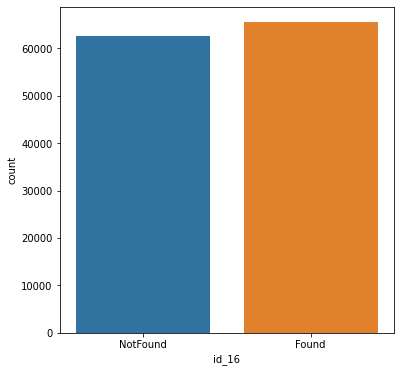

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(train_identity['id_16'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


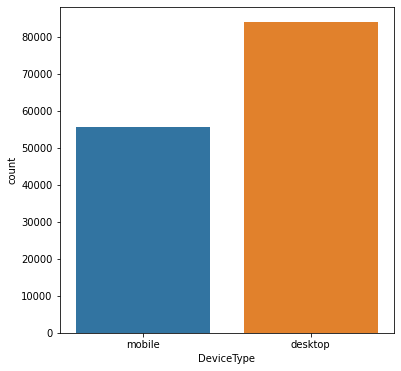

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(train_identity['DeviceType'])

In [ ]:
train_identity.fillna({'id_16':'Found' , 'DeviceType':'desktop' }, inplace=True)

In [ ]:
delete_index = train_identity[train_identity['id_31'].isna()].index
train_identity.drop(index = delete_index, inplace=True)

In [ ]:
train_identity.isna().sum()

TransactionID    0
id_01            0
id_02            0
id_05            0
id_06            0
id_11            0
id_12            0
id_13            0
id_15            0
id_16            0
id_17            0
id_19            0
id_20            0
id_23            0
id_28            0
id_29            0
id_30            0
id_31            0
id_34            0
id_35            0
id_36            0
id_37            0
id_38            0
DeviceType       0
dtype: int64

In [ ]:
train_identity

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType
0,2987004,0.0,70787.0,1.615585,-6.69871,100.0,NotFound,48.885659,New,NotFound,166.0,542.0,144.0,IP_PROXY:ANONYMOUS,New,NotFound,Android 7.0,samsung browser 6.2,match_status:2,T,F,T,T,mobile
1,2987008,-5.0,98945.0,0.000000,-5.00000,100.0,NotFound,49.000000,New,NotFound,166.0,621.0,500.0,IP_PROXY:ANONYMOUS,New,NotFound,iOS 11.1.2,mobile safari 11.0,match_status:1,T,F,F,T,mobile
2,2987010,-5.0,191631.0,0.000000,0.00000,100.0,NotFound,52.000000,Found,Found,121.0,410.0,142.0,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 62.0,match_status:1,F,F,T,T,desktop
3,2987011,-5.0,221832.0,0.000000,-6.00000,100.0,NotFound,52.000000,New,NotFound,225.0,176.0,507.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 62.0,match_status:1,F,F,T,T,desktop
4,2987016,0.0,7460.0,1.000000,0.00000,100.0,NotFound,48.885659,Found,Found,166.0,529.0,575.0,IP_PROXY:ANONYMOUS,Found,Found,Mac OS X 10_11_6,chrome 62.0,match_status:2,T,F,T,T,desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.000000,0.00000,100.0,NotFound,27.000000,Found,Found,225.0,427.0,139.0,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 66.0 for android,match_status:1,F,F,T,F,mobile
144229,3577526,-5.0,172059.0,1.000000,-5.00000,100.0,NotFound,27.000000,New,NotFound,166.0,352.0,333.0,IP_PROXY:ANONYMOUS,New,NotFound,Android 7.1.1,chrome 55.0 for android,match_status:2,T,F,T,F,mobile
144230,3577529,-20.0,632381.0,-1.000000,-36.00000,100.0,NotFound,27.000000,New,NotFound,225.0,567.0,411.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 65.0 for android,match_status:1,F,F,T,F,mobile
144231,3577531,-5.0,55528.0,0.000000,-7.00000,100.0,NotFound,27.000000,Found,Found,166.0,352.0,368.0,IP_PROXY:ANONYMOUS,Found,Found,Mac OS X 10_9_5,chrome 66.0,match_status:2,T,F,T,F,desktop


In [ ]:
train_identity_finalColumns_beforeScaling=train_identity.columns

In [ ]:
train_identity_mean={}
for i in train_identity.columns:
  try:
    train_identity_mean[i]=train_identity[i].mean()
  except:
    train_identity_mean[i]=train_identity[i].mode()[0]

scaling:

In [ ]:
labelencoder=LabelEncoder()
columns=train_identity.columns
for i in range(1,train_identity.shape[1]):
  ind=columns[i]
  if (i==13 or i==16 or i==18 or i==23):
    continue
  if (i==6 or i==8 or i==9 or (i<=22 and i>=19)  or (i<=17 and i>=14)):
    train_identity[ind]=train_identity[ind].astype('str')
    train_identity[ind] = labelencoder.fit_transform(train_identity[ind])
  minn=min(x for x in train_identity[ind] if not pd.isna(x))
  maxx=max(x for x in train_identity[ind] if not pd.isna(x))
  train_identity[ind]=(train_identity[ind]-minn)/(maxx-minn)

In [ ]:
train_identity=(pd.concat([train_identity,pd.get_dummies(train_identity.id_23,prefix='proxy')],axis=1)).drop(['id_23'],axis=1)

In [ ]:
windows=[]
mac=[]
linux=[]
ios=[]
android=[]
other=[]
for i in train_identity['id_30']:
  if (pd.isna(i)):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Windows' in i):
    windows.append(1)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Mac' in i):
    windows.append(0)
    mac.append(1)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Linux' in i or 'linux' in i):
    windows.append(0)
    mac.append(0)
    linux.append(1)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('iOS' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(1)
    android.append(0)
    other.append(0)
  elif ('Android' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(1)
    other.append(0)
  elif ('other' in i or 'func' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(1)

train_identity['isWind']=windows
train_identity['isMac']=mac
train_identity['isLinux']=linux
train_identity['isIOS']=ios
train_identity['isAndroid']=android
train_identity['isOther']=other

version of the os might also be important so:

In [ ]:
train_identity['id_30']=train_identity['id_30'].astype('str')
train_identity['id_30'] = labelencoder.fit_transform(train_identity['id_30'])

In [ ]:
minn=min(x for x in train_identity['id_30'] if not pd.isna(x))
maxx=max(x for x in train_identity['id_30'] if not pd.isna(x))
train_identity['id_30']=(train_identity['id_30']-minn)/(maxx-minn)

In [ ]:
del(windows)
del(mac)
del(ios)
del(linux)
del(android)
del(other)

In [ ]:
train_identity=(pd.concat([train_identity,pd.get_dummies(train_identity.id_34,prefix='')],axis=1)).drop(['id_34'],axis=1)

In [ ]:
train_identity=(pd.concat([train_identity,pd.get_dummies(train_identity.DeviceType,prefix='')],axis=1)).drop(['DeviceType'],axis=1)

In [ ]:
print(train_identity.shape)
train_identity.head()

(139161, 36)


,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
0,2987004,1.00,0.070815,0.593674,0.933013,1.0,1.0,0.720105,0.5,1.0,0.511628,0.774081,0.078431,1.0,1.0,0.093333,0.953488,1.0,0.0,1.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,2987008,0.95,0.098984,0.580645,0.950000,1.0,1.0,0.722222,0.5,1.0,0.511628,0.912434,0.713012,1.0,1.0,0.840000,0.759690,1.0,0.0,0.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2987010,0.95,0.191708,0.580645,1.000000,1.0,1.0,0.777778,0.0,0.0,0.162791,0.542907,0.074866,0.0,0.0,0.986667,0.341085,0.0,0.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,2987011,0.95,0.221921,0.580645,0.940000,1.0,1.0,0.777778,0.5,1.0,0.968992,0.133100,0.725490,1.0,1.0,0.986667,0.341085,0.0,0.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,2987016,1.00,0.007462,0.588710,1.000000,1.0,1.0,0.720105,0.0,0.0,0.511628,0.751313,0.846702,0.0,0.0,0.320000,0.341085,1.0,0.0,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [ ]:
train_identity_finalColumns=train_identity.columns

In [ ]:
(pd.Series(train_identity_finalColumns_beforeScaling,index=train_identity_finalColumns_beforeScaling).to_csv('train_identity_finalColumns_beforeScaling',header=False))

In [ ]:
(pd.Series(train_identity_finalColumns,index=train_identity_finalColumns).to_csv('train_identity_finalColumns',header=False))

In [ ]:
(pd.DataFrame.from_dict(train_identity_mean, orient="index")).to_csv('train_identity_mean',header=False)

# train_transaction preprocessing

In [ ]:
print(train_transaction.shape)
train_transaction.head()

(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#join the two dataframes
train_transaction=train_transaction.set_index('TransactionID').join(train_identity.set_index('TransactionID'))

filling fraud rows with the mean of fraud rows and not fraud rows with the mean of not fraud rows

In [ ]:
train_transaction1=train_transaction[train_transaction['isFraud']==1]
train_transaction0=train_transaction[train_transaction['isFraud']==0]

In [ ]:
for i in range(393,train_transaction.shape[1]):
  ind=train_transaction.columns[i]
  train_transaction0.fillna({ind : train_transaction0[ind].mean()}, inplace=True)
  train_transaction1.fillna({ind : train_transaction1[ind].mean()}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(393):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",round(nullNumbers0[i] * 100 / train_transaction0.shape[0] , 2))
    print(train_transaction1.columns[i]+'_'+str(1),"\t",round(nullNumbers1[i] * 100 / train_transaction1.shape[0] , 2))
    print()


card2_0 	 1.49
card2_1 	 2.05

card3_0 	 0.27
card3_1 	 0.19

card4_0 	 0.27
card4_1 	 0.2

card5_0 	 0.71
card5_1 	 1.02

card6_0 	 0.27
card6_1 	 0.19

addr1_0 	 10.17
addr1_1 	 37.46

addr2_0 	 10.17
addr2_1 	 37.46

dist1_0 	 59.02
dist1_1 	 76.99

dist2_0 	 94.05
dist2_1 	 81.94

P_emaildomain_0 	 16.09
P_emaildomain_1 	 13.5

R_emaildomain_0 	 77.88
R_emaildomain_1 	 45.67

D1_0 	 0.21
D1_1 	 0.22

D2_0 	 47.03
D2_1 	 61.91

D3_0 	 44.19
D3_1 	 53.45

D4_0 	 28.57
D4_1 	 29.5

D5_0 	 52.65
D5_1 	 47.35

D6_0 	 88.51
D6_1 	 62.65

D7_0 	 94.19
D7_1 	 71.98

D8_0 	 88.23
D8_1 	 62.12

D9_0 	 88.23
D9_1 	 62.12

D10_0 	 12.66
D10_1 	 18.81

D11_0 	 46.45
D11_1 	 70.45

D12_0 	 89.98
D12_1 	 63.23

D13_0 	 90.33
D13_1 	 66.91

D14_0 	 90.35
D14_1 	 65.09

D15_0 	 14.89
D15_1 	 20.69

M1_0 	 45.06
M1_1 	 69.31

M2_0 	 45.06
M2_1 	 69.31

M3_0 	 45.06
M3_1 	 69.31

M4_0 	 48.47
M4_1 	 25.3

M5_0 	 59.2
M5_1 	 63.37

M6_0 	 27.62
M6_1 	 57.93

M7_0 	 57.98
M7_1 	 76.69

M8_0 	 57.98
M8_

In [ ]:
for i in range(322,340):
  train_transaction0.drop('V'+str(i),axis=1,inplace=True)
  train_transaction1.drop('V'+str(i),axis=1,inplace=True)
for i in range(138,167):
  train_transaction0.drop('V'+str(i),axis=1,inplace=True)
  train_transaction1.drop('V'+str(i),axis=1,inplace=True)
train_transaction0.drop('dist2',axis=1,inplace=True)
train_transaction1.drop('dist2',axis=1,inplace=True)

train_transaction0.drop('D7',axis=1,inplace=True)
train_transaction1.drop('D7',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


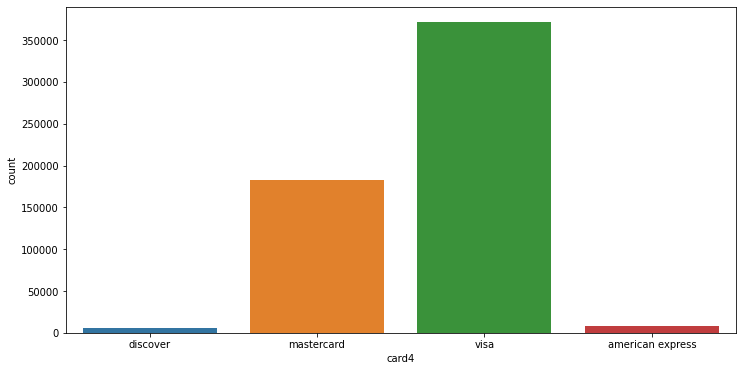

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_transaction0['card4'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


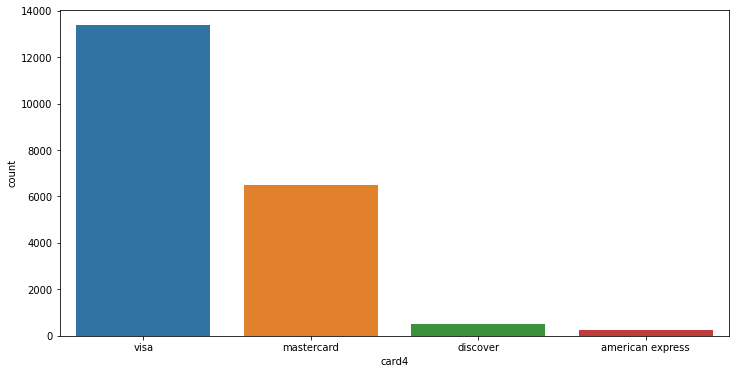

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_transaction1['card4'])

In [ ]:
train_transaction0.fillna({'card4':'visa'}, inplace=True)
train_transaction1.fillna({'card4':'visa'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


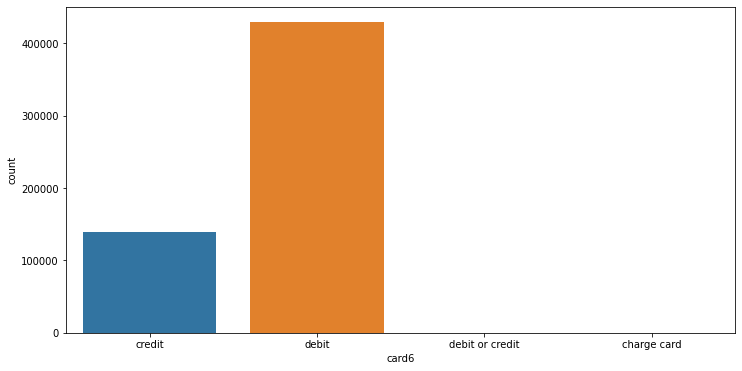

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_transaction0['card6'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


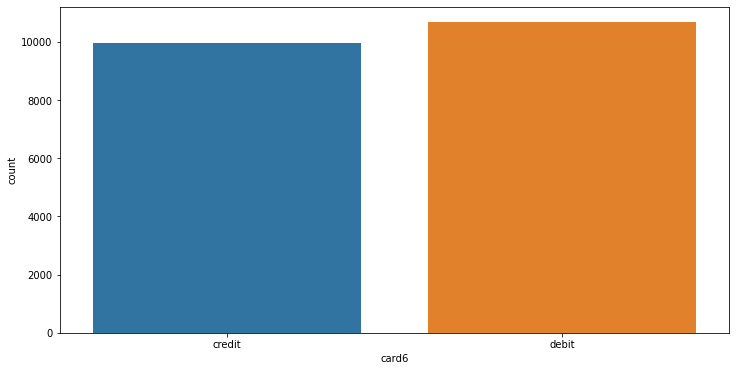

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_transaction1['card6'])

In [ ]:
train_transaction0.fillna({'card6':'debit'}, inplace=True)
train_transaction1.fillna({'card6':'debit'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['P_emaildomain'].value_counts()

gmail.com           218412
yahoo.com            98637
hotmail.com          42854
anonymous.com        36139
aol.com              27672
comcast.net           7642
icloud.com            6070
outlook.com           4614
att.net               4003
msn.com               4002
sbcglobal.net         2958
live.com              2957
verizon.net           2683
ymail.com             2346
bellsouth.net         1856
yahoo.com.mx          1527
me.com                1495
cox.net               1364
optonline.net          994
charter.net            791
live.com.mx            708
rocketmail.com         662
earthlink.net          503
gmail                  485
mail.com               453
mac.com                422
outlook.es             381
juno.com               316
windstream.net         305
roadrunner.com         302
hotmail.fr             295
hotmail.es             285
aim.com                275
frontier.com           272
embarqmail.com         251
web.de                 240
netzero.com            230
t

In [ ]:
train_transaction1['P_emaildomain'].value_counts()

gmail.com          9943
hotmail.com        2396
yahoo.com          2297
anonymous.com       859
aol.com             617
outlook.com         482
comcast.net         246
icloud.com          197
mail.com            106
msn.com              90
live.com             84
outlook.es           57
bellsouth.net        53
ymail.com            50
live.com.mx          41
aim.com              40
protonmail.com       31
att.net              30
cox.net              29
me.com               27
charter.net          25
verizon.net          22
hotmail.es           20
optonline.net        17
yahoo.com.mx         16
mac.com              14
sbcglobal.net        12
gmail                11
earthlink.net        11
embarqmail.com        9
frontier.com          8
juno.com              6
yahoo.fr              5
frontiernet.net       5
suddenlink.net        4
cableone.net          3
roadrunner.com        3
rocketmail.com        2
yahoo.es              2
sc.rr.com             1
netzero.net           1
prodigy.net.mx  

In [ ]:
train_transaction0.fillna({'P_emaildomain':'yahoo.com'}, inplace=True)
train_transaction1.fillna({'P_emaildomain':'hotmail.com'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['R_emaildomain'].value_counts()

gmail.com           50336
hotmail.com         25369
anonymous.com       19931
yahoo.com           11232
aol.com              3572
outlook.com          2093
comcast.net          1791
yahoo.com.mx         1492
icloud.com           1218
msn.com               851
live.com              724
live.com.mx           710
verizon.net           620
sbcglobal.net         551
me.com                545
cox.net               448
att.net               430
bellsouth.net         420
outlook.es            376
hotmail.fr            293
hotmail.es            272
web.de                237
mac.com               216
prodigy.net.mx        206
ymail.com             199
optonline.net         185
gmx.de                147
yahoo.fr              132
charter.net           122
hotmail.co.uk         105
gmail                  95
mail.com               76
yahoo.de               75
earthlink.net          73
embarqmail.com         68
rocketmail.com         66
scranton.edu           63
yahoo.es               55
live.fr     

In [ ]:
train_transaction1['R_emaildomain'].value_counts()

gmail.com         6811
hotmail.com       2140
yahoo.com          610
anonymous.com      598
outlook.com        414
icloud.com         180
aol.com            129
outlook.es          57
mail.com            46
live.com.mx         44
protonmail.com      39
live.com            38
comcast.net         21
hotmail.es          20
yahoo.com.mx        16
me.com              11
cox.net             11
ymail.com            8
earthlink.net        6
yahoo.fr             5
charter.net          5
rocketmail.com       3
yahoo.es             2
netzero.net          2
optonline.net        2
bellsouth.net        2
mac.com              2
msn.com              1
aim.com              1
sbcglobal.net        1
suddenlink.net       1
prodigy.net.mx       1
Name: R_emaildomain, dtype: int64

In [ ]:
train_transaction0.fillna({'R_emaildomain':'anonymous.com'}, inplace=True)
train_transaction1.fillna({'R_emaildomain':'gmail.com'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M1'].value_counts()

T    313073
F        25
Name: M1, dtype: int64

In [ ]:
train_transaction1['M1'].value_counts()

T    6342
Name: M1, dtype: int64

In [ ]:
train_transaction0.fillna({'M1':'F'}, inplace=True)
train_transaction1.fillna({'M1':'T'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M2'].value_counts()

T    280310
F     32788
Name: M2, dtype: int64

In [ ]:
train_transaction1['M2'].value_counts()

T    5158
F    1184
Name: M2, dtype: int64

In [ ]:
train_transaction0.fillna({'M2':'T'}, inplace=True)
train_transaction1.fillna({'M2':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M3'].value_counts()

T    247438
F     65660
Name: M3, dtype: int64

In [ ]:
train_transaction1['M3'].value_counts()

T    4293
F    2049
Name: M3, dtype: int64

In [ ]:
train_transaction0.fillna({'M3':'T'}, inplace=True)
train_transaction1.fillna({'M3':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M4'].value_counts()

M0    189207
M2     53056
M1     51397
Name: M4, dtype: int64

In [ ]:
train_transaction1['M4'].value_counts()

M0    7198
M2    6809
M1    1429
Name: M4, dtype: int64

In [ ]:
train_transaction0.fillna({'M4':'M1'}, inplace=True)
train_transaction1.fillna({'M4':'M2'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M5'].value_counts()

F    128977
T    103512
Name: M5, dtype: int64

In [ ]:
train_transaction1['M5'].value_counts()

T    4055
F    3514
Name: M5, dtype: int64

In [ ]:
train_transaction0.fillna({'M5':'F'}, inplace=True)
train_transaction1.fillna({'M5':'T'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M6'].value_counts()

F    222459
T    190029
Name: M6, dtype: int64

In [ ]:
train_transaction1['M6'].value_counts()

F    5397
T    3295
Name: M6, dtype: int64

In [ ]:
train_transaction0.fillna({'M6':'T'}, inplace=True)
train_transaction1.fillna({'M6':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M7'].value_counts()

F    207285
T     32173
Name: M7, dtype: int64

In [ ]:
train_transaction1['M7'].value_counts()

F    4089
T     728
Name: M7, dtype: int64

In [ ]:
train_transaction0.fillna({'M7':'F'}, inplace=True)
train_transaction1.fillna({'M7':'T'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M8'].value_counts()

F    151878
T     87593
Name: M8, dtype: int64

In [ ]:
train_transaction1['M8'].value_counts()

F    3373
T    1444
Name: M8, dtype: int64

In [ ]:
train_transaction0.fillna({'M8':'T'}, inplace=True)
train_transaction1.fillna({'M8':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M9'].value_counts()

T    201998
F     37473
Name: M9, dtype: int64

In [ ]:
train_transaction1['M9'].value_counts()

T    3658
F    1159
Name: M9, dtype: int64

In [ ]:
train_transaction0.fillna({'M9':'T'}, inplace=True)
train_transaction1.fillna({'M9':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(364):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",nullNumbers0[i])
    print(train_transaction1.columns[i]+'_'+str(1),"\t",nullNumbers1[i])
    print()


card2_0 	 8510
card2_1 	 423

card3_0 	 1526
card3_1 	 39

card5_0 	 4049
card5_1 	 210

addr1_0 	 57965
addr1_1 	 7741

addr2_0 	 57965
addr2_1 	 7741

dist1_0 	 336363
dist1_1 	 15908

D1_0 	 1223
D1_1 	 46

D2_0 	 268004
D2_1 	 12793

D3_0 	 251834
D3_1 	 11044

D4_0 	 162826
D4_1 	 6096

D5_0 	 300058
D5_1 	 9783

D6_0 	 504408
D6_1 	 12945

D8_0 	 502778
D8_1 	 12836

D9_0 	 502778
D9_1 	 12836

D10_0 	 72136
D10_1 	 3886

D11_0 	 264730
D11_1 	 14557

D12_0 	 512758
D12_1 	 13065

D13_0 	 514762
D13_1 	 13826

D14_0 	 514903
D14_1 	 13450

D15_0 	 84837
D15_1 	 4276

V1_0 	 264730
V1_1 	 14557

V2_0 	 264730
V2_1 	 14557

V3_0 	 264730
V3_1 	 14557

V4_0 	 264730
V4_1 	 14557

V5_0 	 264730
V5_1 	 14557

V6_0 	 264730
V6_1 	 14557

V7_0 	 264730
V7_1 	 14557

V8_0 	 264730
V8_1 	 14557

V9_0 	 264730
V9_1 	 14557

V10_0 	 264730
V10_1 	 14557

V11_0 	 264730
V11_1 	 14557

V12_0 	 72186
V12_1 	 3887

V13_0 	 72186
V13_1 	 3887

V14_0 	 72186
V14_1 	 3887

V15_0 	 72186
V15_1 	 38

In [ ]:
a=train_transaction0['V295'].isna()
b=train_transaction1['V295'].isna()
for i in range(295,322):
  try:
    if (nullNumbers0['V'+str(i)]==10  and nullNumbers1['V'+str(i)]==2):
      a=a&(train_transaction0['V'+str(i)].isna())
      b=b&(train_transaction1['V'+str(i)].isna())
  except:
    pass
train_transaction0[a]

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3010947,0,606971,139.944,C,12616,490.0,150.0,visa,NaN,credit,NaN,NaN,NaN,hotmail.com,hotmail.com,3.0,6.0,0.0,3.0,0.0,3.0,3.0,5.0,0.0,5.0,5.0,5.0,6.0,3.0,498.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3014325,0,686866,10.950,W,12616,490.0,150.0,visa,NaN,credit,325.0,87.0,NaN,gmail.com,anonymous.com,260.0,237.0,0.0,0.0,86.0,292.0,0.0,0.0,156.0,0.0,219.0,1.0,485.0,158.0,506.0,NaN,NaN,9.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3015721,0,738846,30.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,NaN,gmail.com,anonymous.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,120.0,6.0,210.0,210.0,2.0,22.0,2.0,NaN,NaN,NaN,141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3015734,0,739153,39.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,7.0,gmail.com,anonymous.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,121.0,6.0,210.0,210.0,0.0,22.0,0.0,NaN,NaN,NaN,141.0,265.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3015752,0,739505,30.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,NaN,gmail.com,anonymous.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,121.0,6.0,210.0,210.0,0.0,22.0,0.0,NaN,NaN,NaN,141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3015764,0,739690,39.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,7.0,gmail.com,anonymous.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,122.0,6.0,210.0,210.0,0.0,22.0,0.0,NaN,NaN,NaN,141.0,265.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3018095,0,771123,20.988,C,12616,490.0,150.0,visa,NaN,cred

In [ ]:
delete_index = train_transaction0[a].index
train_transaction0.drop(index = delete_index, inplace=True)
delete_index = train_transaction1[b].index
train_transaction1.drop(index = delete_index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
a=train_transaction0['V95'].isna()
for i in range(95,322):
  try:
    if (nullNumbers0['V'+str(i)]==297  and nullNumbers1['V'+str(i)]==17):
      a=a&(train_transaction0['V'+str(i)].isna())
  except:
    pass
train_transaction0[a]

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3427618,0,11187972,57.950,W,6530,206.0,150.0,mastercard,126.0,debit,191.0,87.0,126.0,anonymous.com,anonymous.com,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,4.0,1.0,153.0,153.0,45.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3434742,0,11400049,107.950,W,6804,555.0,150.0,visa,226.0,debit,327.0,87.0,NaN,gmail.com,anonymous.com,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3434780,0,11400724,335.000,W,12766,512.0,150.0,mastercard,224.0,debit,272.0,87.0,12.0,gmail.com,anonymous.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,25.0,25.0,25.0,25.0,25.0,NaN,NaN,NaN,25.0,25.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3434805,0,11401168,26.621,C,11837,304.0,146.0,visa,226.0,credit,NaN,NaN,NaN,web.de,web.de,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.900000,0.270962,0.588710,1.000000,1.000000,1.000000,1.00000,0.50000,1.000000,0.968992,0.133100,0.882353,1.00000,1.000000,0.986667,0.410853,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
3442762,0,11653247,57.950,W,9234,555.0,150.0,mastercard,224.0,debit,253.0,87.0,0.0,yahoo.com,anonymous.com,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,13.0,2.0,364.0,364.0,216.0,364.0,83.0,NaN,NaN,NaN,519.0,419.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509785,0,13730343,20.288,C,2801,130.0,185.0,visa,137.0,credit,NaN,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.800000,0.254459,0.580645,1.000000,1.000000,1.000000,1.00000,1.000

In [ ]:
delete_index = train_transaction0[a].index
train_transaction0.drop(index = delete_index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
for i in range(95,322):
  try:
    if (nullNumbers1['V'+str(i)]==17):
      train_transaction1.fillna({'V'+str(i): train_transaction1['V'+str(i)].mean() }, inplace=True)
  except:
    pass


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
for i in range(train_transaction0.shape[1]):
  ind = train_transaction0.columns[i]
  if (round(train_transaction0[ind].isna().sum() * 100 / train_transaction0.shape[0] , 2)>70 and
      round(train_transaction1[ind].isna().sum() * 100 / train_transaction1.shape[0] , 2)>45):
    train_transaction0.fillna({ind:0} , inplace=True)
    train_transaction1.fillna({ind:train_transaction0[ind].mode()[0]} , inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
delete_columns=[]
for i in range(train_transaction0.shape[1]):
  ind = train_transaction0.columns[i]
  if (round(train_transaction0[ind].isna().sum() * 100 / train_transaction0.shape[0] , 2)>45 and
      round(train_transaction1[ind].isna().sum() * 100 / train_transaction1.shape[0] , 2)>70):
    delete_columns.append(ind)

In [ ]:
train_transaction0.drop(delete_columns,axis=1,inplace=True)
train_transaction1.drop(delete_columns,axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
a=train_transaction0['card2'].isna()
for i in range(train_transaction0.shape[1]):
  ind = train_transaction0.columns[i]
  if (round(train_transaction0[ind].isna().sum() * 100 / train_transaction0.shape[0] , 2)<20 and
      round(train_transaction1[ind].isna().sum() * 100 / train_transaction1.shape[0] , 2)<20):
    train_transaction0.drop( train_transaction0[train_transaction0[ind].isna()].index,inplace=True )
    train_transaction1.drop( train_transaction1[train_transaction1[ind].isna()].index,inplace=True )


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(364):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",round(nullNumbers0[i]* 100 / train_transaction0.shape[0] , 2))
    print(train_transaction1.columns[i]+'_'+str(1),"\t",round(nullNumbers1[i]* 100 / train_transaction1.shape[0] , 2))
    print()


addr1_0 	 13.03
addr1_1 	 46.26

addr2_0 	 13.03
addr2_1 	 46.26

D2_0 	 42.83
D2_1 	 57.16

D3_0 	 37.82
D3_1 	 41.79

D5_0 	 33.38
D5_1 	 24.69



In [ ]:
train_transaction0['D3'].mode()

0    0.0
dtype: float64

In [ ]:
train_transaction0.fillna({'D5':train_transaction0['D5'].mean()},inplace=True)
train_transaction1.fillna({'D5':train_transaction1['D5'].mean()},inplace=True)
train_transaction0.fillna({'addr1':train_transaction0['addr1'].mean()},inplace=True)
train_transaction1.fillna({'addr1':train_transaction1['addr1'].mode()[0]},inplace=True)
train_transaction0.fillna({'addr2':train_transaction0['addr2'].mean()},inplace=True)
train_transaction1.fillna({'addr2':train_transaction1['addr2'].mode()[0]},inplace=True)
train_transaction0.fillna({'D2':train_transaction0['D2'].mean()},inplace=True)
train_transaction1.fillna({'D2':train_transaction1['D2'].mode()[0]},inplace=True)
train_transaction0.fillna({'D3':train_transaction0['D3'].mean()},inplace=True)
train_transaction1.fillna({'D3':train_transaction1['D3'].mean()},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(364):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",round(nullNumbers0[i]* 100 / train_transaction0.shape[0] , 2))
    print(train_transaction1.columns[i]+'_'+str(1),"\t",round(nullNumbers1[i]* 100 / train_transaction1.shape[0] , 2))
    print()


Now we have no null data

In [ ]:
train_transaction=pd.concat((train_transaction0,train_transaction1))

In [ ]:
train_transaction.isna().sum().sum()

0

In [ ]:
del(train_transaction0)
del(train_transaction1)

In [ ]:
#df1 = pd.DataFrame(data={5:[1,0,0,0,1],4:[4,5,None,6,2],6:[None,None,7,8,3]})
#df2 = pd.DataFrame(data={5:[1,0,0,0,1],4:[4,5,None,6,2],6:[None,None,7,8,3]})
#df = pd.concat((df1,df2),axis=0)
#print (df)
#df1=df[df['a']==1]
#df2=df.loc[df['a']==0]
#df2.fillna({'c':df2['c'].mean()},inplace=True)
#print (df1)
#df=pd.concat((df1,df2))
#train_transaction[(train_transaction['isFraud']==1)]['card1']

In [ ]:
print(train_transaction.shape)
train_transaction.head()

(403838, 366)


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,anonymous.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,169.526599,29.620166,0.0,42.694892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,anonymous.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.526599,29.620166,0.0,42.694892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,anonymous.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.000000,0.000000,94.0,0.000000,0.0,0.0,0.0,84.0,0.0,0.0,0.0,...,1404.0,790.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,gmail.com,anonymous.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.526599,29.620166,0.0,42.694892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,yahoo.com,anonymous.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.526599,29.620166,0.0,42.694892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404


In [ ]:
train_transaction_finalColumns_beforeScaling=train_transaction.columns

In [ ]:
train_transaction_mean={}
for i in train_transaction.columns:
  try:
    train_transaction_mean[i]=train_transaction[i].mean()
  except:
    train_transaction_mean[i]=train_transaction[i].mode()[0]

scaling

In [ ]:
train_transaction.columns[330]

'V321'

In [ ]:
#3 W,H->oneHot
#7 discover ,mastercard, visa ,american express,->oneHot
#9 credit,debit,credit or debit,charge card->oneHot
#12,13 labelEncoding
#41-49 T,F-> labelEncoding
columns=train_transaction.columns
for i in range(1,331):
  ind=columns[i]
  if (i==3 or i==7 or i==9 ):
    continue
  if (i==12 or i==13 or (i<=49 and i>=41)):
    train_transaction[ind]=train_transaction[ind].astype('str')
    train_transaction[ind] = labelencoder.fit_transform(train_transaction[ind])
  minn=min(x for x in train_transaction[ind] if not pd.isna(x))
  maxx=max(x for x in train_transaction[ind] if not pd.isna(x))
  train_transaction[ind]=(train_transaction[ind]-minn)/(maxx-minn)



In [ ]:
print(train_transaction.shape)
train_transaction.head()

(403838, 366)


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987001,0,0.000000,0.000900,W,0.100891,0.608,0.381679,mastercard,0.014599,credit,0.511364,0.831461,0.275862,0.018868,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,...,0.000000,0.000000,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987002,0,0.000004,0.001840,W,0.210578,0.780,0.381679,visa,0.481752,debit,0.522727,0.831461,0.603448,0.018868,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,...,0.000000,0.000000,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987003,0,0.000006,0.001558,W,0.984881,0.934,0.381679,mastercard,0.124088,debit,0.854545,0.831461,0.913793,0.018868,0.000514,0.001656,0.0,0.0,0.0,0.002553,0.0,0.0,0.004762,0.0,0.0,0.0,0.014758,0.001266,0.175274,0.175274,0.000000,0.192872,0.0000,0.089633,0.0,0.0,0.099644,0.113543,0.0,0.089633,...,0.021981,0.012368,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987005,0,0.000007,0.001526,W,0.283817,0.910,0.381679,visa,0.919708,debit,0.390909,0.831461,0.275862,0.018868,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,...,0.000000,0.000000,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987006,0,0.000008,0.004971,W,0.650072,0.520,0.381679,visa,0.481752,debit,0.059091,0.831461,0.913793,0.018868,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,...,0.000000,0.000000,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404


In [ ]:
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.ProductCD,prefix='cd')],axis=1)).drop(['ProductCD'],axis=1)

In [ ]:
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.card4,prefix='card4')],axis=1)).drop(['card4'],axis=1)

In [ ]:
credit=[]
debit=[]
charge=[]
for i in train_transaction['card6']:
  if i=='credit':
    credit.append(1)
    debit.append(0)
    charge.append(0)
  elif i=='debit':
    credit.append(0)
    debit.append(1)
    charge.append(0)
  elif i=='debit or credit':
    credit.append(0.5)
    debit.append(0.5)
    charge.append(0)
  elif i=='charge card':
    credit.append(0)
    debit.append(0)
    charge.append(1)

train_transaction['credit']=credit
train_transaction['debit']=debit
train_transaction['charge_card']=charge
train_transaction=train_transaction.drop(['card6'],axis=1)

In [ ]:
del(credit)
del(debit)
del(charge)

In [ ]:
print(train_transaction.shape)
train_transaction.head()

(403838, 374)


,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,M1,M2,...,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile,cd_C,cd_H,cd_R,cd_W,card4_american express,card4_discover,card4_mastercard,card4_visa,credit,debit,charge_card
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987001,0,0.000000,0.000900,0.100891,0.608,0.381679,0.014599,0.511364,0.831461,0.275862,0.018868,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,0.087645,0.0,1.0,...,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404,0,0,0,1,0,0,1,0,1.0,0.0,0
2987002,0,0.000004,0.001840,0.210578,0.780,0.381679,0.481752,0.522727,0.831461,0.603448,0.018868,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,0.420275,1.0,1.0,...,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404,0,0,0,1,0,0,0,1,0.0,1.0,0
2987003,0,0.000006,0.001558,0.984881,0.934,0.381679,0.124088,0.854545,0.831461,0.913793,0.018868,0.000514,0.001656,0.0,0.0,0.0,0.002553,0.0,0.0,0.004762,0.0,0.0,0.0,0.014758,0.001266,0.175274,0.175274,0.000000,0.192872,0.0000,0.089633,0.0,0.0,0.099644,0.113543,0.0,0.089633,0.204857,0.0,1.0,...,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404,0,0,0,1,0,0,1,0,0.0,1.0,0
2987005,0,0.000007,0.001526,0.283817,0.910,0.381679,0.919708,0.390909,0.831461,0.275862,0.018868,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,0.087645,1.0,1.0,...,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404,0,0,0,1,0,0,0,1,0.0,1.0,0
2987006,0,0.000008,0.004971,0.650072,0.520,0.381679,0.481752,0.059091,0.831461,0.913793,0.018868,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,0.087645,1.0,1.0,...,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404,0,0,0,1,0,0,0,1,0.0,1.0,0


In [ ]:
train_transaction=train_transaction.astype('float32')

In [ ]:
trainY=np.array(train_transaction['isFraud'])
train_transaction.drop(['isFraud'],axis=1,inplace=True)

In [ ]:
train_transaction_finalColumns=train_transaction.columns

In [ ]:
trainX=(train_transaction).to_numpy(dtype='float32')

In [ ]:
trainY=to_categorical(trainY)

In [ ]:
trainY.sum(axis=0)

array([390918.,  12920.], dtype=float32)

In [ ]:
classTotals = trainY.sum(axis=0)
classWeight = classTotals.max() / classTotals
print(classWeight)

[ 1.       30.256811]


In [ ]:
classWeight={i:classWeight[i] for i in range (classWeight.size)}
print(classWeight)

{0: 1.0, 1: 30.256811}


In [ ]:
(pd.Series(train_transaction_finalColumns,index=train_transaction_finalColumns).to_csv('train_transaction_finalColumns',header=False))

In [ ]:
(pd.Series(train_transaction_finalColumns_beforeScaling,index=train_transaction_finalColumns_beforeScaling).to_csv('train_transaction_finalColumns_beforeScaling',header=False))

In [ ]:
trainx,validx,trainy,validy=train_test_split(trainX,trainY,test_size=0.2)

In [ ]:
del (train_transaction)
del (trainX)
del (train_identity)

In [ ]:
(pd.DataFrame.from_dict(train_transaction_mean, orient="index")).to_csv('train_transaction_mean',header=False)

# Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=1)
lrr = ReduceLROnPlateau(monitor='val_accuracy',factor=.01,patience=2,min_lr=1e-5)

In [ ]:
print(trainx.shape)
print(trainy.shape)

(323070, 373)
(323070, 2)


# Building Models

## Model1

In [ ]:
encoder_input = Input(trainx.shape[1],name = 'input_encoder')
encoder = Dense(700, activation='tanh',name = 'encoder_layer1')(encoder_input)
encoder = Dense(400, activation='relu',name = 'encoder_layer2')(encoder)
encoder = Dropout(0.3 , name = 'encoder_layer3')(encoder)
encoder = BatchNormalization(name = 'encoder_layer4')(encoder)
encoder = Dense(200, activation='relu',name = 'encoder_layer5')(encoder)
encoder = Dense(100, activation='relu',name = 'encoder_layer6')(encoder)
encoder_output = Dense(60, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')

In [ ]:
decoder_input = Input(60,name = 'input_decoder')
decoder = Dense(100, activation='tanh',name = 'decoder_layer1')(decoder_input)
decoder = Dense(200, activation='tanh',name = 'decoder_layer2')(decoder_input)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.3 , name = 'decoder_layer4')(decoder)
decoder = Dense(400, activation='relu',name = 'decoder_layer5')(decoder)
decoder = Dense(700, activation='relu',name = 'decoder_layer6')(decoder)
decoder_output = Dense(trainx.shape[1],activation = 'sigmoid',name ='output_decoder')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')

In [ ]:
autoencoder_input = Input(trainx.shape[1],name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

In [ ]:
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')
autoencoder.compile(optimizer=SGD(lr=0.01,momentum=0.9), loss='mae')

In [ ]:
history = autoencoder.fit(x=trainx,y=trainx,validation_data=([validx],validx),batch_size = 256,epochs= 100,verbose=1,callbacks=[es],shuffle=True)

Epoch 1/100
1262/1262 [==============================] - 7s 5ms/step - loss: 0.1836 - val_loss: 0.0283
Epoch 2/100
1262/1262 [==============================] - 6s 5ms/step - loss: 0.0312 - val_loss: 0.0261
Epoch 3/100
1262/1262 [==============================] - 6s 5ms/step - loss: 0.0291 - val_loss: 0.0251
Epoch 4/100
1262/1262 [==============================] - 6s 5ms/step - loss: 0.0277 - val_loss: 0.0241
Epoch 5/100
1262/1262 [==============================] - 6s 5ms/step - loss: 0.0266 - val_loss: 0.0234
Epoch 6/100
1262/1262 [==============================] - 6s 5ms/step - loss: 0.0258 - val_loss: 0.0231
Epoch 7/100
1262/1262 [==============================] - 6s 5ms/step - loss: 0.0253 - val_loss: 0.0228
Epoch 8/100
1262/1262 [==============================] - 6s 5ms/step - loss: 0.0248 - val_loss: 0.0223
Epoch 9/100
1262/1262 [==============================] - 6s 5ms/step - loss: 0.0244 - val_loss: 0.0220
Epoch 10/100
1262/1262 [==============================] - 6s 5ms/step - l

In [ ]:
autoencoder.save("MNIST_model.h5")

In [ ]:
Encoder.save("MNIST_model_encoder.h5")

## Model2

In [ ]:
encoder_input = Input(trainx.shape[1],name = 'input_encoder')
encoder = Dense(700, activation='relu',name = 'encoder_layer1')(encoder_input)
encoder = Dense(400, activation='relu',name = 'encoder_layer2')(encoder)
encoder = Dropout(0.3 , name = 'encoder_layer3')(encoder)
encoder = BatchNormalization(name = 'encoder_layer4')(encoder)
encoder = Dense(200, activation='relu',name = 'encoder_layer5')(encoder)
encoder = Dense(100, activation='relu',name = 'encoder_layer6')(encoder)
encoder_output = Dense(40, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')

In [ ]:
decoder_input = Input(40,name = 'input_decoder')
decoder = Dense(100, activation='relu',name = 'decoder_layer1')(decoder_input)
decoder = Dense(200, activation='relu',name = 'decoder_layer2')(decoder_input)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.3 , name = 'decoder_layer4')(decoder)
decoder = Dense(400, activation='relu',name = 'decoder_layer5')(decoder)
decoder = Dense(700, activation='relu',name = 'decoder_layer6')(decoder)
decoder_output = Dense(trainx.shape[1],activation = 'sigmoid',name ='output_decoder')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')

In [ ]:
autoencoder_input = Input(trainx.shape[1],name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

In [ ]:
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')
autoencoder.compile(optimizer=SGD(lr=0.03), loss='mae')

In [ ]:
history2 = autoencoder.fit(x=trainx,y=trainx,validation_data=([validx],validx),batch_size = 128,epochs= 100,verbose=1,callbacks=[es])

Epoch 1/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.2363 - val_loss: 0.0347
Epoch 2/100
2524/2524 [==============================] - 10s 4ms/step - loss: 0.0339 - val_loss: 0.0285
Epoch 3/100
2524/2524 [==============================] - 10s 4ms/step - loss: 0.0304 - val_loss: 0.0266
Epoch 4/100
2524/2524 [==============================] - 10s 4ms/step - loss: 0.0289 - val_loss: 0.0257
Epoch 5/100
2524/2524 [==============================] - 10s 4ms/step - loss: 0.0280 - val_loss: 0.0251
Epoch 6/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0274 - val_loss: 0.0247
Epoch 7/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0269 - val_loss: 0.0244
Epoch 8/100
2524/2524 [==============================] - 10s 4ms/step - loss: 0.0265 - val_loss: 0.0240
Epoch 9/100
2524/2524 [==============================] - 10s 4ms/step - loss: 0.0261 - val_loss: 0.0238
Epoch 10/100
2524/2524 [==============================] - 11s 4m

## Model3 (non-symetric)

In [ ]:
encoder_input = Input(trainx.shape[1],name = 'input_encoder')
encoder = Dense(1000, activation='sigmoid',name = 'encoder_layer1')(encoder_input)
encoder = Dense(800, activation='relu',name = 'encoder_layer2')(encoder)
encoder = Dropout(0.1 , name = 'encoder_layer3')(encoder)
encoder = BatchNormalization(name = 'encoder_layer4')(encoder)
encoder = Dense(400, activation='relu',name = 'encoder_layer5')(encoder)
encoder = Dense(200, activation='relu',name = 'encoder_layer6')(encoder)
encoder_output = Dense(100, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')

In [ ]:
decoder_input = Input(100,name = 'input_decoder')
decoder = Dense(100, activation='relu',name = 'decoder_layer1')(decoder_input)
decoder = Dense(200, activation='relu',name = 'decoder_layer2')(decoder_input)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.1 , name = 'decoder_layer4')(decoder)
decoder = Dense(400, activation='relu',name = 'decoder_layer5')(decoder)
decoder = Dense(700, activation='relu',name = 'decoder_layer6')(decoder)
decoder_output = Dense(trainx.shape[1],activation = 'sigmoid',name ='output_decoder')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')

In [ ]:
autoencoder_input = Input(trainx.shape[1],name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

In [ ]:
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')
autoencoder.compile(optimizer=SGD(lr=0.01,momentum=0.99), loss='mae')

In [ ]:
history = autoencoder.fit(x=trainx,y=trainx,validation_data=([validx],validx),batch_size = 128,epochs= 100,verbose=1,callbacks=[es])

Epoch 1/100
2524/2524 [==============================] - 12s 4ms/step - loss: 0.0933 - val_loss: 0.0312
Epoch 2/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0284 - val_loss: 0.0250
Epoch 3/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0245 - val_loss: 0.0236
Epoch 4/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0229 - val_loss: 0.0220
Epoch 5/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0215 - val_loss: 0.0204
Epoch 6/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0207 - val_loss: 0.0204
Epoch 7/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 8/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0198 - val_loss: 0.0193
Epoch 9/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0195 - val_loss: 0.0192
Epoch 10/100
2524/2524 [==============================] - 11s 4m

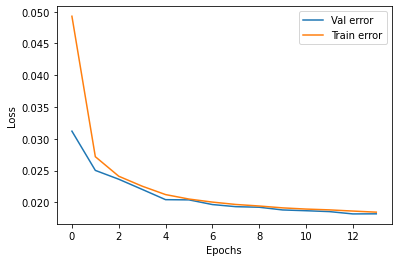

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

The model improved

In [ ]:
autoencoder.save("MNIST_model.h5")
Encoder.save("MNIST_model_encoder.h5")

## Model4 (The best model)

In [ ]:
encoder_input = Input(trainx.shape[1],name = 'input_encoder')
encoder = Dense(1024, activation='tanh',name = 'encoder_layer1')(encoder_input)
encoder = Dense(512, activation='relu',name = 'encoder_layer2')(encoder)
encoder = Dropout(0.1 , name = 'encoder_layer3')(encoder)
encoder = BatchNormalization(name = 'encoder_layer4')(encoder)
encoder = Dense(256, activation='relu',name = 'encoder_layer5')(encoder)
encoder_output = Dense(100, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')

In [ ]:
decoder_input = Input(100,name = 'input_decoder')
#decoder = Dense(100, activation='tanh',name = 'decoder_layer1')(decoder_input)
decoder = Dense(256, activation='tanh',name = 'decoder_layer1')(decoder_input)
decoder = BatchNormalization(name = 'decoder_layer2')(decoder)
decoder = Dropout(0.1 , name = 'decoder_layer3')(decoder)
decoder = Dense(512, activation='relu',name = 'decoder_layer4')(decoder)
decoder = Dense(1024, activation='relu',name = 'decoder_layer5')(decoder)
decoder_output = Dense(trainx.shape[1],activation = 'sigmoid',name ='output_decoder')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')

In [ ]:
autoencoder_input = Input(trainX.shape[1],name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

In [ ]:
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')
autoencoder.compile(optimizer=SGD(lr=0.01,momentum=0.99), loss='mae')

In [ ]:
history = autoencoder.fit(x=trainx,y=trainx,validation_data=([validx],validx),batch_size = 128,epochs= 100,verbose=1,callbacks=[es])

Epoch 1/100
2524/2524 [==============================] - 12s 4ms/step - loss: 0.0824 - val_loss: 0.0319
Epoch 2/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0319 - val_loss: 0.0297
Epoch 3/100
2524/2524 [==============================] - 10s 4ms/step - loss: 0.0300 - val_loss: 0.0272
Epoch 4/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0276 - val_loss: 0.0260
Epoch 5/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0260 - val_loss: 0.0241
Epoch 6/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0246 - val_loss: 0.0230
Epoch 7/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0234 - val_loss: 0.0221
Epoch 8/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0222 - val_loss: 0.0207
Epoch 9/100
2524/2524 [==============================] - 11s 4ms/step - loss: 0.0210 - val_loss: 0.0199
Epoch 10/100
2524/2524 [==============================] - 11s 4m

In [ ]:
autoencoder.save("MNIST_model.h5")

In [ ]:
Encoder.save("MNIST_model_encoder.h5")

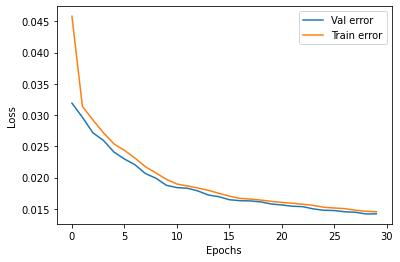

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

In [ ]:
Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')

In [ ]:
Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')

In [ ]:
autoencoder_input = Input(trainx.shape[1],name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

In [ ]:
autoencoder.compile(optimizer=SGD(lr=0.02,momentum=0.99), loss='mae')

In [ ]:
history2 = autoencoder.fit(x=trainx,y=trainx,validation_data=([validx],validx),batch_size = 64,epochs= 100,verbose=1,callbacks=[es])

Epoch 1/100
5048/5048 [==============================] - 22s 4ms/step - loss: 0.0562 - val_loss: 0.0285
Epoch 2/100
5048/5048 [==============================] - 19s 4ms/step - loss: 0.0272 - val_loss: 0.0232
Epoch 3/100
5048/5048 [==============================] - 19s 4ms/step - loss: 0.0226 - val_loss: 0.0201
Epoch 4/100
5048/5048 [==============================] - 19s 4ms/step - loss: 0.0200 - val_loss: 0.0174
Epoch 5/100
5048/5048 [==============================] - 19s 4ms/step - loss: 0.0174 - val_loss: 0.0162
Epoch 6/100
5048/5048 [==============================] - 19s 4ms/step - loss: 0.0161 - val_loss: 0.0149
Epoch 7/100
5048/5048 [==============================] - 19s 4ms/step - loss: 0.0151 - val_loss: 0.0143
Epoch 8/100
5048/5048 [==============================] - 19s 4ms/step - loss: 0.0146 - val_loss: 0.0140
Epoch 9/100
5048/5048 [==============================] - 19s 4ms/step - loss: 0.0144 - val_loss: 0.0134
Epoch 10/100
5048/5048 [==============================] - 19s 4m

In [ ]:
autoencoder.save("MNIST_model.h5")
Encoder.save("MNIST_model_encoder.h5")

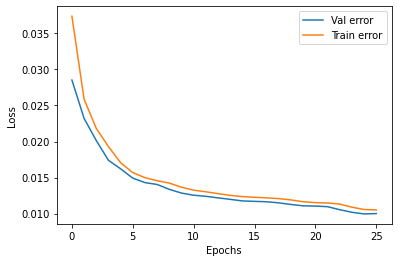

In [ ]:
val_loss = history2.history['val_loss']
loss = history2.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

## Decider1

In [ ]:
input_model = Input(100,name = 'input_layer')

classifier = Dense(300, activation='relu')(input_model)
classifier = Dense(150, activation='relu')(classifier)
classifier = Dense(60, activation='relu')(classifier)
classifier = Dense(10, activation='relu')(classifier)
output = Dense(trainY.shape[1], activation='softmax')(classifier)


In [ ]:
classifier = Model(inputs= [input_model], outputs=[output])
latent_vector_train = Encoder.predict(trainx)
latent_vector_valid = Encoder.predict(validx)
classifier.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = classifier.fit(x=latent_vector_train,y=trainy,validation_data=([latent_vector_valid],validy),batch_size = 64,epochs= 5,verbose=1,callbacks=[es , lrr],class_weight=classWeight)

Epoch 1/5
5048/5048 [==============================] - 14s 3ms/step - loss: 0.0874 - accuracy: 0.9810 - val_loss: 1.5092e-04 - val_accuracy: 1.0000
Epoch 2/5
5048/5048 [==============================] - 13s 3ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 1.0089e-04 - val_accuracy: 1.0000
Epoch 3/5
5048/5048 [==============================] - 13s 3ms/step - loss: 1.7584e-04 - accuracy: 1.0000 - val_loss: 3.8620e-05 - val_accuracy: 1.0000
Epoch 4/5
5048/5048 [==============================] - 13s 3ms/step - loss: 1.0496e-04 - accuracy: 1.0000 - val_loss: 4.5150e-05 - val_accuracy: 1.0000
Epoch 00004: early stopping


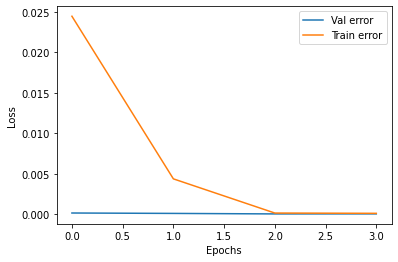

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

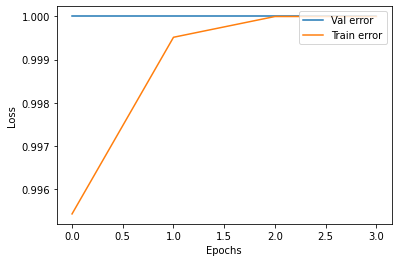

In [ ]:
val_loss = history.history['val_accuracy']
loss = history.history['accuracy']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

In [ ]:
classifier.save("MNIST_model_decider.h5")

# Predicting by filling the null data with the mean of train data

## Loading

In [ ]:
!ls

MNIST_model_decider.h5	     train_identity_finalColumns_beforeScaling
MNIST_model_encoder.h5	     train_identity_mean
MNIST_model.h5		     train_transaction_finalColumns
sample_data		     train_transaction_finalColumns_beforeScaling
test_refined		     train_transaction_mean
train_identity_finalColumns


In [ ]:
with zipfile.ZipFile("/gdrive/My Drive/Proj3.zip", 'r') as zip:
  for info in zip.infolist():
    ifile = zip.open(info)
    if (info.filename=='Proj3/test_identity.csv'):
      test_identity=pd.read_csv(ifile)
    elif (info.filename=='Proj3/sample_submission.csv'):
      sample_submission=pd.read_csv(ifile)
    elif (info.filename=='Proj3/test_transaction.csv'):
      test_transaction=pd.read_csv(ifile)

In [ ]:
train_identity_mean2=pd.read_csv("train_identity_mean")
train_transaction_mean2=pd.read_csv("train_transaction_mean")

In [ ]:
train_identity_mean={}
train_transaction_mean={}
for i in range(len(train_identity_mean2.index)):
  train_identity_mean[train_identity_mean2.iloc[i,0]]=train_identity_mean2.iloc[i,1]
for i in range(len(train_transaction_mean2.index)):
  train_transaction_mean[train_transaction_mean2.iloc[i,0]]=train_transaction_mean2.iloc[i,1]

In [ ]:
train_identity_finalColumns=pd.read_csv("train_identity_finalColumns")
train_identity_finalColumns_beforeScaling=pd.read_csv("train_identity_finalColumns_beforeScaling")
train_transaction_finalColumns=pd.read_csv("train_transaction_finalColumns")
train_transaction_finalColumns_beforeScaling=pd.read_csv("train_transaction_finalColumns_beforeScaling")

In [ ]:
train_identity_finalColumns2=pd.DataFrame({'TransactionID','TransactionID'})
train_identity_finalColumns=list(pd.concat((train_identity_finalColumns2,train_identity_finalColumns['TransactionID']))[0])
train_identity_finalColumns_beforeScaling2=pd.DataFrame({'TransactionID','TransactionID'})
train_identity_finalColumns_beforeScaling=list(pd.concat((train_identity_finalColumns_beforeScaling2,train_identity_finalColumns_beforeScaling['TransactionID']))[0])

In [ ]:
train_transaction_finalColumns2=pd.DataFrame({'TransactionDT','TransactionDT'})
train_transaction_finalColumns=list(pd.concat((train_transaction_finalColumns2,train_transaction_finalColumns['TransactionDT']))[0])


In [ ]:
train_transaction_finalColumns_beforeScaling=list(train_transaction_finalColumns_beforeScaling['isFraud'])

In [ ]:
train_identity_mean

{'DeviceType': 'desktop',
 'id_01': '-9.953478345226033',
 'id_02': '175513.10779600608',
 'id_05': '1.6147840957878978',
 'id_06': '-6.692342148490383',
 'id_11': '99.74871901856723',
 'id_12': 'NotFound',
 'id_13': '48.88936888002294',
 'id_15': 'Found',
 'id_16': 'Found',
 'id_17': '189.44803286092608',
 'id_19': '353.1559293145823',
 'id_20': '403.901718057659',
 'id_23': 'IP_PROXY:ANONYMOUS',
 'id_28': 'Found',
 'id_29': 'Found',
 'id_30': 'linux',
 'id_31': 'chrome 63.0',
 'id_34': 'match_status:1',
 'id_35': 'T',
 'id_36': 'F',
 'id_37': 'T',
 'id_38': 'F'}

In [ ]:
for i in train_identity_mean:
  try:
    train_identity_mean[i]=round((float)(train_identity_mean[i]),5)
  except:
    pass

In [ ]:
for i in train_transaction_mean:
  try:
    train_transaction_mean[i]=round((float)(train_transaction_mean[i]),5)
  except:
    pass

In [ ]:
train_transaction_mean

{'C1': 8.42701,
 'C10': 0.57854,
 'C11': 6.06734,
 'C12': 0.66824,
 'C13': 30.90908,
 'C14': 6.52516,
 'C2': 8.3945,
 'C3': 1e-05,
 'C4': 0.43985,
 'C5': 6.32277,
 'C6': 6.12704,
 'C7': 0.42158,
 'C8': 0.62674,
 'C9': 5.02075,
 'D1': 100.19,
 'D10': 118.52468,
 'D12': 7.90276,
 'D13': 1.87871,
 'D14': 5.34206,
 'D15': 157.54812,
 'D2': 165.11157,
 'D3': 29.07702,
 'D4': 141.21174,
 'D5': 41.76669,
 'D6': 7.96119,
 'D8': 5.64145,
 'D9': 0.03406,
 'M1': 'T',
 'M2': 'T',
 'M3': 'T',
 'M4': 'M1',
 'M5': 'F',
 'M6': 'T',
 'M7': 'F',
 'M8': 'T',
 'M9': 'T',
 'P_emaildomain': 'gmail.com',
 'ProductCD': 'W',
 'R_emaildomain': 'anonymous.com',
 'TransactionAmt': 140.4542,
 'TransactionDT': 7833551.65379,
 'V100': 0.26355,
 'V101': 0.09051,
 'V102': 0.32162,
 'V103': 0.16527,
 'V104': 0.04779,
 'V105': 0.1083,
 'V106': 0.06572,
 'V107': 0.99958,
 'V108': 1.00507,
 'V109': 1.01711,
 'V110': 1.0087,
 'V111': 1.0026,
 'V112': 1.00567,
 'V113': 1.00345,
 'V114': 1.00988,
 'V115': 1.03631,
 'V116': 1

## test_identity preprocessing

since our model have entries as many as the number of train data columns we have to change the test data in a way that it'll have the same number of columns as the train data + we are going to fill the null fields with the mean of columns in the train data

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 41)


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [ ]:
for i in range(1,39):
  if (i<10):
    test_identity.rename(columns={'id-0'+str(i):'id_0'+str(i)},inplace=True)
  else:
    test_identity.rename(columns={'id-'+str(i):'id_'+str(i)},inplace=True)

In [ ]:
drop_columns=[]
j=0
for i in test_identity.columns:
  if (j>=len(train_identity_finalColumns_beforeScaling)):
    j-=1
  if (i!=train_identity_finalColumns_beforeScaling[j]):
    drop_columns.append(i)
  else:
    j+=1

In [ ]:
test_identity.drop(drop_columns,axis=1,inplace=True)

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 24)


,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType
0,3663586,-45.0,280290.0,0.0,0.0,100.0,NotFound,27.0,New,NotFound,225.0,427.0,563.0,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile
1,3663588,0.0,3579.0,0.0,0.0,100.0,Found,NaN,Found,Found,166.0,542.0,368.0,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,match_status:2,T,F,T,T,mobile
2,3663597,-5.0,185210.0,1.0,0.0,100.0,NotFound,52.0,New,NotFound,225.0,271.0,507.0,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,F,T,T,F,desktop
3,3663601,-45.0,252944.0,0.0,0.0,100.0,NotFound,27.0,Found,Found,225.0,427.0,563.0,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile
4,3663602,-95.0,328680.0,7.0,-33.0,100.0,NotFound,27.0,New,NotFound,225.0,567.0,507.0,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile


Now we can handle null values

In [ ]:
test_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              4931
id_05              7157
id_06              7157
id_11              5129
id_12                 0
id_13             11621
id_15              4930
id_16             16160
id_17              5941
id_19              6001
id_20              6274
id_23            136845
id_28              5129
id_29              5129
id_30             71248
id_31              5282
id_34             69732
id_35              4930
id_36              4930
id_37              4930
id_38              4930
DeviceType         4976
dtype: int64

In [ ]:
round(test_identity.isna().sum() * 100 / test_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             3.47
id_05             5.04
id_06             5.04
id_11             3.61
id_12             0.00
id_13             8.19
id_15             3.47
id_16            11.39
id_17             4.19
id_19             4.23
id_20             4.42
id_23            96.43
id_28             3.61
id_29             3.61
id_30            50.21
id_31             3.72
id_34            49.14
id_35             3.47
id_36             3.47
id_37             3.47
id_38             3.47
DeviceType        3.51
dtype: float64

we are filling the null data with the column mode in the train data

In [ ]:
test_identity.fillna({'id_23':'IP_PROXY:ANONYMOUS'}, inplace=True)

In [ ]:
test_identity.fillna({'id_30':'linux'}, inplace=True)

In [ ]:
test_identity.fillna({'id_34':'match_status:1'}, inplace=True)

In [ ]:
test_identity.fillna({'id_16':'Found' , 'DeviceType':'desktop' }, inplace=True)

In [ ]:
test_identity.isna().sum()

TransactionID        0
id_01                0
id_02             4931
id_05             7157
id_06             7157
id_11             5129
id_12                0
id_13            11621
id_15             4930
id_16                0
id_17             5941
id_19             6001
id_20             6274
id_23                0
id_28             5129
id_29             5129
id_30                0
id_31             5282
id_34                0
id_35             4930
id_36             4930
id_37             4930
id_38             4930
DeviceType           0
dtype: int64

In [ ]:
for i in test_identity.columns:
  if (test_identity[i].isna().sum()>0):
    test_identity.fillna({i:train_identity_mean[i]},inplace=True)

In [ ]:
test_identity.isna().sum()

TransactionID    0
id_01            0
id_02            0
id_05            0
id_06            0
id_11            0
id_12            0
id_13            0
id_15            0
id_16            0
id_17            0
id_19            0
id_20            0
id_23            0
id_28            0
id_29            0
id_30            0
id_31            0
id_34            0
id_35            0
id_36            0
id_37            0
id_38            0
DeviceType       0
dtype: int64

In [ ]:
test_identity

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType
0,3663586,-45.0,280290.0,0.0,0.0,100.0,NotFound,27.00000,New,NotFound,225.0,427.0,563.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 67.0 for android,match_status:1,F,F,T,F,mobile
1,3663588,0.0,3579.0,0.0,0.0,100.0,Found,48.88937,Found,Found,166.0,542.0,368.0,IP_PROXY:ANONYMOUS,Found,Found,Android 6.0.1,chrome 67.0 for android,match_status:2,T,F,T,T,mobile
2,3663597,-5.0,185210.0,1.0,0.0,100.0,NotFound,52.00000,New,NotFound,225.0,271.0,507.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,ie 11.0 for tablet,match_status:1,F,T,T,F,desktop
3,3663601,-45.0,252944.0,0.0,0.0,100.0,NotFound,27.00000,Found,Found,225.0,427.0,563.0,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 67.0 for android,match_status:1,F,F,T,F,mobile
4,3663602,-95.0,328680.0,7.0,-33.0,100.0,NotFound,27.00000,New,NotFound,225.0,567.0,507.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 67.0 for android,match_status:1,F,F,T,F,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,4170230,-20.0,473365.0,0.0,0.0,100.0,NotFound,27.00000,New,NotFound,225.0,153.0,325.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 71.0 for android,match_status:1,F,F,T,F,mobile
141903,4170233,-5.0,489917.0,-4.0,-32.0,100.0,NotFound,27.00000,Found,Found,225.0,417.0,595.0,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 71.0 for android,match_status:1,F,F,T,F,mobile
141904,4170234,-5.0,110081.0,22.0,-31.0,100.0,NotFound,27.00000,New,NotFound,166.0,122.0,177.0,IP_PROXY:ANONYMOUS,New,NotFound,iOS 10.3.3,mobile safari 10.0,match_status:2,T,F,F,T,mobile
141905,4170236,-45.0,266704.0,-3.0,-10.0,100.0,NotFound,27.00000,New,NotFound,225.0,176.0,507.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 43.0 for android,match_status:1,F,F,T,F,mobile


scaling:

In [ ]:
labelencoder=LabelEncoder()
columns=test_identity.columns
for i in range(1,test_identity.shape[1]):
  ind=columns[i]
  if (i==13 or i==16 or i==18 or i==23):
    continue
  if (i==6 or i==8 or i==9 or (i<=22 and i>=19)  or (i<=17 and i>=14)):
    test_identity[ind]=test_identity[ind].astype('str')
    test_identity[ind] = labelencoder.fit_transform(test_identity[ind])
  try:
    minn=min(x for x in test_identity[ind] if not pd.isna(x))
    maxx=max(x for x in test_identity[ind] if not pd.isna(x))
    test_identity[ind]=(test_identity[ind]-minn)/(maxx-minn)
  except:
    test_identity[ind]=test_identity[ind].astype('float')
    minn=min(x for x in test_identity[ind] if not pd.isna(x))
    maxx=max(x for x in test_identity[ind] if not pd.isna(x))
    test_identity[ind]=(test_identity[ind]-minn)/(maxx-minn)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.id_23,prefix='proxy')],axis=1)).drop(['id_23'],axis=1)

In [ ]:
windows=[]
mac=[]
linux=[]
ios=[]
android=[]
other=[]
for i in test_identity['id_30']:
  if (pd.isna(i)):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Windows' in i):
    windows.append(1)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Mac' in i):
    windows.append(0)
    mac.append(1)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Linux' in i or 'linux' in i):
    windows.append(0)
    mac.append(0)
    linux.append(1)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('iOS' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(1)
    android.append(0)
    other.append(0)
  elif ('Android' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(1)
    other.append(0)
  elif ('other' in i or 'func' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(1)

test_identity['isWind']=windows
test_identity['isMac']=mac
test_identity['isLinux']=linux
test_identity['isIOS']=ios
test_identity['isAndroid']=android
test_identity['isOther']=other

version of the os might also be important so:

In [ ]:
test_identity['id_30']=test_identity['id_30'].astype('str')
test_identity['id_30'] = labelencoder.fit_transform(test_identity['id_30'])

In [ ]:
minn=min(x for x in test_identity['id_30'] if not pd.isna(x))
maxx=max(x for x in test_identity['id_30'] if not pd.isna(x))
test_identity['id_30']=(test_identity['id_30']-minn)/(maxx-minn)

In [ ]:
del(windows)
del(mac)
del(ios)
del(linux)
del(android)
del(other)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.id_34,prefix='')],axis=1)).drop(['id_34'],axis=1)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.DeviceType,prefix='')],axis=1)).drop(['DeviceType'],axis=1)

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 34)


,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:1,_match_status:2,_desktop,_mobile
0,3663586,0.55,0.280325,0.609023,1.00,1.0,1.0,0.307692,0.5,1.0,0.976562,0.573684,0.826786,1.0,1.0,0.988372,0.335821,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,1
1,3663588,1.00,0.003577,0.609023,1.00,1.0,0.0,0.728642,0.0,0.0,0.515625,0.775439,0.478571,0.0,0.0,0.069767,0.335821,1.0,0.0,1.0,1.0,1,0,0,0,0,0,0,1,0,0,1,0,1
2,3663597,0.95,0.185233,0.616541,1.00,1.0,1.0,0.788462,0.5,1.0,0.976562,0.300000,0.726786,1.0,1.0,0.988372,0.746269,0.0,1.0,1.0,0.0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,3663601,0.55,0.252976,0.609023,1.00,1.0,1.0,0.307692,0.0,0.0,0.976562,0.573684,0.826786,0.0,0.0,0.988372,0.335821,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,1
4,3663602,0.05,0.328722,0.661654,0.67,1.0,1.0,0.307692,0.5,1.0,0.976562,0.819298,0.726786,1.0,1.0,0.988372,0.335821,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
test_identity.columns[30]

'_match_status:1'

In [ ]:
print(train_identity_finalColumns)
print(test_identity.columns)

['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'proxy_IP_PROXY:ANONYMOUS', 'proxy_IP_PROXY:HIDDEN', 'proxy_IP_PROXY:TRANSPARENT', 'isWind', 'isMac', 'isLinux', 'isIOS', 'isAndroid', 'isOther', '_match_status:-1', '_match_status:0', '_match_status:1', '_match_status:2', '_desktop', '_mobile']
Index(['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12',
       'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29',
       'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38',
       'proxy_IP_PROXY:ANONYMOUS', 'proxy_IP_PROXY:HIDDEN',
       'proxy_IP_PROXY:TRANSPARENT', 'isWind', 'isMac', 'isLinux', 'isIOS',
       'isAndroid', 'isOther', '_match_status:1', '_match_status:2',
       '_desktop', '_mobile'],
      dtype='object')


In [ ]:
match0=[0]*test_identity.shape[0]
test_identity.insert(30,'_match_status:-1',match0)
test_identity.insert(31,'_match_status:0',match0)

In [ ]:
(train_identity_finalColumns)==list(test_identity.columns)

True

## test_transaction preprocessing

In [ ]:
test_transaction

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,284.0,60.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,157.0,hotmail.com,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,NaN,NaN,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,327.0,87.0,NaN,NaN,hotmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
#join the two dataframes
test_transaction=test_transaction.set_index('TransactionID').join(test_identity.set_index('TransactionID'))

In [ ]:
del(test_identity)

In [ ]:
drop_columns=[]
j=0
for i in test_transaction.columns:
  if (j>=len(train_transaction_finalColumns_beforeScaling)):
    j-=1
  if (i!=train_transaction_finalColumns_beforeScaling[j]):
    drop_columns.append(i)
  else:
    j+=1

In [ ]:
test_transaction.drop(drop_columns,axis=1,inplace=True)

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,418.0,NaN,NaN,NaN,409.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,231.0,NaN,NaN,NaN,634.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,136.0,NaN,NaN,NaN,97.0,...,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,242.0,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,22.0,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(test_transaction)==(train_transaction_finalColumns_beforeScaling)

True

Now we can handle null values

In [ ]:
for i in range(test_transaction.shape[1]):
  ind = test_transaction.columns[i]
  test_transaction.fillna({ind:train_transaction_mean[ind]},inplace=True)

In [ ]:
nullNumbers=test_transaction.isna().sum()
for i in range(330):
  if(nullNumbers[i]>0):
    print(test_transaction.columns[i],"\t",round(nullNumbers[i] * 100 / test_transaction.shape[0] , 2))

Now we have no null data                                                                
Scaling:

In [ ]:
test_transaction.isna().sum().sum()

0

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,gmail.com,anonymous.com,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,7.96119,5.64145,0.03406,418.0,7.90276,1.87871,5.34206,409.0,...,0.0,0.0,0.0,0.0,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.7195,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,aol.com,anonymous.com,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,7.96119,5.64145,0.03406,231.0,7.90276,1.87871,5.34206,634.0,...,0.0,0.0,0.0,0.0,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.7195,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,hotmail.com,anonymous.com,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,7.96119,5.64145,0.03406,136.0,7.90276,1.87871,5.34206,97.0,...,0.0,0.0,0.0,263.0,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.7195,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,gmail.com,anonymous.com,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,7.96119,5.64145,0.03406,242.0,7.90276,1.87871,5.34206,242.0,...,0.0,0.0,0.0,0.0,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.7195,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,gmail.com,anonymous.com,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,7.96119,5.64145,0.03406,22.0,7.90276,1.87871,5.34206,22.0,...,0.0,0.0,0.0,0.0,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.7195,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107


In [ ]:
test_transaction.columns[330]

'id_01'

In [ ]:
#2 W,H->oneHot
#6 discover ,mastercard, visa ,american express,->oneHot
#8 credit,debit,credit or debit,charge card->oneHot
#11,12 labelEncoding
#40-48 T,F-> labelEncoding
columns=test_transaction.columns
for i in range(330):
  ind=columns[i]
  if (i==2 or i==6 or i==8 ):
    continue
  if (i==12 or i==11 or (i<=48 and i>=40)):
    test_transaction[ind]=test_transaction[ind].astype('str')
    test_transaction[ind] = labelencoder.fit_transform(test_transaction[ind])
  try:
    minn=min(test_transaction[ind])
    maxx=max(test_transaction[ind])
    if (maxx==minn):
      minn=0
    test_transaction[ind]=(test_transaction[ind]-minn)/(maxx-minn)
  except:
    test_transaction[ind]=test_transaction[ind].astype('float32')
    minn=min(test_transaction[ind])
    maxx=max(test_transaction[ind])
    if (maxx==minn):
      continue
    test_transaction[ind]=(test_transaction[ind]-minn)/(maxx-minn)


In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,0.000000,0.003109,W,0.540814,0.022,0.378788,visa,0.919708,debit,0.159091,0.836957,0.271186,0.016949,0.002034,0.001832,0.0,0.0,0.007979,0.002498,0.0,0.0,0.010490,0.0,0.002238,0.000448,0.073624,0.007528,0.653666,0.653666,0.025093,0.364803,0.024816,0.007297,0.00278,0.035541,0.383135,0.008991,0.001762,0.004924,0.374885,...,0.0,0.0,0.0,0.000000,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.7195,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663550,0.000002,0.004769,W,0.188032,0.022,0.378788,visa,0.919708,debit,0.452273,0.836957,0.033898,0.016949,0.001017,0.000611,0.0,0.0,0.000000,0.000625,0.0,0.0,0.003497,0.0,0.000448,0.000448,0.007682,0.002509,0.232449,0.232449,0.006506,0.581118,0.006434,0.007297,0.00278,0.035541,0.211732,0.008991,0.001762,0.004924,0.581118,...,0.0,0.0,0.0,0.000000,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.7195,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663551,0.000005,0.016649,W,0.199759,0.948,0.378788,visa,0.919708,debit,0.845455,0.836957,0.322034,0.016949,0.000678,0.000611,0.0,0.0,0.000000,0.003123,0.0,0.0,0.006993,0.0,0.000895,0.000000,0.014085,0.002509,0.213729,0.213729,0.009294,0.088909,0.009191,0.007297,0.00278,0.035541,0.124656,0.008991,0.001762,0.004924,0.088909,...,0.0,0.0,0.0,0.000435,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.7195,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663552,0.000005,0.027744,W,0.574155,0.520,0.378788,visa,0.481752,debit,0.238636,0.836957,0.271186,0.016949,0.001695,0.000611,0.0,0.0,0.002660,0.000625,0.0,0.0,0.003497,0.0,0.000895,0.000000,0.004481,0.005019,0.065523,0.065523,0.038104,0.221815,0.037684,0.007297,0.00278,0.035541,0.221815,0.008991,0.001762,0.004924,0.221815,...,0.0,0.0,0.0,0.000000,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.7195,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663553,0.000006,0.006615,W,0.978213,0.704,0.378788,mastercard,0.124088,debit,0.372727,0.836957,0.271186,0.016949,0.002034,0.001832,0.0,0.0,0.005319,0.003123,0.0,0.0,0.008741,0.0,0.002686,0.000000,0.008963,0.007528,0.034321,0.034321,0.000000,0.020165,0.000000,0.007297,0.00278,0.035541,0.020165,0.008991,0.001762,0.004924,0.020165,...,0.0,0.0,0.0,0.000000,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.7195,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107


In [ ]:
test_transaction=(pd.concat([test_transaction,pd.get_dummies(test_transaction.ProductCD,prefix='cd')],axis=1)).drop(['ProductCD'],axis=1)

In [ ]:
test_transaction=(pd.concat([test_transaction,pd.get_dummies(test_transaction.card4,prefix='card4')],axis=1)).drop(['card4'],axis=1)

In [ ]:
credit=[]
debit=[]
charge=[]
for i in test_transaction['card6']:
  if i=='credit':
    credit.append(1)
    debit.append(0)
    charge.append(0)
  elif i=='debit':
    credit.append(0)
    debit.append(1)
    charge.append(0)
  elif i=='debit or credit':
    credit.append(0.5)
    debit.append(0.5)
    charge.append(0)
  elif i=='charge card':
    credit.append(0)
    debit.append(0)
    charge.append(1)

test_transaction['credit']=credit
test_transaction['debit']=debit
test_transaction['charge_card']=charge
test_transaction=test_transaction.drop(['card6'],axis=1)

In [ ]:
del(credit)
del(debit)
del(charge)

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 374)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,M1,M2,M3,...,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile,cd_C,cd_H,cd_R,cd_S,cd_W,card4_american express,card4_discover,card4_mastercard,card4_visa,credit,debit,charge_card
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,0.000000,0.003109,0.540814,0.022,0.378788,0.919708,0.159091,0.836957,0.271186,0.016949,0.002034,0.001832,0.0,0.0,0.007979,0.002498,0.0,0.0,0.010490,0.0,0.002238,0.000448,0.073624,0.007528,0.653666,0.653666,0.025093,0.364803,0.024816,0.007297,0.00278,0.035541,0.383135,0.008991,0.001762,0.004924,0.374885,1.0,1.0,0.0,...,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107,0,0,0,0,1,0,0,0,1,0,1,0
3663550,0.000002,0.004769,0.188032,0.022,0.378788,0.919708,0.452273,0.836957,0.033898,0.016949,0.001017,0.000611,0.0,0.0,0.000000,0.000625,0.0,0.0,0.003497,0.0,0.000448,0.000448,0.007682,0.002509,0.232449,0.232449,0.006506,0.581118,0.006434,0.007297,0.00278,0.035541,0.211732,0.008991,0.001762,0.004924,0.581118,1.0,0.0,0.0,...,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107,0,0,0,0,1,0,0,0,1,0,1,0
3663551,0.000005,0.016649,0.199759,0.948,0.378788,0.919708,0.845455,0.836957,0.322034,0.016949,0.000678,0.000611,0.0,0.0,0.000000,0.003123,0.0,0.0,0.006993,0.0,0.000895,0.000000,0.014085,0.002509,0.213729,0.213729,0.009294,0.088909,0.009191,0.007297,0.00278,0.035541,0.124656,0.008991,0.001762,0.004924,0.088909,1.0,1.0,0.0,...,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107,0,0,0,0,1,0,0,0,1,0,1,0
3663552,0.000005,0.027744,0.574155,0.520,0.378788,0.481752,0.238636,0.836957,0.271186,0.016949,0.001695,0.000611,0.0,0.0,0.002660,0.000625,0.0,0.0,0.003497,0.0,0.000895,0.000000,0.004481,0.005019,0.065523,0.065523,0.038104,0.221815,0.037684,0.007297,0.00278,0.035541,0.221815,0.008991,0.001762,0.004924,0.221815,1.0,1.0,1.0,...,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107,0,0,0,0,1,0,0,0,1,0,1,0
3663553,0.000006,0.006615,0.978213,0.704,0.378788,0.124088,0.372727,0.836957,0.271186,0.016949,0.002034,0.001832,0.0,0.0,0.005319,0.003123,0.0,0.0,0.008741,0.0,0.002686,0.000000,0.008963,0.007528,0.034321,0.034321,0.000000,0.020165,0.000000,0.007297,0.00278,0.035541,0.020165,0.008991,0.001762,0.004924,0.020165,1.0,1.0,1.0,...,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
test_transaction=test_transaction.astype('float32')

In [ ]:
test_transaction.drop(['cd_S'],axis=1,inplace=True)

In [ ]:
list(test_transaction)==(train_transaction_finalColumns)

True

In [ ]:
testX=(test_transaction).to_numpy(dtype='float32')
del(test_transaction)

In [ ]:
testX.shape

(506691, 373)

## predicting with the model

In [ ]:
Encoder=keras.models.load_model('MNIST_model_encoder.h5')
decider=keras.models.load_model('MNIST_model_decider.h5')

In [ ]:
np.count_nonzero(np.isnan(testX))


0

In [ ]:
latent_vector = Encoder.predict(testX)

In [ ]:
latent_vector

array([[3.315014 , 0.       , 2.0623014, ..., 1.4694631, 0.       ,
        4.340064 ],
       [2.915575 , 0.       , 1.449341 , ..., 3.390133 , 0.       ,
        3.3285522],
       [3.5663912, 0.       , 2.565656 , ..., 2.2979739, 0.       ,
        3.81606  ],
       ...,
       [3.1794949, 0.       , 1.898866 , ..., 1.0729991, 0.       ,
        2.8188233],
       [3.4858325, 0.       , 2.0676353, ..., 1.4184742, 0.       ,
        2.7406704],
       [4.5835886, 0.       , 5.385154 , ..., 4.7949686, 7.6243186,
        4.610237 ]], dtype=float32)

In [ ]:
predicted=decider.predict(latent_vector)

In [ ]:
predicted

array([[1.0000000e+00, 3.2531053e-10],
       [1.0000000e+00, 2.0740483e-10],
       [9.8678893e-01, 1.3211106e-02],
       ...,
       [1.0000000e+00, 8.6643921e-11],
       [9.9993515e-01, 6.4892512e-05],
       [9.9998856e-01, 1.1464043e-05]], dtype=float32)

In [ ]:
pred = np.argmax(predicted, axis=1)

In [ ]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
sample_submission

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5
...,...,...
506686,4170235,0.5
506687,4170236,0.5
506688,4170237,0.5
506689,4170238,0.5


In [ ]:
sample_submission['isFraud']=pred

In [ ]:
sample_submission

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,0
506687,4170236,0
506688,4170237,0
506689,4170238,0


In [ ]:
sample_submission[sample_submission['isFraud']==1]

,TransactionID,isFraud
120,3663669,1
134,3663683,1
150,3663699,1
220,3663769,1
224,3663773,1
...,...,...
506279,4169828,1
506468,4170017,1
506500,4170049,1
506551,4170100,1


5152 out of 506691 is predicted to be fraud

In [ ]:
sample_submission.to_csv('sample_submission.csv',index=None)

In [ ]:
pd.read_csv('sample_submission.csv')

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,0
506687,4170236,0
506688,4170237,0
506689,4170238,0


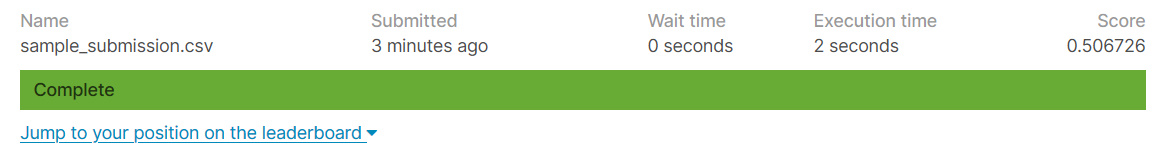

# Predicting by filling the null data with the mean of test data

## Loading

In [ ]:
!ls

sample_data


In [ ]:
with zipfile.ZipFile("/gdrive/My Drive/Proj3.zip", 'r') as zip:
  for info in zip.infolist():
    ifile = zip.open(info)
    if (info.filename=='Proj3/test_identity.csv'):
      test_identity=pd.read_csv(ifile)
    elif (info.filename=='Proj3/sample_submission.csv'):
      sample_submission=pd.read_csv(ifile)
    elif (info.filename=='Proj3/test_transaction.csv'):
      test_transaction=pd.read_csv(ifile)

In [ ]:
train_identity_finalColumns=pd.read_csv("train_identity_finalColumns")
train_identity_finalColumns_beforeScaling=pd.read_csv("train_identity_finalColumns_beforeScaling")
train_transaction_finalColumns=pd.read_csv("train_transaction_finalColumns")
train_transaction_finalColumns_beforeScaling=pd.read_csv("train_transaction_finalColumns_beforeScaling")

In [ ]:
train_identity_finalColumns2=pd.DataFrame({'TransactionID','TransactionID'})
train_identity_finalColumns=list(pd.concat((train_identity_finalColumns2,train_identity_finalColumns['TransactionID']))[0])
train_identity_finalColumns_beforeScaling2=pd.DataFrame({'TransactionID','TransactionID'})
train_identity_finalColumns_beforeScaling=list(pd.concat((train_identity_finalColumns_beforeScaling2,train_identity_finalColumns_beforeScaling['TransactionID']))[0])

In [ ]:
train_transaction_finalColumns2=pd.DataFrame({'TransactionDT','TransactionDT'})
train_transaction_finalColumns=list(pd.concat((train_transaction_finalColumns2,train_transaction_finalColumns['TransactionDT']))[0])


In [ ]:
train_transaction_finalColumns_beforeScaling=list(train_transaction_finalColumns_beforeScaling['isFraud'])

## test_identity preprocessing

since our model have entries as many as the number of train data columns we have to change the test data in a way that it'll have the same number of columns as the train data + we are going to fill the null fields with the mean of non-null fields

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 41)


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [ ]:
for i in range(1,39):
  if (i<10):
    test_identity.rename(columns={'id-0'+str(i):'id_0'+str(i)},inplace=True)
  else:
    test_identity.rename(columns={'id-'+str(i):'id_'+str(i)},inplace=True)

In [ ]:
drop_columns=[]
j=0
for i in test_identity.columns:
  if (j>=len(train_identity_finalColumns_beforeScaling)):
    j-=1
  if (i!=train_identity_finalColumns_beforeScaling[j]):
    drop_columns.append(i)
  else:
    j+=1

In [ ]:
test_identity.drop(drop_columns,axis=1,inplace=True)

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 24)


,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType
0,3663586,-45.0,280290.0,0.0,0.0,100.0,NotFound,27.0,New,NotFound,225.0,427.0,563.0,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile
1,3663588,0.0,3579.0,0.0,0.0,100.0,Found,NaN,Found,Found,166.0,542.0,368.0,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,match_status:2,T,F,T,T,mobile
2,3663597,-5.0,185210.0,1.0,0.0,100.0,NotFound,52.0,New,NotFound,225.0,271.0,507.0,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,F,T,T,F,desktop
3,3663601,-45.0,252944.0,0.0,0.0,100.0,NotFound,27.0,Found,Found,225.0,427.0,563.0,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile
4,3663602,-95.0,328680.0,7.0,-33.0,100.0,NotFound,27.0,New,NotFound,225.0,567.0,507.0,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile


Now we can handle null values

In [ ]:
test_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              4931
id_05              7157
id_06              7157
id_11              5129
id_12                 0
id_13             11621
id_15              4930
id_16             16160
id_17              5941
id_19              6001
id_20              6274
id_23            136845
id_28              5129
id_29              5129
id_30             71248
id_31              5282
id_34             69732
id_35              4930
id_36              4930
id_37              4930
id_38              4930
DeviceType         4976
dtype: int64

In [ ]:
round(test_identity.isna().sum() * 100 / test_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             3.47
id_05             5.04
id_06             5.04
id_11             3.61
id_12             0.00
id_13             8.19
id_15             3.47
id_16            11.39
id_17             4.19
id_19             4.23
id_20             4.42
id_23            96.43
id_28             3.61
id_29             3.61
id_30            50.21
id_31             3.72
id_34            49.14
id_35             3.47
id_36             3.47
id_37             3.47
id_38             3.47
DeviceType        3.51
dtype: float64

we are filling the null data with the column mode in the train data

In [ ]:
test_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              4931
id_05              7157
id_06              7157
id_11              5129
id_12                 0
id_13             11621
id_15              4930
id_16             16160
id_17              5941
id_19              6001
id_20              6274
id_23            136845
id_28              5129
id_29              5129
id_30             71248
id_31              5282
id_34             69732
id_35              4930
id_36              4930
id_37              4930
id_38              4930
DeviceType         4976
dtype: int64

In [ ]:
for i in test_identity.columns:
  if (test_identity[i].isna().sum()>0):
    try:
      test_identity[i]=test_identity[i].astype('float32')
      test_identity.fillna({i:test_identity[i].mean()},inplace=True)
    except:
      test_identity.fillna({i:test_identity[i].mode()[0]},inplace=True)

In [ ]:
test_identity.isna().sum()

TransactionID    0
id_01            0
id_02            0
id_05            0
id_06            0
id_11            0
id_12            0
id_13            0
id_15            0
id_16            0
id_17            0
id_19            0
id_20            0
id_23            0
id_28            0
id_29            0
id_30            0
id_31            0
id_34            0
id_35            0
id_36            0
id_37            0
id_38            0
DeviceType       0
dtype: int64

In [ ]:
test_identity

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType
0,3663586,-45.0,280290.0,0.0,0.0,100.0,NotFound,27.000000,New,NotFound,225.0,427.0,563.0,IP_PROXY:TRANSPARENT,New,NotFound,Windows 10,chrome 67.0 for android,match_status:2,F,F,T,F,mobile
1,3663588,0.0,3579.0,0.0,0.0,100.0,Found,36.905716,Found,Found,166.0,542.0,368.0,IP_PROXY:TRANSPARENT,Found,Found,Android 6.0.1,chrome 67.0 for android,match_status:2,T,F,T,T,mobile
2,3663597,-5.0,185210.0,1.0,0.0,100.0,NotFound,52.000000,New,NotFound,225.0,271.0,507.0,IP_PROXY:TRANSPARENT,New,NotFound,Windows 10,ie 11.0 for tablet,match_status:2,F,T,T,F,desktop
3,3663601,-45.0,252944.0,0.0,0.0,100.0,NotFound,27.000000,Found,Found,225.0,427.0,563.0,IP_PROXY:TRANSPARENT,Found,Found,Windows 10,chrome 67.0 for android,match_status:2,F,F,T,F,mobile
4,3663602,-95.0,328680.0,7.0,-33.0,100.0,NotFound,27.000000,New,NotFound,225.0,567.0,507.0,IP_PROXY:TRANSPARENT,New,NotFound,Windows 10,chrome 67.0 for android,match_status:2,F,F,T,F,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,4170230,-20.0,473365.0,0.0,0.0,100.0,NotFound,27.000000,New,NotFound,225.0,153.0,325.0,IP_PROXY:TRANSPARENT,New,NotFound,Windows 10,chrome 71.0 for android,match_status:2,F,F,T,F,mobile
141903,4170233,-5.0,489917.0,-4.0,-32.0,100.0,NotFound,27.000000,Found,Found,225.0,417.0,595.0,IP_PROXY:TRANSPARENT,Found,Found,Windows 10,chrome 71.0 for android,match_status:2,F,F,T,F,mobile
141904,4170234,-5.0,110081.0,22.0,-31.0,100.0,NotFound,27.000000,New,NotFound,166.0,122.0,177.0,IP_PROXY:TRANSPARENT,New,NotFound,iOS 10.3.3,mobile safari 10.0,match_status:2,T,F,F,T,mobile
141905,4170236,-45.0,266704.0,-3.0,-10.0,100.0,NotFound,27.000000,New,NotFound,225.0,176.0,507.0,IP_PROXY:TRANSPARENT,New,NotFound,Windows 10,chrome 43.0 for android,match_status:2,F,F,T,F,mobile


scaling:

In [ ]:
labelencoder=LabelEncoder()
columns=test_identity.columns
for i in range(1,test_identity.shape[1]):
  ind=columns[i]
  if (i==13 or i==16 or i==18 or i==23):
    continue
  if (i==6 or i==8 or i==9 or (i<=22 and i>=19)  or (i<=17 and i>=14)):
    test_identity[ind]=test_identity[ind].astype('str')
    test_identity[ind] = labelencoder.fit_transform(test_identity[ind])
  try:
    minn=min(test_identity[ind])
    maxx=max(test_identity[ind])
    if (minn==maxx):
      minn=0
    test_identity[ind]=(test_identity[ind]-minn)/(maxx-minn)
  except:
    test_identity[ind]=test_identity[ind].astype('float')
    minn=min(test_identity[ind])
    maxx=max(test_identity[ind])
    if (minn==maxx):
      minn=0
    test_identity[ind]=(test_identity[ind]-minn)/(maxx-minn)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.id_23,prefix='proxy')],axis=1)).drop(['id_23'],axis=1)

In [ ]:
windows=[]
mac=[]
linux=[]
ios=[]
android=[]
other=[]
for i in test_identity['id_30']:
  if (pd.isna(i)):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Windows' in i):
    windows.append(1)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Mac' in i):
    windows.append(0)
    mac.append(1)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Linux' in i or 'linux' in i):
    windows.append(0)
    mac.append(0)
    linux.append(1)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('iOS' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(1)
    android.append(0)
    other.append(0)
  elif ('Android' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(1)
    other.append(0)
  elif ('other' in i or 'func' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(1)

test_identity['isWind']=windows
test_identity['isMac']=mac
test_identity['isLinux']=linux
test_identity['isIOS']=ios
test_identity['isAndroid']=android
test_identity['isOther']=other

version of the os might also be important so:

In [ ]:
test_identity['id_30']=test_identity['id_30'].astype('str')
test_identity['id_30'] = labelencoder.fit_transform(test_identity['id_30'])

In [ ]:
minn=min(x for x in test_identity['id_30'] if not pd.isna(x))
maxx=max(x for x in test_identity['id_30'] if not pd.isna(x))
test_identity['id_30']=(test_identity['id_30']-minn)/(maxx-minn)

In [ ]:
del(windows)
del(mac)
del(ios)
del(linux)
del(android)
del(other)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.id_34,prefix='')],axis=1)).drop(['id_34'],axis=1)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.DeviceType,prefix='')],axis=1)).drop(['DeviceType'],axis=1)

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 34)


,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:1,_match_status:2,_desktop,_mobile
0,3663586,0.55,0.280325,0.609023,1.00,1.0,1.0,0.307692,0.5,1.0,0.976562,0.573684,0.826786,1.0,1.0,0.564706,0.335821,0.0,0.0,1.0,0.0,0,0,1,1,0,0,0,0,0,0,1,0,1
1,3663588,1.00,0.003577,0.609023,1.00,1.0,0.0,0.498187,0.0,0.0,0.515625,0.775439,0.478571,0.0,0.0,0.070588,0.335821,1.0,0.0,1.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,1
2,3663597,0.95,0.185233,0.616541,1.00,1.0,1.0,0.788462,0.5,1.0,0.976562,0.300000,0.726786,1.0,1.0,0.564706,0.746269,0.0,1.0,1.0,0.0,0,0,1,1,0,0,0,0,0,0,1,1,0
3,3663601,0.55,0.252976,0.609023,1.00,1.0,1.0,0.307692,0.0,0.0,0.976562,0.573684,0.826786,0.0,0.0,0.564706,0.335821,0.0,0.0,1.0,0.0,0,0,1,1,0,0,0,0,0,0,1,0,1
4,3663602,0.05,0.328722,0.661654,0.67,1.0,1.0,0.307692,0.5,1.0,0.976562,0.819298,0.726786,1.0,1.0,0.564706,0.335821,0.0,0.0,1.0,0.0,0,0,1,1,0,0,0,0,0,0,1,0,1


In [ ]:
test_identity.columns[30]

'_match_status:1'

In [ ]:
print(train_identity_finalColumns)
print(test_identity.columns)

['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'proxy_IP_PROXY:ANONYMOUS', 'proxy_IP_PROXY:HIDDEN', 'proxy_IP_PROXY:TRANSPARENT', 'isWind', 'isMac', 'isLinux', 'isIOS', 'isAndroid', 'isOther', '_match_status:-1', '_match_status:0', '_match_status:1', '_match_status:2', '_desktop', '_mobile']
Index(['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12',
       'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29',
       'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38',
       'proxy_IP_PROXY:ANONYMOUS', 'proxy_IP_PROXY:HIDDEN',
       'proxy_IP_PROXY:TRANSPARENT', 'isWind', 'isMac', 'isLinux', 'isIOS',
       'isAndroid', 'isOther', '_match_status:1', '_match_status:2',
       '_desktop', '_mobile'],
      dtype='object')


In [ ]:
match0=[0]*test_identity.shape[0]
test_identity.insert(30,'_match_status:-1',match0)
test_identity.insert(31,'_match_status:0',match0)

In [ ]:
(train_identity_finalColumns)==list(test_identity.columns)

True

## test_transaction preprocessing

In [ ]:
test_transaction

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,284.0,60.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,157.0,hotmail.com,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,NaN,NaN,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,327.0,87.0,NaN,NaN,hotmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
#join the two dataframes
test_transaction=test_transaction.set_index('TransactionID').join(test_identity.set_index('TransactionID'))

In [ ]:
del(test_identity)

In [ ]:
drop_columns=[]
j=0
for i in test_transaction.columns:
  if (j>=len(train_transaction_finalColumns_beforeScaling)):
    j-=1
  if (i!=train_transaction_finalColumns_beforeScaling[j]):
    drop_columns.append(i)
  else:
    j+=1

In [ ]:
test_transaction.drop(drop_columns,axis=1,inplace=True)

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,418.0,NaN,NaN,NaN,409.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,231.0,NaN,NaN,NaN,634.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,136.0,NaN,NaN,NaN,97.0,...,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,242.0,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,22.0,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(test_transaction)==(train_transaction_finalColumns_beforeScaling)

True

Now we can handle null values

In [ ]:
for i in range(test_transaction.shape[1]):
  ind = test_transaction.columns[i]
  try:
    test_transaction.fillna({ind:test_transaction[ind].mean()},inplace=True)
  except:
    test_transaction.fillna({ind:test_transaction[ind].mode()[0]},inplace=True)

In [ ]:
nullNumbers=test_transaction.isna().sum()
for i in range(330):
  if(nullNumbers[i]>0):
    print(test_transaction.columns[i],"\t",round(nullNumbers[i] * 100 / test_transaction.shape[0] , 2))

Now we have no null data                                                                
Scaling:

In [ ]:
test_transaction.isna().sum().sum()

0

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,gmail.com,gmail.com,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,82.443145,160.834483,0.553981,418.0,77.404179,18.225961,58.163186,409.0,...,0.0,0.0,0.0,0.0,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,aol.com,gmail.com,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,82.443145,160.834483,0.553981,231.0,77.404179,18.225961,58.163186,634.0,...,0.0,0.0,0.0,0.0,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,hotmail.com,gmail.com,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,82.443145,160.834483,0.553981,136.0,77.404179,18.225961,58.163186,97.0,...,0.0,0.0,0.0,263.0,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,gmail.com,gmail.com,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,82.443145,160.834483,0.553981,242.0,77.404179,18.225961,58.163186,242.0,...,0.0,0.0,0.0,0.0,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,gmail.com,gmail.com,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,82.443145,160.834483,0.553981,22.0,77.404179,18.225961,58.163186,22.0,...,0.0,0.0,0.0,0.0,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627


In [ ]:
test_transaction.columns[330]

'id_01'

In [ ]:
#2 W,H->oneHot
#6 discover ,mastercard, visa ,american express,->oneHot
#8 credit,debit,credit or debit,charge card->oneHot
#11,12 labelEncoding
#40-48 T,F-> labelEncoding
columns=test_transaction.columns
for i in range(330):
  ind=columns[i]
  if (i==2 or i==6 or i==8 ):
    continue
  if (i==12 or i==11 or (i<=48 and i>=40)):
    test_transaction[ind]=test_transaction[ind].astype('str')
    test_transaction[ind] = labelencoder.fit_transform(test_transaction[ind])
  try:
    minn=min(test_transaction[ind])
    maxx=max(test_transaction[ind])
    if (maxx==minn):
      minn=0
    test_transaction[ind]=(test_transaction[ind]-minn)/(maxx-minn)
  except:
    test_transaction[ind]=test_transaction[ind].astype('float32')
    minn=min(test_transaction[ind])
    maxx=max(test_transaction[ind])
    if (maxx==minn):
      minn=0
    test_transaction[ind]=(test_transaction[ind]-minn)/(maxx-minn)


In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,0.000000,0.003109,W,0.540814,0.022,0.378788,visa,0.919708,debit,0.159091,0.836957,0.271186,0.271186,0.002034,0.001832,0.0,0.0,0.007979,0.002498,0.0,0.0,0.010490,0.0,0.002238,0.000448,0.073624,0.007528,0.653666,0.653666,0.025093,0.364803,0.024816,0.075567,0.079245,0.578067,0.383135,0.088059,0.017098,0.053607,0.374885,...,0.0,0.0,0.0,0.000000,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663550,0.000002,0.004769,W,0.188032,0.022,0.378788,visa,0.919708,debit,0.452273,0.836957,0.033898,0.271186,0.001017,0.000611,0.0,0.0,0.000000,0.000625,0.0,0.0,0.003497,0.0,0.000448,0.000448,0.007682,0.002509,0.232449,0.232449,0.006506,0.581118,0.006434,0.075567,0.079245,0.578067,0.211732,0.088059,0.017098,0.053607,0.581118,...,0.0,0.0,0.0,0.000000,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663551,0.000005,0.016649,W,0.199759,0.948,0.378788,visa,0.919708,debit,0.845455,0.836957,0.322034,0.271186,0.000678,0.000611,0.0,0.0,0.000000,0.003123,0.0,0.0,0.006993,0.0,0.000895,0.000000,0.014085,0.002509,0.213729,0.213729,0.009294,0.088909,0.009191,0.075567,0.079245,0.578067,0.124656,0.088059,0.017098,0.053607,0.088909,...,0.0,0.0,0.0,0.000435,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663552,0.000005,0.027744,W,0.574155,0.520,0.378788,visa,0.481752,debit,0.238636,0.836957,0.271186,0.271186,0.001695,0.000611,0.0,0.0,0.002660,0.000625,0.0,0.0,0.003497,0.0,0.000895,0.000000,0.004481,0.005019,0.065523,0.065523,0.038104,0.221815,0.037684,0.075567,0.079245,0.578067,0.221815,0.088059,0.017098,0.053607,0.221815,...,0.0,0.0,0.0,0.000000,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663553,0.000006,0.006615,W,0.978213,0.704,0.378788,mastercard,0.124088,debit,0.372727,0.836957,0.271186,0.271186,0.002034,0.001832,0.0,0.0,0.005319,0.003123,0.0,0.0,0.008741,0.0,0.002686,0.000000,0.008963,0.007528,0.034321,0.034321,0.000000,0.020165,0.000000,0.075567,0.079245,0.578067,0.020165,0.088059,0.017098,0.053607,0.020165,...,0.0,0.0,0.0,0.000000,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627


In [ ]:
test_transaction=(pd.concat([test_transaction,pd.get_dummies(test_transaction.ProductCD,prefix='cd')],axis=1)).drop(['ProductCD'],axis=1)

In [ ]:
test_transaction=(pd.concat([test_transaction,pd.get_dummies(test_transaction.card4,prefix='card4')],axis=1)).drop(['card4'],axis=1)

In [ ]:
credit=[]
debit=[]
charge=[]
for i in test_transaction['card6']:
  if i=='credit':
    credit.append(1)
    debit.append(0)
    charge.append(0)
  elif i=='debit':
    credit.append(0)
    debit.append(1)
    charge.append(0)
  elif i=='debit or credit':
    credit.append(0.5)
    debit.append(0.5)
    charge.append(0)
  elif i=='charge card':
    credit.append(0)
    debit.append(0)
    charge.append(1)

test_transaction['credit']=credit
test_transaction['debit']=debit
test_transaction['charge_card']=charge
test_transaction=test_transaction.drop(['card6'],axis=1)

In [ ]:
del(credit)
del(debit)
del(charge)

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 374)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,M1,M2,M3,...,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile,cd_C,cd_H,cd_R,cd_S,cd_W,card4_american express,card4_discover,card4_mastercard,card4_visa,credit,debit,charge_card
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,0.000000,0.003109,0.540814,0.022,0.378788,0.919708,0.159091,0.836957,0.271186,0.271186,0.002034,0.001832,0.0,0.0,0.007979,0.002498,0.0,0.0,0.010490,0.0,0.002238,0.000448,0.073624,0.007528,0.653666,0.653666,0.025093,0.364803,0.024816,0.075567,0.079245,0.578067,0.383135,0.088059,0.017098,0.053607,0.374885,1.0,1.0,0.0,...,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627,0,0,0,0,1,0,0,0,1,0,1,0
3663550,0.000002,0.004769,0.188032,0.022,0.378788,0.919708,0.452273,0.836957,0.033898,0.271186,0.001017,0.000611,0.0,0.0,0.000000,0.000625,0.0,0.0,0.003497,0.0,0.000448,0.000448,0.007682,0.002509,0.232449,0.232449,0.006506,0.581118,0.006434,0.075567,0.079245,0.578067,0.211732,0.088059,0.017098,0.053607,0.581118,1.0,0.0,0.0,...,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627,0,0,0,0,1,0,0,0,1,0,1,0
3663551,0.000005,0.016649,0.199759,0.948,0.378788,0.919708,0.845455,0.836957,0.322034,0.271186,0.000678,0.000611,0.0,0.0,0.000000,0.003123,0.0,0.0,0.006993,0.0,0.000895,0.000000,0.014085,0.002509,0.213729,0.213729,0.009294,0.088909,0.009191,0.075567,0.079245,0.578067,0.124656,0.088059,0.017098,0.053607,0.088909,1.0,1.0,0.0,...,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627,0,0,0,0,1,0,0,0,1,0,1,0
3663552,0.000005,0.027744,0.574155,0.520,0.378788,0.481752,0.238636,0.836957,0.271186,0.271186,0.001695,0.000611,0.0,0.0,0.002660,0.000625,0.0,0.0,0.003497,0.0,0.000895,0.000000,0.004481,0.005019,0.065523,0.065523,0.038104,0.221815,0.037684,0.075567,0.079245,0.578067,0.221815,0.088059,0.017098,0.053607,0.221815,1.0,1.0,1.0,...,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627,0,0,0,0,1,0,0,0,1,0,1,0
3663553,0.000006,0.006615,0.978213,0.704,0.378788,0.124088,0.372727,0.836957,0.271186,0.271186,0.002034,0.001832,0.0,0.0,0.005319,0.003123,0.0,0.0,0.008741,0.0,0.002686,0.000000,0.008963,0.007528,0.034321,0.034321,0.000000,0.020165,0.000000,0.075567,0.079245,0.578067,0.020165,0.088059,0.017098,0.053607,0.020165,1.0,1.0,1.0,...,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
test_transaction=test_transaction.astype('float32')

In [ ]:
test_transaction.drop(['cd_S'],axis=1,inplace=True)

In [ ]:
list(test_transaction)==(train_transaction_finalColumns)

True

In [ ]:
testX=(test_transaction).to_numpy(dtype='float32')
del(test_transaction)

In [ ]:
testX.shape

(506691, 373)

## predicting with the model

In [ ]:
Encoder=keras.models.load_model('MNIST_model_encoder.h5')
decider=keras.models.load_model('MNIST_model_decider.h5')

In [ ]:
np.count_nonzero(np.isnan(testX))


0

In [ ]:
latent_vector = Encoder.predict(testX)

In [ ]:
latent_vector

array([[4.2025347, 0.       , 3.4043515, ..., 2.284273 , 0.       ,
        6.786888 ],
       [4.704262 , 0.       , 2.372538 , ..., 4.3828235, 0.       ,
        5.9175997],
       [4.5448318, 0.       , 3.894537 , ..., 2.784789 , 0.       ,
        5.9005013],
       ...,
       [4.360864 , 0.       , 4.417987 , ..., 1.9228916, 0.       ,
        6.0778866],
       [4.1718693, 0.       , 4.321752 , ..., 2.086964 , 0.       ,
        5.6106825],
       [5.8413606, 0.       , 4.71731  , ..., 2.9258091, 2.2357621,
        4.213031 ]], dtype=float32)

In [ ]:
predicted=decider.predict(latent_vector)

In [ ]:
predicted

array([[1.0000000e+00, 9.1111066e-18],
       [1.0000000e+00, 1.5067652e-16],
       [1.0000000e+00, 3.1470212e-14],
       ...,
       [1.0000000e+00, 1.5706648e-17],
       [1.0000000e+00, 4.3284519e-15],
       [7.9813227e-02, 9.2018670e-01]], dtype=float32)

In [ ]:
pred = np.argmax(predicted, axis=1)

In [ ]:
pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
sample_submission

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5
...,...,...
506686,4170235,0.5
506687,4170236,0.5
506688,4170237,0.5
506689,4170238,0.5


In [ ]:
sample_submission['isFraud']=pred

In [ ]:
sample_submission

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,0
506687,4170236,0
506688,4170237,0
506689,4170238,0


In [ ]:
sample_submission[sample_submission['isFraud']==1]

,TransactionID,isFraud
597,3664146,1
986,3664535,1
1362,3664911,1
1510,3665059,1
1557,3665106,1
...,...,...
506512,4170061,1
506545,4170094,1
506575,4170124,1
506679,4170228,1


9538 out of 506691 is predicted to be fraud

In [ ]:
sample_submission.to_csv('sample_submission2.csv',index=None)

In [ ]:
pd.read_csv('sample_submission2.csv')

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,0
506687,4170236,0
506688,4170237,0
506689,4170238,0


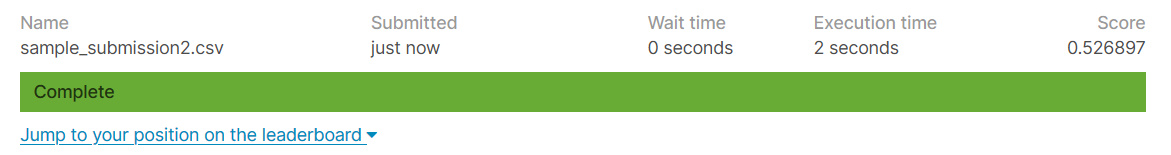

# Autoencoder without a classifier (deciding by a threshold rather than a decider network)

we are going to fit the model to generate non-fraud data so if we give the fraud data to the model, the accuracy would be much less

## Loading

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!ls "/gdrive/My Drive/"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
'Colab Notebooks'      'pics.zip (Unzipped Files)'   Proj3.zip
'Getting started.pdf'   Proj2_data


In [ ]:
with zipfile.ZipFile("/gdrive/My Drive/Proj3.zip", 'r') as zip:
  for info in zip.infolist():
    ifile = zip.open(info)
    if (info.filename=='Proj3/test_identity.csv'):
      pass
    elif (info.filename=='Proj3/train_identity.csv'):
      train_identity=pd.read_csv(ifile)
    elif (info.filename=='Proj3/train_transaction.csv'):
      train_transaction=pd.read_csv(ifile)

## train_identity preprocessing

In [ ]:
print(train_identity.shape)
train_identity.head()

(144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
train_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             2.33
id_03            54.02
id_04            54.02
id_05             5.11
id_06             5.11
id_07            96.43
id_08            96.43
id_09            48.05
id_10            48.05
id_11             2.26
id_12             0.00
id_13            11.73
id_14            44.50
id_15             2.25
id_16            10.33
id_17             3.37
id_18            68.72
id_19             3.41
id_20             3.45
id_21            96.42
id_22            96.42
id_23            96.42
id_24            96.71
id_25            96.44
id_26            96.42
id_27            96.42
id_28             2.26
id_29             2.26
id_30            46.22
id_31             2.74
id_32            46.21
id_33            49.19
id_34            46.06
id_35             2.25
id_36             2.25
id_37             2.25
id_38             2.25
DeviceType        2.37
DeviceInfo       17.73
dtype: float64

In [ ]:
for i in train_identity['id_23']:
  if(not pd.isna(i)):
    print(i)

Streaming output truncated to the last 5000 lines.
IP_PROXY:ANONYMOUS
IP_PROXY:ANONYMOUS
IP_PROXY:ANONYMOUS
IP_PROXY:ANONYMOUS
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:ANONYMOUS
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:TRANSPARENT
IP_PROXY:HIDDEN
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:ANONYMOUS
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:TRANSPARENT
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:ANONYMOUS
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:TRANSPARENT
IP_PROXY:ANONYMOUS
IP_PROXY:TRANSPARENT
IP_PROXY:TRANSPARENT
IP_PROXY:ANONYMOUS
IP_PROXY:TRANSPARENT
IP_PROXY:ANONYMOUS
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:HIDDEN
IP_PROXY:ANONYMOUS
IP_PROXY:ANONYMOUS
IP_

proxy cold be important to detect fraud so we won't delete it

In [ ]:
train_identity.drop(['id_07','id_08','id_21','id_22','id_24','id_25','id_26','id_27'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


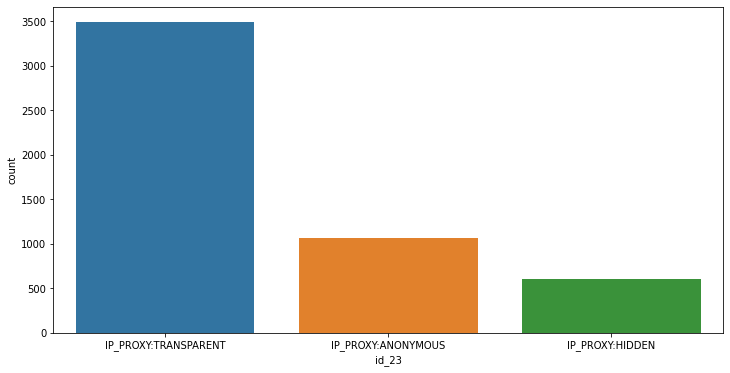

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_identity['id_23'])

In [ ]:
train_identity.fillna({'id_23':'IP_PROXY:ANONYMOUS'}, inplace=True)

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             2.33
id_03            54.02
id_04            54.02
id_05             5.11
id_06             5.11
id_09            48.05
id_10            48.05
id_11             2.26
id_12             0.00
id_13            11.73
id_14            44.50
id_15             2.25
id_16            10.33
id_17             3.37
id_18            68.72
id_19             3.41
id_20             3.45
id_23             0.00
id_28             2.26
id_29             2.26
id_30            46.22
id_31             2.74
id_32            46.21
id_33            49.19
id_34            46.06
id_35             2.25
id_36             2.25
id_37             2.25
id_38             2.25
DeviceType        2.37
DeviceInfo       17.73
dtype: float64

In [ ]:
train_identity[train_identity['id_02'].isna() & train_identity['id_11'].isna() & train_identity['id_15'].isna() & train_identity['id_28'].isna()
 & train_identity['id_29'].isna() & train_identity['id_31'].isna() & train_identity['id_35'].isna() & train_identity['id_36'].isna()
 & train_identity['id_37'].isna() & train_identity['id_38'].isna() & train_identity['DeviceType'].isna()]

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2987108,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2987319,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,2987633,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,2987912,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144127,3576982,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144128,3576983,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144132,3576991,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144144,3577056,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
delete_index = train_identity[train_identity['id_02'].isna() & train_identity['id_11'].isna() & train_identity['id_15'].isna() & train_identity['id_28'].isna()
 & train_identity['id_29'].isna() & train_identity['id_31'].isna() & train_identity['id_35'].isna() & train_identity['id_36'].isna()
 & train_identity['id_37'].isna() & train_identity['id_38'].isna() & train_identity['DeviceType'].isna()].index
train_identity.drop(index = delete_index, inplace=True)

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             0.08
id_03            52.96
id_04            52.96
id_05             2.92
id_06             2.92
id_09            46.86
id_10            46.86
id_11             0.00
id_12             0.00
id_13            12.00
id_14            43.23
id_15             0.00
id_16             8.26
id_17             1.15
id_18            68.00
id_19             1.18
id_20             1.22
id_23             0.00
id_28             0.00
id_29             0.00
id_30            44.98
id_31             0.50
id_32            44.97
id_33            48.02
id_34            44.81
id_35             0.00
id_36             0.00
id_37             0.00
id_38             0.00
DeviceType        0.12
DeviceInfo       15.83
dtype: float64

we are going to have a lot of null data in train_transaction join train_identity
so we better get rid of null columns as much as possible
but we keep columns 30(os),34(match status) because they might be important

In [ ]:
train_identity.drop(['id_03','id_04','id_09','id_10','id_14','id_18','id_32','id_33'],axis=1,inplace=True)

In [ ]:
train_identity['id_30'].value_counts()

Windows 10          21155
Windows 7           13110
iOS 11.2.1           3722
iOS 11.1.2           3699
Android 7.0          2871
                    ...  
func                   10
iOS 11.4.0              5
Mac OS X 10_13_5        4
Windows                 3
iOS 11.4.1              1
Name: id_30, Length: 75, dtype: int64

In [ ]:
windows=0
mac=0
linux=0
ios=0
android=0
other=0
for i in train_identity['id_30']:
  if (pd.isna(i)):
    pass
  elif ('Windows' in i):
    windows+=1
  elif ('Mac' in i):
    mac+=1
  elif ('Linux' in i):
    linux+=1
  elif ('iOS' in i):
    ios+=1
  elif ('Android' in i):
    android+=1
  elif ('other' in i or 'func' in i):
    other+=1
print('windows: ',windows)
print('mac: ',mac)
print('linux: ',linux)
print('ios: ',ios)
print('android: ',android)
print('other: ',other)

windows:  36739
mac:  13580
linux:  1136
ios:  19782
android:  6303
other:  25


In [ ]:
train_identity.fillna({'id_30':'linux'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


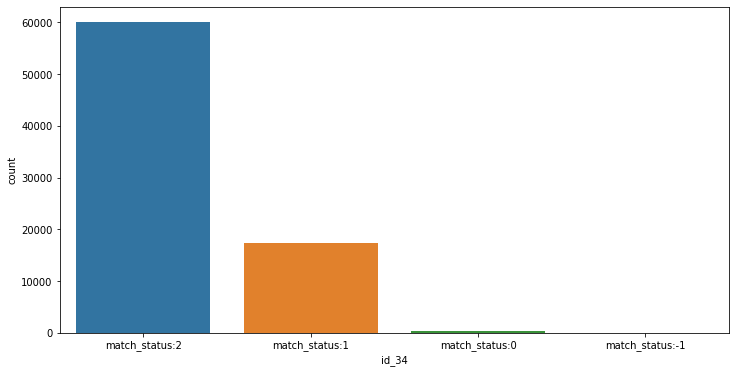

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_identity['id_34'])

In [ ]:
train_identity.fillna({'id_34':'match_status:1'}, inplace=True)

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             0.08
id_05             2.92
id_06             2.92
id_11             0.00
id_12             0.00
id_13            12.00
id_15             0.00
id_16             8.26
id_17             1.15
id_19             1.18
id_20             1.22
id_23             0.00
id_28             0.00
id_29             0.00
id_30             0.00
id_31             0.50
id_34             0.00
id_35             0.00
id_36             0.00
id_37             0.00
id_38             0.00
DeviceType        0.12
DeviceInfo       15.83
dtype: float64

In [ ]:
train_identity[train_identity['id_05'].isna() & train_identity['id_06'].isna() & train_identity['id_17'].isna() & train_identity['id_19'].isna()
 & train_identity['id_20'].isna()]

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
303,2988062,-70.0,70894.0,NaN,NaN,100.000000,NotFound,57.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 62.0 for android,match_status:1,F,F,T,T,mobile,Blade V6 Plus Build/MRA58K
304,2988064,-70.0,400890.0,NaN,NaN,100.000000,NotFound,57.0,Found,Found,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 62.0 for android,match_status:1,F,F,T,T,mobile,Blade V6 Plus Build/MRA58K
336,2988389,-15.0,75604.0,NaN,NaN,90.910004,NotFound,52.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,Windows 7,chrome 62.0,match_status:1,T,F,T,F,desktop,Windows
383,2988749,-15.0,108803.0,NaN,NaN,100.000000,NotFound,52.0,Found,Found,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 62.0,match_status:1,F,F,T,T,desktop,Windows
397,2988823,-15.0,135971.0,NaN,NaN,97.269997,NotFound,52.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,Windows 7,chrome 62.0,match_status:2,T,F,T,F,desktop,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144036,3576423,-15.0,118746.0,NaN,NaN,100.000000,NotFound,52.0,Found,Found,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,Windows 10,ie 11.0 for desktop,match_status:2,T,F,T,T,desktop,Trident/7.0
144056,3576560,-10.0,41910.0,NaN,NaN,100.000000,NotFound,51.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,New,NotFound,Windows 7,chrome 55.0,match_status:2,T,T,T,T,desktop,Windows
144083,3576684,-16.0,71681.0,NaN,NaN,100.000000,NotFound,52.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,New,NotFound,Windows 10,chrome 65.0,match_status:2,T,F,T,F,desktop,Windows
144113,3576874,-15.0,383816.0,NaN,NaN,92.660004,NotFound,52.0,New,NotFound,NaN,NaN,NaN,IP_PROXY:ANONYMOUS,Found,Found,Windows 10,ie 11.0 for tablet,match_status:2,T,F,T,T,desktop,Trident/7.0


In [ ]:
delete_index = train_identity[train_identity['id_05'].isna() & train_identity['id_06'].isna() & train_identity['id_17'].isna() & train_identity['id_19'].isna()
 & train_identity['id_20'].isna()].index
train_identity.drop(index = delete_index, inplace=True)

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             0.00
id_05             1.82
id_06             1.82
id_11             0.00
id_12             0.00
id_13            12.13
id_15             0.00
id_16             8.22
id_17             0.03
id_19             0.06
id_20             0.10
id_23             0.00
id_28             0.00
id_29             0.00
id_30             0.00
id_31             0.18
id_34             0.00
id_35             0.00
id_36             0.00
id_37             0.00
id_38             0.00
DeviceType        0.04
DeviceInfo       15.71
dtype: float64

In [ ]:
train_identity[train_identity['id_13'].isna() & train_identity['id_16'].isna()]

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo


device type is much more important than device info so we can remove device info column

In [ ]:
train_identity.drop(['DeviceInfo'],axis=1,inplace=True)

In [ ]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139406 entries, 0 to 144232
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  139406 non-null  int64  
 1   id_01          139406 non-null  float64
 2   id_02          139405 non-null  float64
 3   id_05          136865 non-null  float64
 4   id_06          136865 non-null  float64
 5   id_11          139406 non-null  float64
 6   id_12          139406 non-null  object 
 7   id_13          122493 non-null  float64
 8   id_15          139406 non-null  object 
 9   id_16          127951 non-null  object 
 10  id_17          139369 non-null  float64
 11  id_19          139318 non-null  float64
 12  id_20          139261 non-null  float64
 13  id_23          139406 non-null  object 
 14  id_28          139406 non-null  object 
 15  id_29          139406 non-null  object 
 16  id_30          139406 non-null  object 
 17  id_31          139161 non-nul

In [ ]:
train_identity.fillna({'id_02':train_identity['id_02'].mean() ,'id_05':train_identity['id_05'].mean() ,'id_06':train_identity['id_06'].mean() ,
                       'id_13':train_identity['id_13'].mean() ,'id_17':train_identity['id_17'].mean() ,
                       'id_19':train_identity['id_19'].mean() ,'id_20':train_identity['id_20'].mean()},inplace=True)

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID    0.00
id_01            0.00
id_02            0.00
id_05            0.00
id_06            0.00
id_11            0.00
id_12            0.00
id_13            0.00
id_15            0.00
id_16            8.22
id_17            0.00
id_19            0.00
id_20            0.00
id_23            0.00
id_28            0.00
id_29            0.00
id_30            0.00
id_31            0.18
id_34            0.00
id_35            0.00
id_36            0.00
id_37            0.00
id_38            0.00
DeviceType       0.04
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


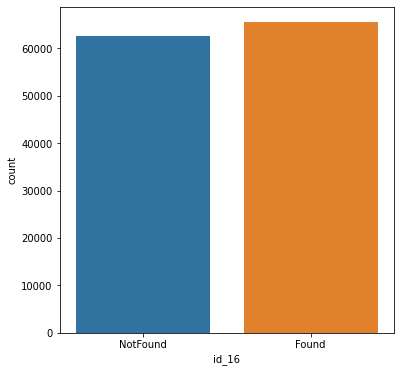

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(train_identity['id_16'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


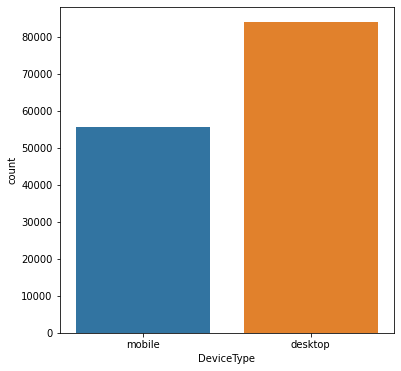

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(train_identity['DeviceType'])

In [ ]:
train_identity.fillna({'id_16':'Found' , 'DeviceType':'desktop' }, inplace=True)

In [ ]:
delete_index = train_identity[train_identity['id_31'].isna()].index
train_identity.drop(index = delete_index, inplace=True)

In [ ]:
train_identity.isna().sum()

TransactionID    0
id_01            0
id_02            0
id_05            0
id_06            0
id_11            0
id_12            0
id_13            0
id_15            0
id_16            0
id_17            0
id_19            0
id_20            0
id_23            0
id_28            0
id_29            0
id_30            0
id_31            0
id_34            0
id_35            0
id_36            0
id_37            0
id_38            0
DeviceType       0
dtype: int64

In [ ]:
train_identity

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType
0,2987004,0.0,70787.0,1.615585,-6.69871,100.0,NotFound,48.885659,New,NotFound,166.0,542.0,144.0,IP_PROXY:ANONYMOUS,New,NotFound,Android 7.0,samsung browser 6.2,match_status:2,T,F,T,T,mobile
1,2987008,-5.0,98945.0,0.000000,-5.00000,100.0,NotFound,49.000000,New,NotFound,166.0,621.0,500.0,IP_PROXY:ANONYMOUS,New,NotFound,iOS 11.1.2,mobile safari 11.0,match_status:1,T,F,F,T,mobile
2,2987010,-5.0,191631.0,0.000000,0.00000,100.0,NotFound,52.000000,Found,Found,121.0,410.0,142.0,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 62.0,match_status:1,F,F,T,T,desktop
3,2987011,-5.0,221832.0,0.000000,-6.00000,100.0,NotFound,52.000000,New,NotFound,225.0,176.0,507.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 62.0,match_status:1,F,F,T,T,desktop
4,2987016,0.0,7460.0,1.000000,0.00000,100.0,NotFound,48.885659,Found,Found,166.0,529.0,575.0,IP_PROXY:ANONYMOUS,Found,Found,Mac OS X 10_11_6,chrome 62.0,match_status:2,T,F,T,T,desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.000000,0.00000,100.0,NotFound,27.000000,Found,Found,225.0,427.0,139.0,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 66.0 for android,match_status:1,F,F,T,F,mobile
144229,3577526,-5.0,172059.0,1.000000,-5.00000,100.0,NotFound,27.000000,New,NotFound,166.0,352.0,333.0,IP_PROXY:ANONYMOUS,New,NotFound,Android 7.1.1,chrome 55.0 for android,match_status:2,T,F,T,F,mobile
144230,3577529,-20.0,632381.0,-1.000000,-36.00000,100.0,NotFound,27.000000,New,NotFound,225.0,567.0,411.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 65.0 for android,match_status:1,F,F,T,F,mobile
144231,3577531,-5.0,55528.0,0.000000,-7.00000,100.0,NotFound,27.000000,Found,Found,166.0,352.0,368.0,IP_PROXY:ANONYMOUS,Found,Found,Mac OS X 10_9_5,chrome 66.0,match_status:2,T,F,T,F,desktop


In [ ]:
train_identity_finalColumns_beforeScaling=train_identity.columns

In [ ]:
train_identity_mean={}
for i in train_identity.columns:
  try:
    train_identity_mean[i]=train_identity[i].mean()
  except:
    train_identity_mean[i]=train_identity[i].mode()[0]

scaling:

In [ ]:
labelencoder=LabelEncoder()
columns=train_identity.columns
for i in range(1,train_identity.shape[1]):
  ind=columns[i]
  if (i==13 or i==16 or i==18 or i==23):
    continue
  if (i==6 or i==8 or i==9 or (i<=22 and i>=19)  or (i<=17 and i>=14)):
    train_identity[ind]=train_identity[ind].astype('str')
    train_identity[ind] = labelencoder.fit_transform(train_identity[ind])
  minn=min(train_identity[ind])
  maxx=max(train_identity[ind])
  if(minn==maxx):
    minn=0
  train_identity[ind]=(train_identity[ind]-minn)/(maxx-minn)

In [ ]:
train_identity=(pd.concat([train_identity,pd.get_dummies(train_identity.id_23,prefix='proxy')],axis=1)).drop(['id_23'],axis=1)

In [ ]:
windows=[]
mac=[]
linux=[]
ios=[]
android=[]
other=[]
for i in train_identity['id_30']:
  if (pd.isna(i)):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Windows' in i):
    windows.append(1)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Mac' in i):
    windows.append(0)
    mac.append(1)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Linux' in i or 'linux' in i):
    windows.append(0)
    mac.append(0)
    linux.append(1)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('iOS' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(1)
    android.append(0)
    other.append(0)
  elif ('Android' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(1)
    other.append(0)
  elif ('other' in i or 'func' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(1)

train_identity['isWind']=windows
train_identity['isMac']=mac
train_identity['isLinux']=linux
train_identity['isIOS']=ios
train_identity['isAndroid']=android
train_identity['isOther']=other

version of the os might also be important so:

In [ ]:
train_identity['id_30']=train_identity['id_30'].astype('str')
train_identity['id_30'] = labelencoder.fit_transform(train_identity['id_30'])

In [ ]:
minn=min(x for x in train_identity['id_30'] if not pd.isna(x))
maxx=max(x for x in train_identity['id_30'] if not pd.isna(x))
train_identity['id_30']=(train_identity['id_30']-minn)/(maxx-minn)

In [ ]:
del(windows)
del(mac)
del(ios)
del(linux)
del(android)
del(other)

In [ ]:
train_identity=(pd.concat([train_identity,pd.get_dummies(train_identity.id_34,prefix='')],axis=1)).drop(['id_34'],axis=1)

In [ ]:
train_identity=(pd.concat([train_identity,pd.get_dummies(train_identity.DeviceType,prefix='')],axis=1)).drop(['DeviceType'],axis=1)

In [ ]:
print(train_identity.shape)
train_identity.head()

(139161, 36)


,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
0,2987004,1.00,0.070815,0.593674,0.933013,1.0,1.0,0.720105,0.5,1.0,0.511628,0.774081,0.078431,1.0,1.0,0.093333,0.953488,1.0,0.0,1.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,2987008,0.95,0.098984,0.580645,0.950000,1.0,1.0,0.722222,0.5,1.0,0.511628,0.912434,0.713012,1.0,1.0,0.840000,0.759690,1.0,0.0,0.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2987010,0.95,0.191708,0.580645,1.000000,1.0,1.0,0.777778,0.0,0.0,0.162791,0.542907,0.074866,0.0,0.0,0.986667,0.341085,0.0,0.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,2987011,0.95,0.221921,0.580645,0.940000,1.0,1.0,0.777778,0.5,1.0,0.968992,0.133100,0.725490,1.0,1.0,0.986667,0.341085,0.0,0.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,2987016,1.00,0.007462,0.588710,1.000000,1.0,1.0,0.720105,0.0,0.0,0.511628,0.751313,0.846702,0.0,0.0,0.320000,0.341085,1.0,0.0,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [ ]:
train_identity_finalColumns=train_identity.columns

In [ ]:
(pd.Series(train_identity_finalColumns_beforeScaling,index=train_identity_finalColumns_beforeScaling).to_csv('train_identity_finalColumns_beforeScaling',header=False))

In [ ]:
(pd.Series(train_identity_finalColumns,index=train_identity_finalColumns).to_csv('train_identity_finalColumns',header=False))

In [ ]:
(pd.DataFrame.from_dict(train_identity_mean, orient="index")).to_csv('train_identity_mean',header=False)

## train_transaction preprocessing

In [ ]:
print(train_transaction.shape)
train_transaction.head()

(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#join the two dataframes
train_transaction=train_transaction.set_index('TransactionID').join(train_identity.set_index('TransactionID'))

filling fraud rows with the mean of fraud rows and not fraud rows with the mean of not fraud rows

In [ ]:
train_transaction1=train_transaction[train_transaction['isFraud']==1]
train_transaction0=train_transaction[train_transaction['isFraud']==0]

In [ ]:
for i in range(393,train_transaction.shape[1]):
  ind=train_transaction.columns[i]
  train_transaction0.fillna({ind : train_transaction0[ind].mean()}, inplace=True)
  train_transaction1.fillna({ind : train_transaction1[ind].mean()}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(393):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",round(nullNumbers0[i] * 100 / train_transaction0.shape[0] , 2))
    print(train_transaction1.columns[i]+'_'+str(1),"\t",round(nullNumbers1[i] * 100 / train_transaction1.shape[0] , 2))
    print()


card2_0 	 1.49
card2_1 	 2.05

card3_0 	 0.27
card3_1 	 0.19

card4_0 	 0.27
card4_1 	 0.2

card5_0 	 0.71
card5_1 	 1.02

card6_0 	 0.27
card6_1 	 0.19

addr1_0 	 10.17
addr1_1 	 37.46

addr2_0 	 10.17
addr2_1 	 37.46

dist1_0 	 59.02
dist1_1 	 76.99

dist2_0 	 94.05
dist2_1 	 81.94

P_emaildomain_0 	 16.09
P_emaildomain_1 	 13.5

R_emaildomain_0 	 77.88
R_emaildomain_1 	 45.67

D1_0 	 0.21
D1_1 	 0.22

D2_0 	 47.03
D2_1 	 61.91

D3_0 	 44.19
D3_1 	 53.45

D4_0 	 28.57
D4_1 	 29.5

D5_0 	 52.65
D5_1 	 47.35

D6_0 	 88.51
D6_1 	 62.65

D7_0 	 94.19
D7_1 	 71.98

D8_0 	 88.23
D8_1 	 62.12

D9_0 	 88.23
D9_1 	 62.12

D10_0 	 12.66
D10_1 	 18.81

D11_0 	 46.45
D11_1 	 70.45

D12_0 	 89.98
D12_1 	 63.23

D13_0 	 90.33
D13_1 	 66.91

D14_0 	 90.35
D14_1 	 65.09

D15_0 	 14.89
D15_1 	 20.69

M1_0 	 45.06
M1_1 	 69.31

M2_0 	 45.06
M2_1 	 69.31

M3_0 	 45.06
M3_1 	 69.31

M4_0 	 48.47
M4_1 	 25.3

M5_0 	 59.2
M5_1 	 63.37

M6_0 	 27.62
M6_1 	 57.93

M7_0 	 57.98
M7_1 	 76.69

M8_0 	 57.98
M8_

In [ ]:
for i in range(322,340):
  train_transaction0.drop('V'+str(i),axis=1,inplace=True)
  train_transaction1.drop('V'+str(i),axis=1,inplace=True)
for i in range(138,167):
  train_transaction0.drop('V'+str(i),axis=1,inplace=True)
  train_transaction1.drop('V'+str(i),axis=1,inplace=True)
train_transaction0.drop('dist2',axis=1,inplace=True)
train_transaction1.drop('dist2',axis=1,inplace=True)

train_transaction0.drop('D7',axis=1,inplace=True)
train_transaction1.drop('D7',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


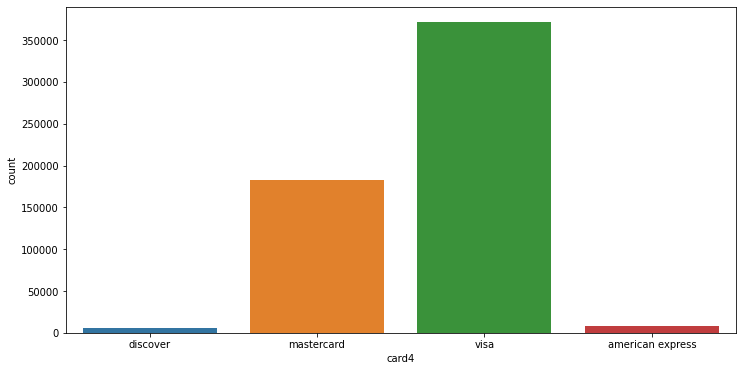

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_transaction0['card4'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


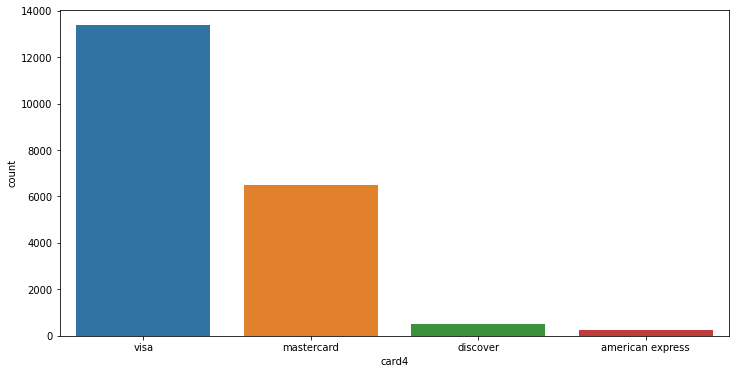

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_transaction1['card4'])

In [ ]:
train_transaction0.fillna({'card4':'visa'}, inplace=True)
train_transaction1.fillna({'card4':'visa'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


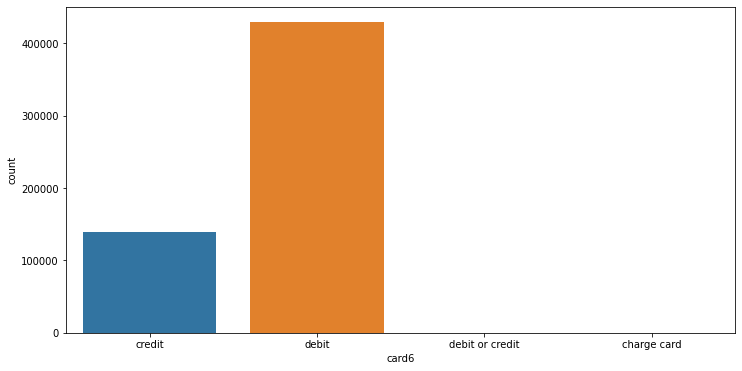

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_transaction0['card6'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


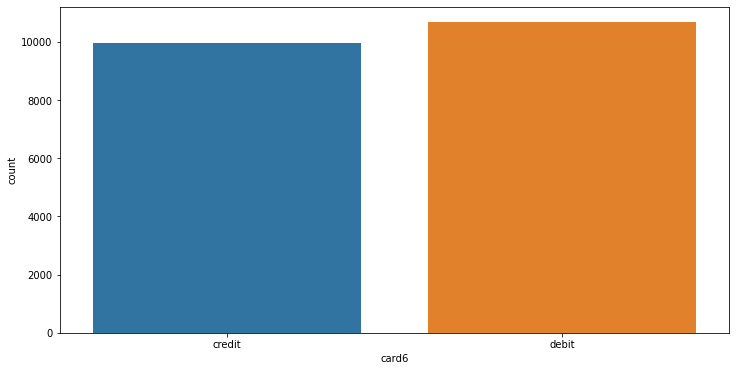

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(train_transaction1['card6'])

In [ ]:
train_transaction0.fillna({'card6':'debit'}, inplace=True)
train_transaction1.fillna({'card6':'debit'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['P_emaildomain'].value_counts()

gmail.com           218412
yahoo.com            98637
hotmail.com          42854
anonymous.com        36139
aol.com              27672
comcast.net           7642
icloud.com            6070
outlook.com           4614
att.net               4003
msn.com               4002
sbcglobal.net         2958
live.com              2957
verizon.net           2683
ymail.com             2346
bellsouth.net         1856
yahoo.com.mx          1527
me.com                1495
cox.net               1364
optonline.net          994
charter.net            791
live.com.mx            708
rocketmail.com         662
earthlink.net          503
gmail                  485
mail.com               453
mac.com                422
outlook.es             381
juno.com               316
windstream.net         305
roadrunner.com         302
hotmail.fr             295
hotmail.es             285
aim.com                275
frontier.com           272
embarqmail.com         251
web.de                 240
netzero.com            230
t

In [ ]:
train_transaction1['P_emaildomain'].value_counts()

gmail.com          9943
hotmail.com        2396
yahoo.com          2297
anonymous.com       859
aol.com             617
outlook.com         482
comcast.net         246
icloud.com          197
mail.com            106
msn.com              90
live.com             84
outlook.es           57
bellsouth.net        53
ymail.com            50
live.com.mx          41
aim.com              40
protonmail.com       31
att.net              30
cox.net              29
me.com               27
charter.net          25
verizon.net          22
hotmail.es           20
optonline.net        17
yahoo.com.mx         16
mac.com              14
sbcglobal.net        12
earthlink.net        11
gmail                11
embarqmail.com        9
frontier.com          8
juno.com              6
yahoo.fr              5
frontiernet.net       5
suddenlink.net        4
cableone.net          3
roadrunner.com        3
rocketmail.com        2
yahoo.es              2
prodigy.net.mx        1
netzero.net           1
sc.rr.com       

In [ ]:
ratio=dict(train_transaction0['P_emaildomain'].value_counts())
ratio1=dict(train_transaction1['P_emaildomain'].value_counts())
for i in ratio1.keys():
  if (ratio[i]):
    ratio[i]/=ratio1[i]
  else:
    ratio[i]=(-1)*ratio1[i]

In [ ]:
train_transaction0.fillna({'P_emaildomain':max(ratio,key=ratio.get)}, inplace=True)
train_transaction1.fillna({'P_emaildomain':min(ratio,key=ratio.get)}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['R_emaildomain'].value_counts()

gmail.com           50336
hotmail.com         25369
anonymous.com       19931
yahoo.com           11232
aol.com              3572
outlook.com          2093
comcast.net          1791
yahoo.com.mx         1492
icloud.com           1218
msn.com               851
live.com              724
live.com.mx           710
verizon.net           620
sbcglobal.net         551
me.com                545
cox.net               448
att.net               430
bellsouth.net         420
outlook.es            376
hotmail.fr            293
hotmail.es            272
web.de                237
mac.com               216
prodigy.net.mx        206
ymail.com             199
optonline.net         185
gmx.de                147
yahoo.fr              132
charter.net           122
hotmail.co.uk         105
gmail                  95
mail.com               76
yahoo.de               75
earthlink.net          73
embarqmail.com         68
rocketmail.com         66
scranton.edu           63
yahoo.es               55
live.fr     

In [ ]:
train_transaction1['R_emaildomain'].value_counts()

gmail.com         6811
hotmail.com       2140
yahoo.com          610
anonymous.com      598
outlook.com        414
icloud.com         180
aol.com            129
outlook.es          57
mail.com            46
live.com.mx         44
protonmail.com      39
live.com            38
comcast.net         21
hotmail.es          20
yahoo.com.mx        16
cox.net             11
me.com              11
ymail.com            8
earthlink.net        6
yahoo.fr             5
charter.net          5
rocketmail.com       3
yahoo.es             2
bellsouth.net        2
optonline.net        2
mac.com              2
netzero.net          2
prodigy.net.mx       1
msn.com              1
sbcglobal.net        1
aim.com              1
suddenlink.net       1
Name: R_emaildomain, dtype: int64

In [ ]:
ratio=dict(train_transaction0['R_emaildomain'].value_counts())
ratio1=dict(train_transaction1['R_emaildomain'].value_counts())
for i in ratio1.keys():
  if (ratio[i]):
    ratio[i]/=ratio1[i]
  else:
    ratio[i]=(-1)*ratio1[i]

In [ ]:
train_transaction0.fillna({'R_emaildomain':max(ratio,key=ratio.get)}, inplace=True)
train_transaction1.fillna({'R_emaildomain':min(ratio,key=ratio.get)}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M1'].value_counts()

T    313073
F        25
Name: M1, dtype: int64

In [ ]:
train_transaction1['M1'].value_counts()

T    6342
Name: M1, dtype: int64

In [ ]:
train_transaction0.fillna({'M1':'F'}, inplace=True)
train_transaction1.fillna({'M1':'T'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M2'].value_counts()

T    280310
F     32788
Name: M2, dtype: int64

In [ ]:
train_transaction1['M2'].value_counts()

T    5158
F    1184
Name: M2, dtype: int64

In [ ]:
train_transaction0.fillna({'M2':'T'}, inplace=True)
train_transaction1.fillna({'M2':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M3'].value_counts()

T    247438
F     65660
Name: M3, dtype: int64

In [ ]:
train_transaction1['M3'].value_counts()

T    4293
F    2049
Name: M3, dtype: int64

In [ ]:
train_transaction0.fillna({'M3':'T'}, inplace=True)
train_transaction1.fillna({'M3':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M4'].value_counts()

M0    189207
M2     53056
M1     51397
Name: M4, dtype: int64

In [ ]:
train_transaction1['M4'].value_counts()

M0    7198
M2    6809
M1    1429
Name: M4, dtype: int64

In [ ]:
train_transaction0.fillna({'M4':'M1'}, inplace=True)
train_transaction1.fillna({'M4':'M2'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M5'].value_counts()

F    128977
T    103512
Name: M5, dtype: int64

In [ ]:
train_transaction1['M5'].value_counts()

T    4055
F    3514
Name: M5, dtype: int64

In [ ]:
train_transaction0.fillna({'M5':'F'}, inplace=True)
train_transaction1.fillna({'M5':'T'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M6'].value_counts()

F    222459
T    190029
Name: M6, dtype: int64

In [ ]:
train_transaction1['M6'].value_counts()

F    5397
T    3295
Name: M6, dtype: int64

In [ ]:
train_transaction0.fillna({'M6':'T'}, inplace=True)
train_transaction1.fillna({'M6':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M7'].value_counts()

F    207285
T     32173
Name: M7, dtype: int64

In [ ]:
train_transaction1['M7'].value_counts()

F    4089
T     728
Name: M7, dtype: int64

In [ ]:
train_transaction0.fillna({'M7':'F'}, inplace=True)
train_transaction1.fillna({'M7':'T'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M8'].value_counts()

F    151878
T     87593
Name: M8, dtype: int64

In [ ]:
train_transaction1['M8'].value_counts()

F    3373
T    1444
Name: M8, dtype: int64

In [ ]:
train_transaction0.fillna({'M8':'T'}, inplace=True)
train_transaction1.fillna({'M8':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M9'].value_counts()

T    201998
F     37473
Name: M9, dtype: int64

In [ ]:
train_transaction1['M9'].value_counts()

T    3658
F    1159
Name: M9, dtype: int64

In [ ]:
train_transaction0.fillna({'M9':'T'}, inplace=True)
train_transaction1.fillna({'M9':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(364):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",nullNumbers0[i])
    print(train_transaction1.columns[i]+'_'+str(1),"\t",nullNumbers1[i])
    print()


card2_0 	 8510
card2_1 	 423

card3_0 	 1526
card3_1 	 39

card5_0 	 4049
card5_1 	 210

addr1_0 	 57965
addr1_1 	 7741

addr2_0 	 57965
addr2_1 	 7741

dist1_0 	 336363
dist1_1 	 15908

D1_0 	 1223
D1_1 	 46

D2_0 	 268004
D2_1 	 12793

D3_0 	 251834
D3_1 	 11044

D4_0 	 162826
D4_1 	 6096

D5_0 	 300058
D5_1 	 9783

D6_0 	 504408
D6_1 	 12945

D8_0 	 502778
D8_1 	 12836

D9_0 	 502778
D9_1 	 12836

D10_0 	 72136
D10_1 	 3886

D11_0 	 264730
D11_1 	 14557

D12_0 	 512758
D12_1 	 13065

D13_0 	 514762
D13_1 	 13826

D14_0 	 514903
D14_1 	 13450

D15_0 	 84837
D15_1 	 4276

V1_0 	 264730
V1_1 	 14557

V2_0 	 264730
V2_1 	 14557

V3_0 	 264730
V3_1 	 14557

V4_0 	 264730
V4_1 	 14557

V5_0 	 264730
V5_1 	 14557

V6_0 	 264730
V6_1 	 14557

V7_0 	 264730
V7_1 	 14557

V8_0 	 264730
V8_1 	 14557

V9_0 	 264730
V9_1 	 14557

V10_0 	 264730
V10_1 	 14557

V11_0 	 264730
V11_1 	 14557

V12_0 	 72186
V12_1 	 3887

V13_0 	 72186
V13_1 	 3887

V14_0 	 72186
V14_1 	 3887

V15_0 	 72186
V15_1 	 38

In [ ]:
a=train_transaction0['V295'].isna()
b=train_transaction1['V295'].isna()
for i in range(295,322):
  try:
    if (nullNumbers0['V'+str(i)]==10  and nullNumbers1['V'+str(i)]==2):
      a=a&(train_transaction0['V'+str(i)].isna())
      b=b&(train_transaction1['V'+str(i)].isna())
  except:
    pass
train_transaction0[a]

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3010947,0,606971,139.944,C,12616,490.0,150.0,visa,NaN,credit,NaN,NaN,NaN,hotmail.com,hotmail.com,3.0,6.0,0.0,3.0,0.0,3.0,3.0,5.0,0.0,5.0,5.0,5.0,6.0,3.0,498.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3014325,0,686866,10.950,W,12616,490.0,150.0,visa,NaN,credit,325.0,87.0,NaN,gmail.com,msn.com,260.0,237.0,0.0,0.0,86.0,292.0,0.0,0.0,156.0,0.0,219.0,1.0,485.0,158.0,506.0,NaN,NaN,9.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3015721,0,738846,30.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,NaN,gmail.com,msn.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,120.0,6.0,210.0,210.0,2.0,22.0,2.0,NaN,NaN,NaN,141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3015734,0,739153,39.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,7.0,gmail.com,msn.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,121.0,6.0,210.0,210.0,0.0,22.0,0.0,NaN,NaN,NaN,141.0,265.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3015752,0,739505,30.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,NaN,gmail.com,msn.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,121.0,6.0,210.0,210.0,0.0,22.0,0.0,NaN,NaN,NaN,141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3015764,0,739690,39.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,7.0,gmail.com,msn.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,122.0,6.0,210.0,210.0,0.0,22.0,0.0,NaN,NaN,NaN,141.0,265.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.722190,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3018095,0,771123,20.988,C,12616,490.0,150.0,visa,NaN,credit,NaN,NaN,NaN,rocketmail.com,

In [ ]:
delete_index = train_transaction0[a].index
train_transaction0.drop(index = delete_index, inplace=True)
delete_index = train_transaction1[b].index
train_transaction1.drop(index = delete_index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
a=train_transaction0['V95'].isna()
for i in range(95,322):
  try:
    if (nullNumbers0['V'+str(i)]==297  and nullNumbers1['V'+str(i)]==17):
      a=a&(train_transaction0['V'+str(i)].isna())
  except:
    pass
train_transaction0[a]

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3427618,0,11187972,57.950,W,6530,206.0,150.0,mastercard,126.0,debit,191.0,87.0,126.0,anonymous.com,msn.com,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,4.0,1.0,153.0,153.0,45.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3434742,0,11400049,107.950,W,6804,555.0,150.0,visa,226.0,debit,327.0,87.0,NaN,gmail.com,msn.com,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3434780,0,11400724,335.000,W,12766,512.0,150.0,mastercard,224.0,debit,272.0,87.0,12.0,gmail.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,25.0,25.0,25.0,25.0,25.0,NaN,NaN,NaN,25.0,25.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
3434805,0,11401168,26.621,C,11837,304.0,146.0,visa,226.0,credit,NaN,NaN,NaN,web.de,web.de,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.900000,0.270962,0.588710,1.000000,1.000000,1.000000,1.00000,0.50000,1.000000,0.968992,0.133100,0.882353,1.00000,1.000000,0.986667,0.410853,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
3442762,0,11653247,57.950,W,9234,555.0,150.0,mastercard,224.0,debit,253.0,87.0,0.0,yahoo.com,msn.com,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,13.0,2.0,364.0,364.0,216.0,364.0,83.0,NaN,NaN,NaN,519.0,419.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509785,0,13730343,20.288,C,2801,130.0,185.0,visa,137.0,credit,NaN,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.800000,0.254459,0.580645,1.000000,1.000000,1.000000,1.00000,1.00000,0.000000,0.968992,0.5

In [ ]:
delete_index = train_transaction0[a].index
train_transaction0.drop(index = delete_index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
for i in range(95,322):
  try:
    if (nullNumbers1['V'+str(i)]==17):
      train_transaction1.fillna({'V'+str(i): train_transaction1['V'+str(i)].mean() }, inplace=True)
  except:
    pass


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
for i in range(train_transaction0.shape[1]):
  ind = train_transaction0.columns[i]
  if (round(train_transaction0[ind].isna().sum() * 100 / train_transaction0.shape[0] , 2)>70 and
      round(train_transaction1[ind].isna().sum() * 100 / train_transaction1.shape[0] , 2)>45):
    train_transaction0.fillna({ind:0} , inplace=True)
    train_transaction1.fillna({ind:train_transaction0[ind].mode()[0]} , inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
delete_columns=[]
for i in range(train_transaction0.shape[1]):
  ind = train_transaction0.columns[i]
  if (round(train_transaction0[ind].isna().sum() * 100 / train_transaction0.shape[0] , 2)>45 and
      round(train_transaction1[ind].isna().sum() * 100 / train_transaction1.shape[0] , 2)>70):
    delete_columns.append(ind)

In [ ]:
train_transaction0.drop(delete_columns,axis=1,inplace=True)
train_transaction1.drop(delete_columns,axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:

for i in range(train_transaction0.shape[1]):
  ind = train_transaction0.columns[i]
  if (round(train_transaction0[ind].isna().sum() * 100 / train_transaction0.shape[0] , 2)<20 and
      round(train_transaction1[ind].isna().sum() * 100 / train_transaction1.shape[0] , 2)<20):
    train_transaction0.drop( train_transaction0[train_transaction0[ind].isna()].index,inplace=True )
    train_transaction1.drop( train_transaction1[train_transaction1[ind].isna()].index,inplace=True )


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(364):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",round(nullNumbers0[i]* 100 / train_transaction0.shape[0] , 2))
    print(train_transaction1.columns[i]+'_'+str(1),"\t",round(nullNumbers1[i]* 100 / train_transaction1.shape[0] , 2))
    print()


addr1_0 	 13.03
addr1_1 	 46.26

addr2_0 	 13.03
addr2_1 	 46.26

D2_0 	 42.83
D2_1 	 57.16

D3_0 	 37.82
D3_1 	 41.79

D5_0 	 33.38
D5_1 	 24.69



In [ ]:
train_transaction0['D3'].mode()

0    0.0
dtype: float64

In [ ]:
train_transaction0.fillna({'D5':train_transaction0['D5'].mean()},inplace=True)
train_transaction1.fillna({'D5':train_transaction1['D5'].mean()},inplace=True)
train_transaction0.fillna({'addr1':train_transaction0['addr1'].mean()},inplace=True)
train_transaction1.fillna({'addr1':train_transaction1['addr1'].mode()[0]},inplace=True)
train_transaction0.fillna({'addr2':train_transaction0['addr2'].mean()},inplace=True)
train_transaction1.fillna({'addr2':train_transaction1['addr2'].mode()[0]},inplace=True)
train_transaction0.fillna({'D2':train_transaction0['D2'].mean()},inplace=True)
train_transaction1.fillna({'D2':train_transaction1['D2'].mode()[0]},inplace=True)
train_transaction0.fillna({'D3':train_transaction0['D3'].mean()},inplace=True)
train_transaction1.fillna({'D3':train_transaction1['D3'].mean()},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(364):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",round(nullNumbers0[i]* 100 / train_transaction0.shape[0] , 2))
    print(train_transaction1.columns[i]+'_'+str(1),"\t",round(nullNumbers1[i]* 100 / train_transaction1.shape[0] , 2))
    print()


Now we have no null data

In [ ]:
train_transaction=pd.concat((train_transaction0,train_transaction1))

In [ ]:
train_transaction.isna().sum().sum()

0

In [ ]:
print(train_transaction.shape)
train_transaction.head()

(403838, 366)


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,169.526599,29.620166,0.0,42.694892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.526599,29.620166,0.0,42.694892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,msn.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.000000,0.000000,94.0,0.000000,0.0,0.0,0.0,84.0,0.0,0.0,0.0,...,1404.0,790.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,gmail.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.526599,29.620166,0.0,42.694892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,yahoo.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.526599,29.620166,0.0,42.694892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404


In [ ]:
train_transaction_finalColumns_beforeScaling=train_transaction.columns

In [ ]:
train_transaction_mean={}
for i in train_transaction.columns:
  try:
    train_transaction_mean[i]=round(train_transaction[i].mean(),6)
  except:
    train_transaction_mean[i]=train_transaction[i].mode()[0]

scaling

In [ ]:
train_transaction.columns[330]

'V321'

In [ ]:
#3 W,H->oneHot
#7 discover ,mastercard, visa ,american express,->oneHot
#9 credit,debit,credit or debit,charge card->oneHot
#12,13 labelEncoding
#41-49 T,F-> labelEncoding
columns=train_transaction.columns
for i in range(1,331):
  ind=columns[i]
  if (i==3 or i==7 or i==9 ):
    continue
  if (i==12 or i==13 or (i<=49 and i>=41)):
    train_transaction[ind]=train_transaction[ind].astype('str')
    train_transaction[ind] = labelencoder.fit_transform(train_transaction[ind])
  minn=min(train_transaction[ind])
  maxx=max(train_transaction[ind])
  if(minn==maxx):
    minn=0
  train_transaction[ind]=(train_transaction[ind]-minn)/(maxx-minn)



In [ ]:
print(train_transaction.shape)
train_transaction.head()

(403838, 366)


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987001,0,0.000000,0.000900,W,0.100891,0.608,0.381679,mastercard,0.014599,credit,0.511364,0.831461,0.275862,0.566038,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,...,0.000000,0.000000,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987002,0,0.000004,0.001840,W,0.210578,0.780,0.381679,visa,0.481752,debit,0.522727,0.831461,0.603448,0.566038,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,...,0.000000,0.000000,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987003,0,0.000006,0.001558,W,0.984881,0.934,0.381679,mastercard,0.124088,debit,0.854545,0.831461,0.913793,0.566038,0.000514,0.001656,0.0,0.0,0.0,0.002553,0.0,0.0,0.004762,0.0,0.0,0.0,0.014758,0.001266,0.175274,0.175274,0.000000,0.192872,0.0000,0.089633,0.0,0.0,0.099644,0.113543,0.0,0.089633,...,0.021981,0.012368,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987005,0,0.000007,0.001526,W,0.283817,0.910,0.381679,visa,0.919708,debit,0.390909,0.831461,0.275862,0.566038,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,...,0.000000,0.000000,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404
2987006,0,0.000008,0.004971,W,0.650072,0.520,0.381679,visa,0.481752,debit,0.059091,0.831461,0.913793,0.566038,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,...,0.000000,0.000000,0.0,0.0,0.0,0.905551,0.173244,0.593763,0.934372,0.974664,0.852261,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404


In [ ]:
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.ProductCD,prefix='cd')],axis=1)).drop(['ProductCD'],axis=1)

In [ ]:
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.card4,prefix='card4')],axis=1)).drop(['card4'],axis=1)

In [ ]:
credit=[]
debit=[]
charge=[]
for i in train_transaction['card6']:
  if i=='credit':
    credit.append(1)
    debit.append(0)
    charge.append(0)
  elif i=='debit':
    credit.append(0)
    debit.append(1)
    charge.append(0)
  elif i=='debit or credit':
    credit.append(0.5)
    debit.append(0.5)
    charge.append(0)
  elif i=='charge card':
    credit.append(0)
    debit.append(0)
    charge.append(1)

train_transaction['credit']=credit
train_transaction['debit']=debit
train_transaction['charge_card']=charge
train_transaction=train_transaction.drop(['card6'],axis=1)

In [ ]:
del(credit)
del(debit)
del(charge)

In [ ]:
print(train_transaction.shape)
train_transaction.head()

(403838, 374)


,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,M1,M2,...,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile,cd_C,cd_H,cd_R,cd_W,card4_american express,card4_discover,card4_mastercard,card4_visa,credit,debit,charge_card
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987001,0,0.000000,0.000900,0.100891,0.608,0.381679,0.014599,0.511364,0.831461,0.275862,0.566038,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,0.087645,0.0,1.0,...,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404,0,0,0,1,0,0,1,0,1.0,0.0,0
2987002,0,0.000004,0.001840,0.210578,0.780,0.381679,0.481752,0.522727,0.831461,0.603448,0.566038,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,0.420275,1.0,1.0,...,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404,0,0,0,1,0,0,0,1,0.0,1.0,0
2987003,0,0.000006,0.001558,0.984881,0.934,0.381679,0.124088,0.854545,0.831461,0.913793,0.566038,0.000514,0.001656,0.0,0.0,0.0,0.002553,0.0,0.0,0.004762,0.0,0.0,0.0,0.014758,0.001266,0.175274,0.175274,0.000000,0.192872,0.0000,0.089633,0.0,0.0,0.099644,0.113543,0.0,0.089633,0.204857,0.0,1.0,...,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404,0,0,0,1,0,0,1,0,0.0,1.0,0
2987005,0,0.000007,0.001526,0.283817,0.910,0.381679,0.919708,0.390909,0.831461,0.275862,0.566038,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,0.087645,1.0,1.0,...,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404,0,0,0,1,0,0,0,1,0.0,1.0,0
2987006,0,0.000008,0.004971,0.650072,0.520,0.381679,0.481752,0.059091,0.831461,0.913793,0.566038,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.000590,0.001266,0.000000,0.265300,0.039546,0.094340,0.0564,0.089633,0.0,0.0,0.000000,0.113543,0.0,0.089633,0.087645,1.0,1.0,...,0.72219,0.30755,0.463686,0.682991,0.446392,0.536799,0.47518,0.485239,0.742537,0.546719,0.571103,0.050099,0.779804,0.486714,0.970736,0.003956,0.025307,0.270615,0.103406,0.437153,0.144539,0.044169,0.000117,0.000023,0.002973,0.555527,0.441476,0.611596,0.388404,0,0,0,1,0,0,0,1,0.0,1.0,0


In [ ]:
train_transaction=train_transaction.astype('float32')

In [ ]:
train_transaction0=train_transaction[train_transaction['isFraud']==0]
train_transaction1=train_transaction[train_transaction['isFraud']==1]

In [ ]:
train_transaction_finalColumns=train_transaction.columns

In [ ]:
trainY=np.array(train_transaction0['isFraud'])
train_transaction0.drop(['isFraud'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
trainX=(train_transaction0).to_numpy(dtype='float32')

In [ ]:
trainY=to_categorical(trainY)

In [ ]:
trainYFraud=np.array(train_transaction1['isFraud'])
train_transaction1.drop(['isFraud'],axis=1,inplace=True)
trainXFraud=(train_transaction1).to_numpy(dtype='float32')
trainYFraud=to_categorical(trainXFraud)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
trainY.sum(axis=0)

array([390918.], dtype=float32)

In [ ]:
classTotals = trainY.sum(axis=0)
classWeight = classTotals.max() / classTotals
print(classWeight)

[1.]


In [ ]:
classWeight={i:classWeight[i] for i in range (classWeight.size)}
print(classWeight)

{0: 1.0}


In [ ]:
(pd.Series(train_transaction_finalColumns,index=train_transaction_finalColumns).to_csv('train_transaction_finalColumns',header=False))

In [ ]:
(pd.Series(train_transaction_finalColumns_beforeScaling,index=train_transaction_finalColumns_beforeScaling).to_csv('train_transaction_finalColumns_beforeScaling',header=False))

In [ ]:
trainx,validx,trainy,validy=train_test_split(trainX,trainY,test_size=0.2)

In [ ]:
del (train_transaction)
del (trainX)
del (train_identity)

In [ ]:
(pd.DataFrame.from_dict(train_transaction_mean, orient="index")).to_csv('train_transaction_mean',header=False)

## Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=1)
lrr = ReduceLROnPlateau(monitor='val_accuracy',factor=.01,patience=2,min_lr=1e-5)

In [ ]:
print(trainx.shape)
print(trainy.shape)

(312734, 373)
(312734, 1)


## Building Models

## Model4 (The best model)

In [ ]:
encoder_input = Input(trainx.shape[1],name = 'input_encoder')
encoder = Dense(1024, activation='tanh',name = 'encoder_layer1')(encoder_input)
encoder = Dense(512, activation='relu',name = 'encoder_layer2')(encoder)
encoder = Dropout(0.1 , name = 'encoder_layer3')(encoder)
encoder = BatchNormalization(name = 'encoder_layer4')(encoder)
encoder = Dense(256, activation='relu',name = 'encoder_layer5')(encoder)
encoder_output = Dense(100, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')

In [ ]:
decoder_input = Input(100,name = 'input_decoder')
#decoder = Dense(100, activation='tanh',name = 'decoder_layer1')(decoder_input)
decoder = Dense(256, activation='tanh',name = 'decoder_layer1')(decoder_input)
decoder = BatchNormalization(name = 'decoder_layer2')(decoder)
decoder = Dropout(0.1 , name = 'decoder_layer3')(decoder)
decoder = Dense(512, activation='relu',name = 'decoder_layer4')(decoder)
decoder = Dense(1024, activation='relu',name = 'decoder_layer5')(decoder)
decoder_output = Dense(trainx.shape[1],activation = 'sigmoid',name ='output_decoder')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')

In [ ]:
autoencoder_input = Input(trainx.shape[1],name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

In [ ]:
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')
autoencoder.compile(optimizer=SGD(lr=0.02,momentum=0.99), loss='mae')

In [ ]:
history2 = autoencoder.fit(x=trainx,y=trainx,validation_data=([validx],validx),batch_size = 64,epochs= 100,verbose=1,callbacks=[es])

Epoch 1/100
4887/4887 [==============================] - 21s 4ms/step - loss: 0.0548 - val_loss: 0.0263
Epoch 2/100
4887/4887 [==============================] - 21s 4ms/step - loss: 0.0257 - val_loss: 0.0218
Epoch 3/100
4887/4887 [==============================] - 21s 4ms/step - loss: 0.0214 - val_loss: 0.0176
Epoch 4/100
4887/4887 [==============================] - 21s 4ms/step - loss: 0.0175 - val_loss: 0.0156
Epoch 5/100
4887/4887 [==============================] - 21s 4ms/step - loss: 0.0157 - val_loss: 0.0147
Epoch 6/100
4887/4887 [==============================] - 21s 4ms/step - loss: 0.0150 - val_loss: 0.0143
Epoch 7/100
4887/4887 [==============================] - 21s 4ms/step - loss: 0.0147 - val_loss: 0.0138
Epoch 8/100
4887/4887 [==============================] - 21s 4ms/step - loss: 0.0143 - val_loss: 0.0137
Epoch 9/100
4887/4887 [==============================] - 21s 4ms/step - loss: 0.0140 - val_loss: 0.0133
Epoch 10/100
4887/4887 [==============================] - 21s 4m

In [ ]:
autoencoder.save("model2.h5")
Encoder.save("model_encoder2.h5")

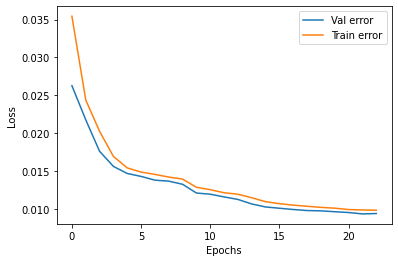

In [ ]:
val_loss = history2.history['val_loss']
loss = history2.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

In this method, we don't use a decider.Instead, we define a threshold for the accuracy

In [ ]:
latent_vector_not_fraud=autoencoder.predict(trainx)
latent_vector_fraud=autoencoder.predict(trainxFraud)

In [ ]:
autoencoder.evaluate(x=trainX,y=trainX,batch_size=64,verbose=1)

4887/4887 [==============================] - 12s 2ms/step - loss: 0.0094


0.009364780969917774

In [ ]:
autoencoder.evaluate(x=trainXFraud,y=trainXFraud,batch_size=64,verbose=1)

202/202 [==============================] - 0s 2ms/step - loss: 0.0422


0.042218711227178574

threshold is 0.02

In [ ]:
threshold=0.02

## Predicting by filling the null data with the mean of train data

### Loading

In [ ]:
!ls

model2.h5		     train_identity_finalColumns_beforeScaling
model_encoder2.h5	     train_identity_mean
plot_error.png		     train_transaction_finalColumns
sample_data		     train_transaction_finalColumns_beforeScaling
train_identity_finalColumns  train_transaction_mean


In [ ]:
with zipfile.ZipFile("/gdrive/My Drive/Proj3.zip", 'r') as zip:
  for info in zip.infolist():
    ifile = zip.open(info)
    if (info.filename=='Proj3/test_identity.csv'):
      test_identity=pd.read_csv(ifile)
    elif (info.filename=='Proj3/sample_submission.csv'):
      sample_submission=pd.read_csv(ifile)
    elif (info.filename=='Proj3/test_transaction.csv'):
      test_transaction=pd.read_csv(ifile)

In [ ]:
train_identity_mean2=pd.read_csv("train_identity_mean")
train_transaction_mean2=pd.read_csv("train_transaction_mean")

In [ ]:
train_identity_mean={}
train_transaction_mean={}
for i in range(len(train_identity_mean2.index)):
  train_identity_mean[train_identity_mean2.iloc[i,0]]=train_identity_mean2.iloc[i,1]
for i in range(len(train_transaction_mean2.index)):
  train_transaction_mean[train_transaction_mean2.iloc[i,0]]=train_transaction_mean2.iloc[i,1]

In [ ]:
train_identity_finalColumns=pd.read_csv("train_identity_finalColumns")
train_identity_finalColumns_beforeScaling=pd.read_csv("train_identity_finalColumns_beforeScaling")
train_transaction_finalColumns=pd.read_csv("train_transaction_finalColumns")
train_transaction_finalColumns_beforeScaling=pd.read_csv("train_transaction_finalColumns_beforeScaling")

In [ ]:
train_identity_finalColumns2=pd.DataFrame({'TransactionID','TransactionID'})
train_identity_finalColumns=list(pd.concat((train_identity_finalColumns2,train_identity_finalColumns['TransactionID']))[0])
train_identity_finalColumns_beforeScaling2=pd.DataFrame({'TransactionID','TransactionID'})
train_identity_finalColumns_beforeScaling=list(pd.concat((train_identity_finalColumns_beforeScaling2,train_identity_finalColumns_beforeScaling['TransactionID']))[0])

In [ ]:
train_transaction_finalColumns

,isFraud,isFraud.1
0,TransactionDT,TransactionDT
1,TransactionAmt,TransactionAmt
2,card1,card1
3,card2,card2
4,card3,card3
...,...,...
368,card4_mastercard,card4_mastercard
369,card4_visa,card4_visa
370,credit,credit
371,debit,debit


In [ ]:
train_transaction_finalColumns=list(train_transaction_finalColumns['isFraud'])


In [ ]:
train_transaction_finalColumns_beforeScaling=list(train_transaction_finalColumns_beforeScaling['isFraud'])

In [ ]:
train_identity_mean

{'DeviceType': 'desktop',
 'id_01': '-9.953478345226033',
 'id_02': '175513.10779600608',
 'id_05': '1.6147840957878978',
 'id_06': '-6.692342148490383',
 'id_11': '99.74871901856723',
 'id_12': 'NotFound',
 'id_13': '48.88936888002294',
 'id_15': 'Found',
 'id_16': 'Found',
 'id_17': '189.44803286092608',
 'id_19': '353.1559293145823',
 'id_20': '403.901718057659',
 'id_23': 'IP_PROXY:ANONYMOUS',
 'id_28': 'Found',
 'id_29': 'Found',
 'id_30': 'linux',
 'id_31': 'chrome 63.0',
 'id_34': 'match_status:1',
 'id_35': 'T',
 'id_36': 'F',
 'id_37': 'T',
 'id_38': 'F'}

In [ ]:
for i in train_identity_mean:
  try:
    train_identity_mean[i]=round((float)(train_identity_mean[i]),5)
  except:
    pass

In [ ]:
for i in train_transaction_mean:
  try:
    train_transaction_mean[i]=round((float)(train_transaction_mean[i]),5)
  except:
    pass

In [ ]:
train_transaction_mean

{'C1': 8.42701,
 'C10': 0.57854,
 'C11': 6.06734,
 'C12': 0.66824,
 'C13': 30.90909,
 'C14': 6.52516,
 'C2': 8.39451,
 'C3': 1e-05,
 'C4': 0.43985,
 'C5': 6.32277,
 'C6': 6.12704,
 'C7': 0.42158,
 'C8': 0.62674,
 'C9': 5.02075,
 'D1': 100.19,
 'D10': 118.52468,
 'D12': 7.90276,
 'D13': 1.87871,
 'D14': 5.34206,
 'D15': 157.54812,
 'D2': 165.11157,
 'D3': 29.07702,
 'D4': 141.21174,
 'D5': 41.76669,
 'D6': 7.96119,
 'D8': 5.64145,
 'D9': 0.03406,
 'M1': 'T',
 'M2': 'T',
 'M3': 'T',
 'M4': 'M1',
 'M5': 'F',
 'M6': 'T',
 'M7': 'F',
 'M8': 'T',
 'M9': 'T',
 'P_emaildomain': 'gmail.com',
 'ProductCD': 'W',
 'R_emaildomain': 'msn.com',
 'TransactionAmt': 140.45419,
 'TransactionDT': 7833551.65379,
 'V100': 0.26355,
 'V101': 0.09051,
 'V102': 0.32162,
 'V103': 0.16527,
 'V104': 0.04779,
 'V105': 0.1083,
 'V106': 0.06572,
 'V107': 0.99958,
 'V108': 1.00507,
 'V109': 1.01711,
 'V110': 1.0087,
 'V111': 1.0026,
 'V112': 1.00567,
 'V113': 1.00345,
 'V114': 1.00988,
 'V115': 1.03632,
 'V116': 1.016

### test_identity preprocessing

since our model have entries as many as the number of train data columns we have to change the test data in a way that it'll have the same number of columns as the train data + we are going to fill the null fields with the mean of columns in the train data

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 41)


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [ ]:
for i in range(1,39):
  if (i<10):
    test_identity.rename(columns={'id-0'+str(i):'id_0'+str(i)},inplace=True)
  else:
    test_identity.rename(columns={'id-'+str(i):'id_'+str(i)},inplace=True)

In [ ]:
drop_columns=[]
j=0
for i in test_identity.columns:
  if (j>=len(train_identity_finalColumns_beforeScaling)):
    j-=1
  if (i!=train_identity_finalColumns_beforeScaling[j]):
    drop_columns.append(i)
  else:
    j+=1

In [ ]:
test_identity.drop(drop_columns,axis=1,inplace=True)

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 24)


,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType
0,3663586,-45.0,280290.0,0.0,0.0,100.0,NotFound,27.0,New,NotFound,225.0,427.0,563.0,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile
1,3663588,0.0,3579.0,0.0,0.0,100.0,Found,NaN,Found,Found,166.0,542.0,368.0,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,match_status:2,T,F,T,T,mobile
2,3663597,-5.0,185210.0,1.0,0.0,100.0,NotFound,52.0,New,NotFound,225.0,271.0,507.0,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,F,T,T,F,desktop
3,3663601,-45.0,252944.0,0.0,0.0,100.0,NotFound,27.0,Found,Found,225.0,427.0,563.0,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile
4,3663602,-95.0,328680.0,7.0,-33.0,100.0,NotFound,27.0,New,NotFound,225.0,567.0,507.0,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile


Now we can handle null values

In [ ]:
test_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              4931
id_05              7157
id_06              7157
id_11              5129
id_12                 0
id_13             11621
id_15              4930
id_16             16160
id_17              5941
id_19              6001
id_20              6274
id_23            136845
id_28              5129
id_29              5129
id_30             71248
id_31              5282
id_34             69732
id_35              4930
id_36              4930
id_37              4930
id_38              4930
DeviceType         4976
dtype: int64

In [ ]:
round(test_identity.isna().sum() * 100 / test_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             3.47
id_05             5.04
id_06             5.04
id_11             3.61
id_12             0.00
id_13             8.19
id_15             3.47
id_16            11.39
id_17             4.19
id_19             4.23
id_20             4.42
id_23            96.43
id_28             3.61
id_29             3.61
id_30            50.21
id_31             3.72
id_34            49.14
id_35             3.47
id_36             3.47
id_37             3.47
id_38             3.47
DeviceType        3.51
dtype: float64

we are filling the null data with the column mode in the train data

In [ ]:
test_identity.fillna({'id_23':'IP_PROXY:ANONYMOUS'}, inplace=True)

In [ ]:
test_identity.fillna({'id_30':'linux'}, inplace=True)

In [ ]:
test_identity.fillna({'id_34':'match_status:1'}, inplace=True)

In [ ]:
test_identity.fillna({'id_16':'Found' , 'DeviceType':'desktop' }, inplace=True)

In [ ]:
test_identity.isna().sum()

TransactionID        0
id_01                0
id_02             4931
id_05             7157
id_06             7157
id_11             5129
id_12                0
id_13            11621
id_15             4930
id_16                0
id_17             5941
id_19             6001
id_20             6274
id_23                0
id_28             5129
id_29             5129
id_30                0
id_31             5282
id_34                0
id_35             4930
id_36             4930
id_37             4930
id_38             4930
DeviceType           0
dtype: int64

In [ ]:
for i in test_identity.columns:
  if (test_identity[i].isna().sum()>0):
    test_identity.fillna({i:train_identity_mean[i]},inplace=True)

In [ ]:
test_identity.isna().sum()

TransactionID    0
id_01            0
id_02            0
id_05            0
id_06            0
id_11            0
id_12            0
id_13            0
id_15            0
id_16            0
id_17            0
id_19            0
id_20            0
id_23            0
id_28            0
id_29            0
id_30            0
id_31            0
id_34            0
id_35            0
id_36            0
id_37            0
id_38            0
DeviceType       0
dtype: int64

In [ ]:
test_identity

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType
0,3663586,-45.0,280290.0,0.0,0.0,100.0,NotFound,27.00000,New,NotFound,225.0,427.0,563.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 67.0 for android,match_status:1,F,F,T,F,mobile
1,3663588,0.0,3579.0,0.0,0.0,100.0,Found,48.88937,Found,Found,166.0,542.0,368.0,IP_PROXY:ANONYMOUS,Found,Found,Android 6.0.1,chrome 67.0 for android,match_status:2,T,F,T,T,mobile
2,3663597,-5.0,185210.0,1.0,0.0,100.0,NotFound,52.00000,New,NotFound,225.0,271.0,507.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,ie 11.0 for tablet,match_status:1,F,T,T,F,desktop
3,3663601,-45.0,252944.0,0.0,0.0,100.0,NotFound,27.00000,Found,Found,225.0,427.0,563.0,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 67.0 for android,match_status:1,F,F,T,F,mobile
4,3663602,-95.0,328680.0,7.0,-33.0,100.0,NotFound,27.00000,New,NotFound,225.0,567.0,507.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 67.0 for android,match_status:1,F,F,T,F,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,4170230,-20.0,473365.0,0.0,0.0,100.0,NotFound,27.00000,New,NotFound,225.0,153.0,325.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 71.0 for android,match_status:1,F,F,T,F,mobile
141903,4170233,-5.0,489917.0,-4.0,-32.0,100.0,NotFound,27.00000,Found,Found,225.0,417.0,595.0,IP_PROXY:ANONYMOUS,Found,Found,linux,chrome 71.0 for android,match_status:1,F,F,T,F,mobile
141904,4170234,-5.0,110081.0,22.0,-31.0,100.0,NotFound,27.00000,New,NotFound,166.0,122.0,177.0,IP_PROXY:ANONYMOUS,New,NotFound,iOS 10.3.3,mobile safari 10.0,match_status:2,T,F,F,T,mobile
141905,4170236,-45.0,266704.0,-3.0,-10.0,100.0,NotFound,27.00000,New,NotFound,225.0,176.0,507.0,IP_PROXY:ANONYMOUS,New,NotFound,linux,chrome 43.0 for android,match_status:1,F,F,T,F,mobile


scaling:

In [ ]:
labelencoder=LabelEncoder()
columns=test_identity.columns
for i in range(1,test_identity.shape[1]):
  ind=columns[i]
  if (i==13 or i==16 or i==18 or i==23):
    continue
  if (i==6 or i==8 or i==9 or (i<=22 and i>=19)  or (i<=17 and i>=14)):
    test_identity[ind]=test_identity[ind].astype('str')
    test_identity[ind] = labelencoder.fit_transform(test_identity[ind])
  try:
    minn=min(x for x in test_identity[ind] if not pd.isna(x))
    maxx=max(x for x in test_identity[ind] if not pd.isna(x))
    test_identity[ind]=(test_identity[ind]-minn)/(maxx-minn)
  except:
    test_identity[ind]=test_identity[ind].astype('float')
    minn=min(x for x in test_identity[ind] if not pd.isna(x))
    maxx=max(x for x in test_identity[ind] if not pd.isna(x))
    test_identity[ind]=(test_identity[ind]-minn)/(maxx-minn)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.id_23,prefix='proxy')],axis=1)).drop(['id_23'],axis=1)

In [ ]:
windows=[]
mac=[]
linux=[]
ios=[]
android=[]
other=[]
for i in test_identity['id_30']:
  if (pd.isna(i)):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Windows' in i):
    windows.append(1)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Mac' in i):
    windows.append(0)
    mac.append(1)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Linux' in i or 'linux' in i):
    windows.append(0)
    mac.append(0)
    linux.append(1)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('iOS' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(1)
    android.append(0)
    other.append(0)
  elif ('Android' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(1)
    other.append(0)
  elif ('other' in i or 'func' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(1)

test_identity['isWind']=windows
test_identity['isMac']=mac
test_identity['isLinux']=linux
test_identity['isIOS']=ios
test_identity['isAndroid']=android
test_identity['isOther']=other

version of the os might also be important so:

In [ ]:
test_identity['id_30']=test_identity['id_30'].astype('str')
test_identity['id_30'] = labelencoder.fit_transform(test_identity['id_30'])

In [ ]:
minn=min(x for x in test_identity['id_30'] if not pd.isna(x))
maxx=max(x for x in test_identity['id_30'] if not pd.isna(x))
test_identity['id_30']=(test_identity['id_30']-minn)/(maxx-minn)

In [ ]:
del(windows)
del(mac)
del(ios)
del(linux)
del(android)
del(other)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.id_34,prefix='')],axis=1)).drop(['id_34'],axis=1)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.DeviceType,prefix='')],axis=1)).drop(['DeviceType'],axis=1)

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 34)


,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:1,_match_status:2,_desktop,_mobile
0,3663586,0.55,0.280325,0.609023,1.00,1.0,1.0,0.307692,0.5,1.0,0.976562,0.573684,0.826786,1.0,1.0,0.988372,0.335821,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,1
1,3663588,1.00,0.003577,0.609023,1.00,1.0,0.0,0.728642,0.0,0.0,0.515625,0.775439,0.478571,0.0,0.0,0.069767,0.335821,1.0,0.0,1.0,1.0,1,0,0,0,0,0,0,1,0,0,1,0,1
2,3663597,0.95,0.185233,0.616541,1.00,1.0,1.0,0.788462,0.5,1.0,0.976562,0.300000,0.726786,1.0,1.0,0.988372,0.746269,0.0,1.0,1.0,0.0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,3663601,0.55,0.252976,0.609023,1.00,1.0,1.0,0.307692,0.0,0.0,0.976562,0.573684,0.826786,0.0,0.0,0.988372,0.335821,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,1
4,3663602,0.05,0.328722,0.661654,0.67,1.0,1.0,0.307692,0.5,1.0,0.976562,0.819298,0.726786,1.0,1.0,0.988372,0.335821,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
test_identity.columns[30]

'_match_status:1'

In [ ]:
print(train_identity_finalColumns)
print(test_identity.columns)

['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'proxy_IP_PROXY:ANONYMOUS', 'proxy_IP_PROXY:HIDDEN', 'proxy_IP_PROXY:TRANSPARENT', 'isWind', 'isMac', 'isLinux', 'isIOS', 'isAndroid', 'isOther', '_match_status:-1', '_match_status:0', '_match_status:1', '_match_status:2', '_desktop', '_mobile']
Index(['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12',
       'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29',
       'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38',
       'proxy_IP_PROXY:ANONYMOUS', 'proxy_IP_PROXY:HIDDEN',
       'proxy_IP_PROXY:TRANSPARENT', 'isWind', 'isMac', 'isLinux', 'isIOS',
       'isAndroid', 'isOther', '_match_status:1', '_match_status:2',
       '_desktop', '_mobile'],
      dtype='object')


In [ ]:
match0=[0]*test_identity.shape[0]
test_identity.insert(30,'_match_status:-1',match0)
test_identity.insert(31,'_match_status:0',match0)

In [ ]:
(train_identity_finalColumns)==list(test_identity.columns)

True

### test_transaction preprocessing

In [ ]:
test_transaction

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,284.0,60.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,157.0,hotmail.com,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,NaN,NaN,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,327.0,87.0,NaN,NaN,hotmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
#join the two dataframes
test_transaction=test_transaction.set_index('TransactionID').join(test_identity.set_index('TransactionID'))

In [ ]:
del(test_identity)

In [ ]:
drop_columns=[]
j=0
for i in test_transaction.columns:
  if (j>=len(train_transaction_finalColumns_beforeScaling)):
    j-=1
  if (i!=train_transaction_finalColumns_beforeScaling[j]):
    drop_columns.append(i)
  else:
    j+=1

In [ ]:
test_transaction.drop(drop_columns,axis=1,inplace=True)

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,418.0,NaN,NaN,NaN,409.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,231.0,NaN,NaN,NaN,634.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,136.0,NaN,NaN,NaN,97.0,...,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,242.0,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,22.0,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(test_transaction)==(train_transaction_finalColumns_beforeScaling)

True

Now we can handle null values

In [ ]:
for i in range(test_transaction.shape[1]):
  ind = test_transaction.columns[i]
  test_transaction.fillna({ind:train_transaction_mean[ind]},inplace=True)

In [ ]:
nullNumbers=test_transaction.isna().sum()
for i in range(330):
  if(nullNumbers[i]>0):
    print(test_transaction.columns[i],"\t",round(nullNumbers[i] * 100 / test_transaction.shape[0] , 2))

Now we have no null data                                                                
Scaling:

In [ ]:
test_transaction.isna().sum().sum()

0

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,gmail.com,msn.com,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,7.96119,5.64145,0.03406,418.0,7.90276,1.87871,5.34206,409.0,...,0.0,0.0,0.0,0.0,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.71949,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,aol.com,msn.com,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,7.96119,5.64145,0.03406,231.0,7.90276,1.87871,5.34206,634.0,...,0.0,0.0,0.0,0.0,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.71949,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,hotmail.com,msn.com,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,7.96119,5.64145,0.03406,136.0,7.90276,1.87871,5.34206,97.0,...,0.0,0.0,0.0,263.0,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.71949,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,gmail.com,msn.com,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,7.96119,5.64145,0.03406,242.0,7.90276,1.87871,5.34206,242.0,...,0.0,0.0,0.0,0.0,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.71949,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,gmail.com,msn.com,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,7.96119,5.64145,0.03406,22.0,7.90276,1.87871,5.34206,22.0,...,0.0,0.0,0.0,0.0,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.71949,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107


In [ ]:
test_transaction.columns[330]

'id_01'

In [ ]:
#2 W,H->oneHot
#6 discover ,mastercard, visa ,american express,->oneHot
#8 credit,debit,credit or debit,charge card->oneHot
#11,12 labelEncoding
#40-48 T,F-> labelEncoding
columns=test_transaction.columns
for i in range(330):
  ind=columns[i]
  if (i==2 or i==6 or i==8 ):
    continue
  if (i==12 or i==11 or (i<=48 and i>=40)):
    test_transaction[ind]=test_transaction[ind].astype('str')
    test_transaction[ind] = labelencoder.fit_transform(test_transaction[ind])
  try:
    minn=min(test_transaction[ind])
    maxx=max(test_transaction[ind])
    if (maxx==minn):
      minn=0
    test_transaction[ind]=(test_transaction[ind]-minn)/(maxx-minn)
  except:
    test_transaction[ind]=test_transaction[ind].astype('float32')
    minn=min(test_transaction[ind])
    maxx=max(test_transaction[ind])
    if (maxx==minn):
      continue
    test_transaction[ind]=(test_transaction[ind]-minn)/(maxx-minn)


In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,0.000000,0.003109,W,0.540814,0.022,0.378788,visa,0.919708,debit,0.159091,0.836957,0.271186,0.525424,0.002034,0.001832,0.0,0.0,0.007979,0.002498,0.0,0.0,0.010490,0.0,0.002238,0.000448,0.073624,0.007528,0.653666,0.653666,0.025093,0.364803,0.024816,0.007297,0.00278,0.035541,0.383135,0.008991,0.001762,0.004924,0.374885,...,0.0,0.0,0.0,0.000000,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.71949,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663550,0.000002,0.004769,W,0.188032,0.022,0.378788,visa,0.919708,debit,0.452273,0.836957,0.033898,0.525424,0.001017,0.000611,0.0,0.0,0.000000,0.000625,0.0,0.0,0.003497,0.0,0.000448,0.000448,0.007682,0.002509,0.232449,0.232449,0.006506,0.581118,0.006434,0.007297,0.00278,0.035541,0.211732,0.008991,0.001762,0.004924,0.581118,...,0.0,0.0,0.0,0.000000,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.71949,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663551,0.000005,0.016649,W,0.199759,0.948,0.378788,visa,0.919708,debit,0.845455,0.836957,0.322034,0.525424,0.000678,0.000611,0.0,0.0,0.000000,0.003123,0.0,0.0,0.006993,0.0,0.000895,0.000000,0.014085,0.002509,0.213729,0.213729,0.009294,0.088909,0.009191,0.007297,0.00278,0.035541,0.124656,0.008991,0.001762,0.004924,0.088909,...,0.0,0.0,0.0,0.000435,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.71949,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663552,0.000005,0.027744,W,0.574155,0.520,0.378788,visa,0.481752,debit,0.238636,0.836957,0.271186,0.525424,0.001695,0.000611,0.0,0.0,0.002660,0.000625,0.0,0.0,0.003497,0.0,0.000895,0.000000,0.004481,0.005019,0.065523,0.065523,0.038104,0.221815,0.037684,0.007297,0.00278,0.035541,0.221815,0.008991,0.001762,0.004924,0.221815,...,0.0,0.0,0.0,0.000000,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.71949,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107
3663553,0.000006,0.006615,W,0.978213,0.704,0.378788,mastercard,0.124088,debit,0.372727,0.836957,0.271186,0.525424,0.002034,0.001832,0.0,0.0,0.005319,0.003123,0.0,0.0,0.008741,0.0,0.002686,0.000000,0.008963,0.007528,0.034321,0.034321,0.000000,0.020165,0.000000,0.007297,0.00278,0.035541,0.020165,0.008991,0.001762,0.004924,0.020165,...,0.0,0.0,0.0,0.000000,0.0,0.89937,0.18479,0.59248,0.93264,0.9756,0.87181,0.71949,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107


In [ ]:
test_transaction=(pd.concat([test_transaction,pd.get_dummies(test_transaction.ProductCD,prefix='cd')],axis=1)).drop(['ProductCD'],axis=1)

In [ ]:
test_transaction=(pd.concat([test_transaction,pd.get_dummies(test_transaction.card4,prefix='card4')],axis=1)).drop(['card4'],axis=1)

In [ ]:
credit=[]
debit=[]
charge=[]
for i in test_transaction['card6']:
  if i=='credit':
    credit.append(1)
    debit.append(0)
    charge.append(0)
  elif i=='debit':
    credit.append(0)
    debit.append(1)
    charge.append(0)
  elif i=='debit or credit':
    credit.append(0.5)
    debit.append(0.5)
    charge.append(0)
  elif i=='charge card':
    credit.append(0)
    debit.append(0)
    charge.append(1)

test_transaction['credit']=credit
test_transaction['debit']=debit
test_transaction['charge_card']=charge
test_transaction=test_transaction.drop(['card6'],axis=1)

In [ ]:
del(credit)
del(debit)
del(charge)

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 374)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,M1,M2,M3,...,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile,cd_C,cd_H,cd_R,cd_S,cd_W,card4_american express,card4_discover,card4_mastercard,card4_visa,credit,debit,charge_card
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,0.000000,0.003109,0.540814,0.022,0.378788,0.919708,0.159091,0.836957,0.271186,0.525424,0.002034,0.001832,0.0,0.0,0.007979,0.002498,0.0,0.0,0.010490,0.0,0.002238,0.000448,0.073624,0.007528,0.653666,0.653666,0.025093,0.364803,0.024816,0.007297,0.00278,0.035541,0.383135,0.008991,0.001762,0.004924,0.374885,1.0,1.0,0.0,...,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107,0,0,0,0,1,0,0,0,1,0,1,0
3663550,0.000002,0.004769,0.188032,0.022,0.378788,0.919708,0.452273,0.836957,0.033898,0.525424,0.001017,0.000611,0.0,0.0,0.000000,0.000625,0.0,0.0,0.003497,0.0,0.000448,0.000448,0.007682,0.002509,0.232449,0.232449,0.006506,0.581118,0.006434,0.007297,0.00278,0.035541,0.211732,0.008991,0.001762,0.004924,0.581118,1.0,0.0,0.0,...,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107,0,0,0,0,1,0,0,0,1,0,1,0
3663551,0.000005,0.016649,0.199759,0.948,0.378788,0.919708,0.845455,0.836957,0.322034,0.525424,0.000678,0.000611,0.0,0.0,0.000000,0.003123,0.0,0.0,0.006993,0.0,0.000895,0.000000,0.014085,0.002509,0.213729,0.213729,0.009294,0.088909,0.009191,0.007297,0.00278,0.035541,0.124656,0.008991,0.001762,0.004924,0.088909,1.0,1.0,0.0,...,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107,0,0,0,0,1,0,0,0,1,0,1,0
3663552,0.000005,0.027744,0.574155,0.520,0.378788,0.481752,0.238636,0.836957,0.271186,0.525424,0.001695,0.000611,0.0,0.0,0.002660,0.000625,0.0,0.0,0.003497,0.0,0.000895,0.000000,0.004481,0.005019,0.065523,0.065523,0.038104,0.221815,0.037684,0.007297,0.00278,0.035541,0.221815,0.008991,0.001762,0.004924,0.221815,1.0,1.0,1.0,...,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107,0,0,0,0,1,0,0,0,1,0,1,0
3663553,0.000006,0.006615,0.978213,0.704,0.378788,0.124088,0.372727,0.836957,0.271186,0.525424,0.002034,0.001832,0.0,0.0,0.005319,0.003123,0.0,0.0,0.008741,0.0,0.002686,0.000000,0.008963,0.007528,0.034321,0.034321,0.000000,0.020165,0.000000,0.007297,0.00278,0.035541,0.020165,0.008991,0.001762,0.004924,0.020165,1.0,1.0,1.0,...,0.31256,0.45141,0.71797,0.43818,0.549,0.47708,0.48639,0.77619,0.53844,0.49252,0.04815,0.78767,0.45539,0.97418,0.00353,0.02229,0.23309,0.08875,0.51463,0.12503,0.03838,0.00011,0.00002,0.00256,0.61706,0.38037,0.59893,0.40107,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
test_transaction=test_transaction.astype('float32')

In [ ]:
test_transaction.drop(['cd_S'],axis=1,inplace=True)

In [ ]:
list(test_transaction)==(train_transaction_finalColumns)

True

In [ ]:
testX=(test_transaction).to_numpy(dtype='float32')
del(test_transaction)

In [ ]:
testX.shape

(506691, 373)

### predicting with the model

In [ ]:
autoencoder=keras.models.load_model('model2.h5')

In [ ]:
np.count_nonzero(np.isnan(testX))


0

In [ ]:
predicted = autoencoder.predict(testX)

In [ ]:
mae = keras.losses.MeanAbsoluteError()

In [ ]:
threshold

0.02

In [ ]:
eval=[]
for i in range(len(testX)):
  eval1=mae(testX[i], predicted[i]).numpy()
  if (eval1>threshold):
    eval.append(1)
  else:
    eval.append(0)

In [ ]:
eval

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,


In [ ]:
sample_submission

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5
...,...,...
506686,4170235,0.5
506687,4170236,0.5
506688,4170237,0.5
506689,4170238,0.5


In [ ]:
sample_submission['isFraud']=eval

In [ ]:
sample_submission

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,1
506687,4170236,1
506688,4170237,0
506689,4170238,0


In [ ]:
sample_submission[sample_submission['isFraud']==1]

,TransactionID,isFraud
6,3663555,1
30,3663579,1
32,3663581,1
37,3663586,1
39,3663588,1
...,...,...
506684,4170233,1
506685,4170234,1
506686,4170235,1
506687,4170236,1


178552 out of 506691 is predicted to be fraud

In [ ]:
sample_submission.to_csv('sample_submission2-1.csv',index=None)

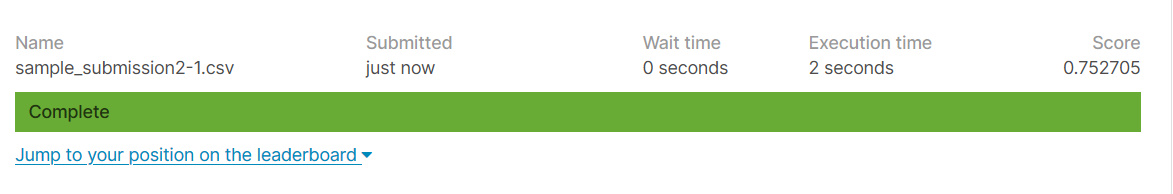

Trying different threshold did not improve the accuracy

## Predicting by filling the null data with the mean of test data

### Loading

In [ ]:
!ls

model2.h5		  train_identity_finalColumns
model_encoder2.h5	  train_identity_finalColumns_beforeScaling
plot_error.png		  train_identity_mean
sample_data		  train_transaction_finalColumns
sample_submission2-1.csv  train_transaction_finalColumns_beforeScaling
sample_submission2-2.csv  train_transaction_mean


In [ ]:
with zipfile.ZipFile("/gdrive/My Drive/Proj3.zip", 'r') as zip:
  for info in zip.infolist():
    ifile = zip.open(info)
    if (info.filename=='Proj3/test_identity.csv'):
      test_identity=pd.read_csv(ifile)
    elif (info.filename=='Proj3/sample_submission.csv'):
      sample_submission=pd.read_csv(ifile)
    elif (info.filename=='Proj3/test_transaction.csv'):
      test_transaction=pd.read_csv(ifile)

In [ ]:
train_identity_finalColumns=pd.read_csv("train_identity_finalColumns")
train_identity_finalColumns_beforeScaling=pd.read_csv("train_identity_finalColumns_beforeScaling")
train_transaction_finalColumns=pd.read_csv("train_transaction_finalColumns")
train_transaction_finalColumns_beforeScaling=pd.read_csv("train_transaction_finalColumns_beforeScaling")

In [ ]:
train_identity_finalColumns2=pd.DataFrame({'TransactionID','TransactionID'})
train_identity_finalColumns=list(pd.concat((train_identity_finalColumns2,train_identity_finalColumns['TransactionID']))[0])
train_identity_finalColumns_beforeScaling2=pd.DataFrame({'TransactionID','TransactionID'})
train_identity_finalColumns_beforeScaling=list(pd.concat((train_identity_finalColumns_beforeScaling2,train_identity_finalColumns_beforeScaling['TransactionID']))[0])

In [ ]:
train_transaction_finalColumns=list(train_transaction_finalColumns)

In [ ]:
train_transaction_finalColumns_beforeScaling=list(train_transaction_finalColumns_beforeScaling['isFraud'])

### test_identity preprocessing

since our model have entries as many as the number of train data columns we have to change the test data in a way that it'll have the same number of columns as the train data + we are going to fill the null fields with the mean of non-null fields

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 41)


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [ ]:
for i in range(1,39):
  if (i<10):
    test_identity.rename(columns={'id-0'+str(i):'id_0'+str(i)},inplace=True)
  else:
    test_identity.rename(columns={'id-'+str(i):'id_'+str(i)},inplace=True)

In [ ]:
drop_columns=[]
j=0
for i in test_identity.columns:
  if (j>=len(train_identity_finalColumns_beforeScaling)):
    j-=1
  if (i!=train_identity_finalColumns_beforeScaling[j]):
    drop_columns.append(i)
  else:
    j+=1

In [ ]:
test_identity.drop(drop_columns,axis=1,inplace=True)

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 24)


,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType
0,3663586,-45.0,280290.0,0.0,0.0,100.0,NotFound,27.0,New,NotFound,225.0,427.0,563.0,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile
1,3663588,0.0,3579.0,0.0,0.0,100.0,Found,NaN,Found,Found,166.0,542.0,368.0,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,match_status:2,T,F,T,T,mobile
2,3663597,-5.0,185210.0,1.0,0.0,100.0,NotFound,52.0,New,NotFound,225.0,271.0,507.0,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,F,T,T,F,desktop
3,3663601,-45.0,252944.0,0.0,0.0,100.0,NotFound,27.0,Found,Found,225.0,427.0,563.0,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile
4,3663602,-95.0,328680.0,7.0,-33.0,100.0,NotFound,27.0,New,NotFound,225.0,567.0,507.0,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,F,F,T,F,mobile


Now we can handle null values

In [ ]:
test_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              4931
id_05              7157
id_06              7157
id_11              5129
id_12                 0
id_13             11621
id_15              4930
id_16             16160
id_17              5941
id_19              6001
id_20              6274
id_23            136845
id_28              5129
id_29              5129
id_30             71248
id_31              5282
id_34             69732
id_35              4930
id_36              4930
id_37              4930
id_38              4930
DeviceType         4976
dtype: int64

In [ ]:
round(test_identity.isna().sum() * 100 / test_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             3.47
id_05             5.04
id_06             5.04
id_11             3.61
id_12             0.00
id_13             8.19
id_15             3.47
id_16            11.39
id_17             4.19
id_19             4.23
id_20             4.42
id_23            96.43
id_28             3.61
id_29             3.61
id_30            50.21
id_31             3.72
id_34            49.14
id_35             3.47
id_36             3.47
id_37             3.47
id_38             3.47
DeviceType        3.51
dtype: float64

we are filling the null data with the column mode in the train data

In [ ]:
test_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              4931
id_05              7157
id_06              7157
id_11              5129
id_12                 0
id_13             11621
id_15              4930
id_16             16160
id_17              5941
id_19              6001
id_20              6274
id_23            136845
id_28              5129
id_29              5129
id_30             71248
id_31              5282
id_34             69732
id_35              4930
id_36              4930
id_37              4930
id_38              4930
DeviceType         4976
dtype: int64

In [ ]:
for i in test_identity.columns:
  if (test_identity[i].isna().sum()>0):
    try:
      test_identity[i]=test_identity[i].astype('float32')
      test_identity.fillna({i:test_identity[i].mean()},inplace=True)
    except:
      test_identity.fillna({i:test_identity[i].mode()[0]},inplace=True)

In [ ]:
test_identity.isna().sum()

TransactionID    0
id_01            0
id_02            0
id_05            0
id_06            0
id_11            0
id_12            0
id_13            0
id_15            0
id_16            0
id_17            0
id_19            0
id_20            0
id_23            0
id_28            0
id_29            0
id_30            0
id_31            0
id_34            0
id_35            0
id_36            0
id_37            0
id_38            0
DeviceType       0
dtype: int64

In [ ]:
test_identity

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_23,id_28,id_29,id_30,id_31,id_34,id_35,id_36,id_37,id_38,DeviceType
0,3663586,-45.0,280290.0,0.0,0.0,100.0,NotFound,27.000000,New,NotFound,225.0,427.0,563.0,IP_PROXY:TRANSPARENT,New,NotFound,Windows 10,chrome 67.0 for android,match_status:2,F,F,T,F,mobile
1,3663588,0.0,3579.0,0.0,0.0,100.0,Found,36.905716,Found,Found,166.0,542.0,368.0,IP_PROXY:TRANSPARENT,Found,Found,Android 6.0.1,chrome 67.0 for android,match_status:2,T,F,T,T,mobile
2,3663597,-5.0,185210.0,1.0,0.0,100.0,NotFound,52.000000,New,NotFound,225.0,271.0,507.0,IP_PROXY:TRANSPARENT,New,NotFound,Windows 10,ie 11.0 for tablet,match_status:2,F,T,T,F,desktop
3,3663601,-45.0,252944.0,0.0,0.0,100.0,NotFound,27.000000,Found,Found,225.0,427.0,563.0,IP_PROXY:TRANSPARENT,Found,Found,Windows 10,chrome 67.0 for android,match_status:2,F,F,T,F,mobile
4,3663602,-95.0,328680.0,7.0,-33.0,100.0,NotFound,27.000000,New,NotFound,225.0,567.0,507.0,IP_PROXY:TRANSPARENT,New,NotFound,Windows 10,chrome 67.0 for android,match_status:2,F,F,T,F,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,4170230,-20.0,473365.0,0.0,0.0,100.0,NotFound,27.000000,New,NotFound,225.0,153.0,325.0,IP_PROXY:TRANSPARENT,New,NotFound,Windows 10,chrome 71.0 for android,match_status:2,F,F,T,F,mobile
141903,4170233,-5.0,489917.0,-4.0,-32.0,100.0,NotFound,27.000000,Found,Found,225.0,417.0,595.0,IP_PROXY:TRANSPARENT,Found,Found,Windows 10,chrome 71.0 for android,match_status:2,F,F,T,F,mobile
141904,4170234,-5.0,110081.0,22.0,-31.0,100.0,NotFound,27.000000,New,NotFound,166.0,122.0,177.0,IP_PROXY:TRANSPARENT,New,NotFound,iOS 10.3.3,mobile safari 10.0,match_status:2,T,F,F,T,mobile
141905,4170236,-45.0,266704.0,-3.0,-10.0,100.0,NotFound,27.000000,New,NotFound,225.0,176.0,507.0,IP_PROXY:TRANSPARENT,New,NotFound,Windows 10,chrome 43.0 for android,match_status:2,F,F,T,F,mobile


scaling:

In [ ]:
labelencoder=LabelEncoder()
columns=test_identity.columns
for i in range(1,test_identity.shape[1]):
  ind=columns[i]
  if (i==13 or i==16 or i==18 or i==23):
    continue
  if (i==6 or i==8 or i==9 or (i<=22 and i>=19)  or (i<=17 and i>=14)):
    test_identity[ind]=test_identity[ind].astype('str')
    test_identity[ind] = labelencoder.fit_transform(test_identity[ind])
  try:
    minn=min(test_identity[ind])
    maxx=max(test_identity[ind])
    if (minn==maxx):
      minn=0
    test_identity[ind]=(test_identity[ind]-minn)/(maxx-minn)
  except:
    test_identity[ind]=test_identity[ind].astype('float')
    minn=min(test_identity[ind])
    maxx=max(test_identity[ind])
    if (minn==maxx):
      minn=0
    test_identity[ind]=(test_identity[ind]-minn)/(maxx-minn)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.id_23,prefix='proxy')],axis=1)).drop(['id_23'],axis=1)

In [ ]:
windows=[]
mac=[]
linux=[]
ios=[]
android=[]
other=[]
for i in test_identity['id_30']:
  if (pd.isna(i)):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Windows' in i):
    windows.append(1)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Mac' in i):
    windows.append(0)
    mac.append(1)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('Linux' in i or 'linux' in i):
    windows.append(0)
    mac.append(0)
    linux.append(1)
    ios.append(0)
    android.append(0)
    other.append(0)
  elif ('iOS' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(1)
    android.append(0)
    other.append(0)
  elif ('Android' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(1)
    other.append(0)
  elif ('other' in i or 'func' in i):
    windows.append(0)
    mac.append(0)
    linux.append(0)
    ios.append(0)
    android.append(0)
    other.append(1)

test_identity['isWind']=windows
test_identity['isMac']=mac
test_identity['isLinux']=linux
test_identity['isIOS']=ios
test_identity['isAndroid']=android
test_identity['isOther']=other

version of the os might also be important so:

In [ ]:
test_identity['id_30']=test_identity['id_30'].astype('str')
test_identity['id_30'] = labelencoder.fit_transform(test_identity['id_30'])

In [ ]:
minn=min(x for x in test_identity['id_30'] if not pd.isna(x))
maxx=max(x for x in test_identity['id_30'] if not pd.isna(x))
test_identity['id_30']=(test_identity['id_30']-minn)/(maxx-minn)

In [ ]:
del(windows)
del(mac)
del(ios)
del(linux)
del(android)
del(other)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.id_34,prefix='')],axis=1)).drop(['id_34'],axis=1)

In [ ]:
test_identity=(pd.concat([test_identity,pd.get_dummies(test_identity.DeviceType,prefix='')],axis=1)).drop(['DeviceType'],axis=1)

In [ ]:
print(test_identity.shape)
test_identity.head()

(141907, 34)


,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:1,_match_status:2,_desktop,_mobile
0,3663586,0.55,0.280325,0.609023,1.00,1.0,1.0,0.307692,0.5,1.0,0.976562,0.573684,0.826786,1.0,1.0,0.564706,0.335821,0.0,0.0,1.0,0.0,0,0,1,1,0,0,0,0,0,0,1,0,1
1,3663588,1.00,0.003577,0.609023,1.00,1.0,0.0,0.498187,0.0,0.0,0.515625,0.775439,0.478571,0.0,0.0,0.070588,0.335821,1.0,0.0,1.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,1
2,3663597,0.95,0.185233,0.616541,1.00,1.0,1.0,0.788462,0.5,1.0,0.976562,0.300000,0.726786,1.0,1.0,0.564706,0.746269,0.0,1.0,1.0,0.0,0,0,1,1,0,0,0,0,0,0,1,1,0
3,3663601,0.55,0.252976,0.609023,1.00,1.0,1.0,0.307692,0.0,0.0,0.976562,0.573684,0.826786,0.0,0.0,0.564706,0.335821,0.0,0.0,1.0,0.0,0,0,1,1,0,0,0,0,0,0,1,0,1
4,3663602,0.05,0.328722,0.661654,0.67,1.0,1.0,0.307692,0.5,1.0,0.976562,0.819298,0.726786,1.0,1.0,0.564706,0.335821,0.0,0.0,1.0,0.0,0,0,1,1,0,0,0,0,0,0,1,0,1


In [ ]:
test_identity.columns[30]

'_match_status:1'

In [ ]:
print(train_identity_finalColumns)
print(test_identity.columns)

['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'proxy_IP_PROXY:ANONYMOUS', 'proxy_IP_PROXY:HIDDEN', 'proxy_IP_PROXY:TRANSPARENT', 'isWind', 'isMac', 'isLinux', 'isIOS', 'isAndroid', 'isOther', '_match_status:-1', '_match_status:0', '_match_status:1', '_match_status:2', '_desktop', '_mobile']
Index(['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12',
       'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29',
       'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38',
       'proxy_IP_PROXY:ANONYMOUS', 'proxy_IP_PROXY:HIDDEN',
       'proxy_IP_PROXY:TRANSPARENT', 'isWind', 'isMac', 'isLinux', 'isIOS',
       'isAndroid', 'isOther', '_match_status:1', '_match_status:2',
       '_desktop', '_mobile'],
      dtype='object')


In [ ]:
match0=[0]*test_identity.shape[0]
test_identity.insert(30,'_match_status:-1',match0)
test_identity.insert(31,'_match_status:0',match0)

In [ ]:
(train_identity_finalColumns)==list(test_identity.columns)

True

### test_transaction preprocessing

In [ ]:
test_transaction

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,284.0,60.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,157.0,hotmail.com,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,NaN,NaN,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,327.0,87.0,NaN,NaN,hotmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
#join the two dataframes
test_transaction=test_transaction.set_index('TransactionID').join(test_identity.set_index('TransactionID'))

In [ ]:
del(test_identity)

In [ ]:
drop_columns=[]
j=0
for i in test_transaction.columns:
  if (j>=len(train_transaction_finalColumns_beforeScaling)):
    j-=1
  if (i!=train_transaction_finalColumns_beforeScaling[j]):
    drop_columns.append(i)
  else:
    j+=1

In [ ]:
test_transaction.drop(drop_columns,axis=1,inplace=True)

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,418.0,NaN,NaN,NaN,409.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,231.0,NaN,NaN,NaN,634.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,136.0,NaN,NaN,NaN,97.0,...,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,242.0,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,22.0,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(test_transaction)==(train_transaction_finalColumns_beforeScaling)

True

Now we can handle null values

In [ ]:
for i in range(test_transaction.shape[1]):
  ind = test_transaction.columns[i]
  try:
    test_transaction.fillna({ind:test_transaction[ind].mean()},inplace=True)
  except:
    test_transaction.fillna({ind:test_transaction[ind].mode()[0]},inplace=True)

In [ ]:
nullNumbers=test_transaction.isna().sum()
for i in range(330):
  if(nullNumbers[i]>0):
    print(test_transaction.columns[i],"\t",round(nullNumbers[i] * 100 / test_transaction.shape[0] , 2))

Now we have no null data                                                                
Scaling:

In [ ]:
test_transaction.isna().sum().sum()

0

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,gmail.com,gmail.com,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,82.443145,160.834483,0.553981,418.0,77.404179,18.225961,58.163186,409.0,...,0.0,0.0,0.0,0.0,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,aol.com,gmail.com,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,82.443145,160.834483,0.553981,231.0,77.404179,18.225961,58.163186,634.0,...,0.0,0.0,0.0,0.0,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,hotmail.com,gmail.com,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,82.443145,160.834483,0.553981,136.0,77.404179,18.225961,58.163186,97.0,...,0.0,0.0,0.0,263.0,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,gmail.com,gmail.com,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,82.443145,160.834483,0.553981,242.0,77.404179,18.225961,58.163186,242.0,...,0.0,0.0,0.0,0.0,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,gmail.com,gmail.com,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,82.443145,160.834483,0.553981,22.0,77.404179,18.225961,58.163186,22.0,...,0.0,0.0,0.0,0.0,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627


In [ ]:
test_transaction.columns[330]

'id_01'

In [ ]:
#2 W,H->oneHot
#6 discover ,mastercard, visa ,american express,->oneHot
#8 credit,debit,credit or debit,charge card->oneHot
#11,12 labelEncoding
#40-48 T,F-> labelEncoding
columns=test_transaction.columns
for i in range(330):
  ind=columns[i]
  if (i==2 or i==6 or i==8 ):
    continue
  if (i==12 or i==11 or (i<=48 and i>=40)):
    test_transaction[ind]=test_transaction[ind].astype('str')
    test_transaction[ind] = labelencoder.fit_transform(test_transaction[ind])
  try:
    minn=min(test_transaction[ind])
    maxx=max(test_transaction[ind])
    if (maxx==minn):
      minn=0
    test_transaction[ind]=(test_transaction[ind]-minn)/(maxx-minn)
  except:
    test_transaction[ind]=test_transaction[ind].astype('float32')
    minn=min(test_transaction[ind])
    maxx=max(test_transaction[ind])
    if (maxx==minn):
      minn=0
    test_transaction[ind]=(test_transaction[ind]-minn)/(maxx-minn)


In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 365)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,...,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,0.000000,0.003109,W,0.540814,0.022,0.378788,visa,0.919708,debit,0.159091,0.836957,0.271186,0.271186,0.002034,0.001832,0.0,0.0,0.007979,0.002498,0.0,0.0,0.010490,0.0,0.002238,0.000448,0.073624,0.007528,0.653666,0.653666,0.025093,0.364803,0.024816,0.075567,0.079245,0.578067,0.383135,0.088059,0.017098,0.053607,0.374885,...,0.0,0.0,0.0,0.000000,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663550,0.000002,0.004769,W,0.188032,0.022,0.378788,visa,0.919708,debit,0.452273,0.836957,0.033898,0.271186,0.001017,0.000611,0.0,0.0,0.000000,0.000625,0.0,0.0,0.003497,0.0,0.000448,0.000448,0.007682,0.002509,0.232449,0.232449,0.006506,0.581118,0.006434,0.075567,0.079245,0.578067,0.211732,0.088059,0.017098,0.053607,0.581118,...,0.0,0.0,0.0,0.000000,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663551,0.000005,0.016649,W,0.199759,0.948,0.378788,visa,0.919708,debit,0.845455,0.836957,0.322034,0.271186,0.000678,0.000611,0.0,0.0,0.000000,0.003123,0.0,0.0,0.006993,0.0,0.000895,0.000000,0.014085,0.002509,0.213729,0.213729,0.009294,0.088909,0.009191,0.075567,0.079245,0.578067,0.124656,0.088059,0.017098,0.053607,0.088909,...,0.0,0.0,0.0,0.000435,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663552,0.000005,0.027744,W,0.574155,0.520,0.378788,visa,0.481752,debit,0.238636,0.836957,0.271186,0.271186,0.001695,0.000611,0.0,0.0,0.002660,0.000625,0.0,0.0,0.003497,0.0,0.000895,0.000000,0.004481,0.005019,0.065523,0.065523,0.038104,0.221815,0.037684,0.075567,0.079245,0.578067,0.221815,0.088059,0.017098,0.053607,0.221815,...,0.0,0.0,0.0,0.000000,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627
3663553,0.000006,0.006615,W,0.978213,0.704,0.378788,mastercard,0.124088,debit,0.372727,0.836957,0.271186,0.271186,0.002034,0.001832,0.0,0.0,0.005319,0.003123,0.0,0.0,0.008741,0.0,0.002686,0.000000,0.008963,0.007528,0.034321,0.034321,0.000000,0.020165,0.000000,0.075567,0.079245,0.578067,0.020165,0.088059,0.017098,0.053607,0.020165,...,0.0,0.0,0.0,0.000000,0.0,0.886743,0.192682,0.618391,0.931962,0.975083,0.851931,0.498187,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627


In [ ]:
test_transaction=(pd.concat([test_transaction,pd.get_dummies(test_transaction.ProductCD,prefix='cd')],axis=1)).drop(['ProductCD'],axis=1)

In [ ]:
test_transaction=(pd.concat([test_transaction,pd.get_dummies(test_transaction.card4,prefix='card4')],axis=1)).drop(['card4'],axis=1)

In [ ]:
credit=[]
debit=[]
charge=[]
for i in test_transaction['card6']:
  if i=='credit':
    credit.append(1)
    debit.append(0)
    charge.append(0)
  elif i=='debit':
    credit.append(0)
    debit.append(1)
    charge.append(0)
  elif i=='debit or credit':
    credit.append(0.5)
    debit.append(0.5)
    charge.append(0)
  elif i=='charge card':
    credit.append(0)
    debit.append(0)
    charge.append(1)

test_transaction['credit']=credit
test_transaction['debit']=debit
test_transaction['charge_card']=charge
test_transaction=test_transaction.drop(['card6'],axis=1)

In [ ]:
del(credit)
del(debit)
del(charge)

In [ ]:
print(test_transaction.shape)
test_transaction.head()

(506691, 374)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D12,D13,D14,D15,M1,M2,M3,...,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_35,id_36,id_37,id_38,proxy_IP_PROXY:ANONYMOUS,proxy_IP_PROXY:HIDDEN,proxy_IP_PROXY:TRANSPARENT,isWind,isMac,isLinux,isIOS,isAndroid,isOther,_match_status:-1,_match_status:0,_match_status:1,_match_status:2,_desktop,_mobile,cd_C,cd_H,cd_R,cd_S,cd_W,card4_american express,card4_discover,card4_mastercard,card4_visa,credit,debit,charge_card
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,0.000000,0.003109,0.540814,0.022,0.378788,0.919708,0.159091,0.836957,0.271186,0.271186,0.002034,0.001832,0.0,0.0,0.007979,0.002498,0.0,0.0,0.010490,0.0,0.002238,0.000448,0.073624,0.007528,0.653666,0.653666,0.025093,0.364803,0.024816,0.075567,0.079245,0.578067,0.383135,0.088059,0.017098,0.053607,0.374885,1.0,1.0,0.0,...,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627,0,0,0,0,1,0,0,0,1,0,1,0
3663550,0.000002,0.004769,0.188032,0.022,0.378788,0.919708,0.452273,0.836957,0.033898,0.271186,0.001017,0.000611,0.0,0.0,0.000000,0.000625,0.0,0.0,0.003497,0.0,0.000448,0.000448,0.007682,0.002509,0.232449,0.232449,0.006506,0.581118,0.006434,0.075567,0.079245,0.578067,0.211732,0.088059,0.017098,0.053607,0.581118,1.0,0.0,0.0,...,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627,0,0,0,0,1,0,0,0,1,0,1,0
3663551,0.000005,0.016649,0.199759,0.948,0.378788,0.919708,0.845455,0.836957,0.322034,0.271186,0.000678,0.000611,0.0,0.0,0.000000,0.003123,0.0,0.0,0.006993,0.0,0.000895,0.000000,0.014085,0.002509,0.213729,0.213729,0.009294,0.088909,0.009191,0.075567,0.079245,0.578067,0.124656,0.088059,0.017098,0.053607,0.088909,1.0,1.0,0.0,...,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627,0,0,0,0,1,0,0,0,1,0,1,0
3663552,0.000005,0.027744,0.574155,0.520,0.378788,0.481752,0.238636,0.836957,0.271186,0.271186,0.001695,0.000611,0.0,0.0,0.002660,0.000625,0.0,0.0,0.003497,0.0,0.000895,0.000000,0.004481,0.005019,0.065523,0.065523,0.038104,0.221815,0.037684,0.075567,0.079245,0.578067,0.221815,0.088059,0.017098,0.053607,0.221815,1.0,1.0,1.0,...,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627,0,0,0,0,1,0,0,0,1,0,1,0
3663553,0.000006,0.006615,0.978213,0.704,0.378788,0.124088,0.372727,0.836957,0.271186,0.271186,0.002034,0.001832,0.0,0.0,0.005319,0.003123,0.0,0.0,0.008741,0.0,0.002686,0.000000,0.008963,0.007528,0.034321,0.034321,0.000000,0.020165,0.000000,0.075567,0.079245,0.578067,0.020165,0.088059,0.017098,0.053607,0.020165,1.0,1.0,1.0,...,0.282738,0.41764,0.711476,0.438808,0.551582,0.431247,0.440006,0.577065,0.515508,0.539649,0.026003,0.772527,0.295398,0.006617,0.002882,0.990501,0.73489,0.084943,0.009527,0.131917,0.038617,0.000106,0.0,0.0,0.000007,0.999993,0.559373,0.440627,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
test_transaction=test_transaction.astype('float32')

In [ ]:
test_transaction.drop(['cd_S'],axis=1,inplace=True)

In [ ]:
list(test_transaction)==(train_transaction_finalColumns)

False

In [ ]:
testX=(test_transaction).to_numpy(dtype='float32')
del(test_transaction)

In [ ]:
testX.shape

(506691, 373)

### predicting with the model

In [ ]:
autoencoder=keras.models.load_model('model2.h5')

In [ ]:
np.count_nonzero(np.isnan(testX))


0

In [ ]:
predicted = autoencoder.predict(testX)

In [ ]:
mae = keras.losses.MeanAbsoluteError()

In [ ]:
threshold

0.02

In [ ]:
eval=[]
for i in range(len(testX)):
  eval1=mae(testX[i], predicted[i]).numpy()
  if (eval1>threshold):
    eval.append(1)
  else:
    eval.append(0)

In [ ]:
eval

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
sample_submission['isFraud']=eval

In [ ]:
sample_submission

,TransactionID,isFraud
0,3663549,1
1,3663550,1
2,3663551,1
3,3663552,1
4,3663553,1
...,...,...
506686,4170235,1
506687,4170236,1
506688,4170237,1
506689,4170238,1


as we can see all the data is predicted to be fraud. this is due to the fact that we filled the null data with mean of the data in test which is wrong in this case.

# Changing the preprocessing method(joining then trucating) for train data (Unsuccessfull)

## Loading

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!ls "/gdrive/My Drive/"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
'Colab Notebooks'      'pics.zip (Unzipped Files)'   Proj3.zip
'Getting started.pdf'   Proj2_data


In [ ]:
with zipfile.ZipFile("/gdrive/My Drive/Proj3.zip", 'r') as zip:
  for info in zip.infolist():
    ifile = zip.open(info)
    if (info.filename=='Proj3/test_identity.csv'):
      pass
    elif (info.filename=='Proj3/train_identity.csv'):
      train_identity=pd.read_csv(ifile)
    elif (info.filename=='Proj3/train_transaction.csv'):
      train_transaction=pd.read_csv(ifile)

## train_identity preprocessing

In [ ]:
print(train_identity.shape)
train_identity.head()

(144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
train_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [ ]:
round(train_identity.isna().sum() * 100 / train_identity.shape[0] , 2)

TransactionID     0.00
id_01             0.00
id_02             2.33
id_03            54.02
id_04            54.02
id_05             5.11
id_06             5.11
id_07            96.43
id_08            96.43
id_09            48.05
id_10            48.05
id_11             2.26
id_12             0.00
id_13            11.73
id_14            44.50
id_15             2.25
id_16            10.33
id_17             3.37
id_18            68.72
id_19             3.41
id_20             3.45
id_21            96.42
id_22            96.42
id_23            96.42
id_24            96.71
id_25            96.44
id_26            96.42
id_27            96.42
id_28             2.26
id_29             2.26
id_30            46.22
id_31             2.74
id_32            46.21
id_33            49.19
id_34            46.06
id_35             2.25
id_36             2.25
id_37             2.25
id_38             2.25
DeviceType        2.37
DeviceInfo       17.73
dtype: float64

## train_transaction preprocessing

In [ ]:
print(train_transaction.shape)
train_transaction.head()

(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#join the two dataframes
train_transaction=train_transaction.set_index('TransactionID').join(train_identity.set_index('TransactionID'))

filling fraud rows with the mean of fraud rows and not fraud rows with the mean of not fraud rows

In [ ]:
train_transaction1=train_transaction[train_transaction['isFraud']==1]
train_transaction0=train_transaction[train_transaction['isFraud']==0]

In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(train_transaction0.shape[1]):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",round(nullNumbers0[i] * 100 / train_transaction0.shape[0] , 2))
    print(train_transaction1.columns[i]+'_'+str(1),"\t",round(nullNumbers1[i] * 100 / train_transaction1.shape[0] , 2))
    print()


card2_0 	 1.49
card2_1 	 2.05

card3_0 	 0.27
card3_1 	 0.19

card4_0 	 0.27
card4_1 	 0.2

card5_0 	 0.71
card5_1 	 1.02

card6_0 	 0.27
card6_1 	 0.19

addr1_0 	 10.17
addr1_1 	 37.46

addr2_0 	 10.17
addr2_1 	 37.46

dist1_0 	 59.02
dist1_1 	 76.99

dist2_0 	 94.05
dist2_1 	 81.94

P_emaildomain_0 	 16.09
P_emaildomain_1 	 13.5

R_emaildomain_0 	 77.88
R_emaildomain_1 	 45.67

D1_0 	 0.21
D1_1 	 0.22

D2_0 	 47.03
D2_1 	 61.91

D3_0 	 44.19
D3_1 	 53.45

D4_0 	 28.57
D4_1 	 29.5

D5_0 	 52.65
D5_1 	 47.35

D6_0 	 88.51
D6_1 	 62.65

D7_0 	 94.19
D7_1 	 71.98

D8_0 	 88.23
D8_1 	 62.12

D9_0 	 88.23
D9_1 	 62.12

D10_0 	 12.66
D10_1 	 18.81

D11_0 	 46.45
D11_1 	 70.45

D12_0 	 89.98
D12_1 	 63.23

D13_0 	 90.33
D13_1 	 66.91

D14_0 	 90.35
D14_1 	 65.09

D15_0 	 14.89
D15_1 	 20.69

M1_0 	 45.06
M1_1 	 69.31

M2_0 	 45.06
M2_1 	 69.31

M3_0 	 45.06
M3_1 	 69.31

M4_0 	 48.47
M4_1 	 25.3

M5_0 	 59.2
M5_1 	 63.37

M6_0 	 27.62
M6_1 	 57.93

M7_0 	 57.98
M7_1 	 76.69

M8_0 	 57.98
M8_

In [ ]:
drop_columns=[]
for i in range(train_transaction.shape[1]):
  if (round(nullNumbers0[i] * 100 / train_transaction0.shape[0] , 2)>=80):
    drop_columns.append(train_transaction.columns[i])

In [ ]:
train_transaction0.drop(drop_columns,axis=1,inplace=True)
train_transaction1.drop(drop_columns,axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(train_transaction0.shape[1]):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",round(nullNumbers0[i] * 100 / train_transaction0.shape[0] , 2))
    print(train_transaction1.columns[i]+'_'+str(1),"\t",round(nullNumbers1[i] * 100 / train_transaction1.shape[0] , 2))
    print()


card2_0 	 1.49
card2_1 	 2.05

card3_0 	 0.27
card3_1 	 0.19

card4_0 	 0.27
card4_1 	 0.2

card5_0 	 0.71
card5_1 	 1.02

card6_0 	 0.27
card6_1 	 0.19

addr1_0 	 10.17
addr1_1 	 37.46

addr2_0 	 10.17
addr2_1 	 37.46

dist1_0 	 59.02
dist1_1 	 76.99

P_emaildomain_0 	 16.09
P_emaildomain_1 	 13.5

R_emaildomain_0 	 77.88
R_emaildomain_1 	 45.67

D1_0 	 0.21
D1_1 	 0.22

D2_0 	 47.03
D2_1 	 61.91

D3_0 	 44.19
D3_1 	 53.45

D4_0 	 28.57
D4_1 	 29.5

D5_0 	 52.65
D5_1 	 47.35

D10_0 	 12.66
D10_1 	 18.81

D11_0 	 46.45
D11_1 	 70.45

D15_0 	 14.89
D15_1 	 20.69

M1_0 	 45.06
M1_1 	 69.31

M2_0 	 45.06
M2_1 	 69.31

M3_0 	 45.06
M3_1 	 69.31

M4_0 	 48.47
M4_1 	 25.3

M5_0 	 59.2
M5_1 	 63.37

M6_0 	 27.62
M6_1 	 57.93

M7_0 	 57.98
M7_1 	 76.69

M8_0 	 57.98
M8_1 	 76.69

M9_0 	 57.98
M9_1 	 76.69

V1_0 	 46.45
V1_1 	 70.45

V2_0 	 46.45
V2_1 	 70.45

V3_0 	 46.45
V3_1 	 70.45

V4_0 	 46.45
V4_1 	 70.45

V5_0 	 46.45
V5_1 	 70.45

V6_0 	 46.45
V6_1 	 70.45

V7_0 	 46.45
V7_1 	 70.45

V

In [ ]:
train_transaction1['P_emaildomain'].value_counts()

gmail.com          9943
hotmail.com        2396
yahoo.com          2297
anonymous.com       859
aol.com             617
outlook.com         482
comcast.net         246
icloud.com          197
mail.com            106
msn.com              90
live.com             84
outlook.es           57
bellsouth.net        53
ymail.com            50
live.com.mx          41
aim.com              40
protonmail.com       31
att.net              30
cox.net              29
me.com               27
charter.net          25
verizon.net          22
hotmail.es           20
optonline.net        17
yahoo.com.mx         16
mac.com              14
sbcglobal.net        12
earthlink.net        11
gmail                11
embarqmail.com        9
frontier.com          8
juno.com              6
frontiernet.net       5
yahoo.fr              5
suddenlink.net        4
roadrunner.com        3
cableone.net          3
yahoo.es              2
rocketmail.com        2
prodigy.net.mx        1
sc.rr.com             1
netzero.net     

In [ ]:
dict(train_transaction0['P_emaildomain'].value_counts())

{'aim.com': 275,
 'anonymous.com': 36139,
 'aol.com': 27672,
 'att.net': 4003,
 'bellsouth.net': 1856,
 'cableone.net': 156,
 'centurylink.net': 205,
 'cfl.rr.com': 172,
 'charter.net': 791,
 'comcast.net': 7642,
 'cox.net': 1364,
 'earthlink.net': 503,
 'embarqmail.com': 251,
 'frontier.com': 272,
 'frontiernet.net': 190,
 'gmail': 485,
 'gmail.com': 218412,
 'gmx.de': 149,
 'hotmail.co.uk': 112,
 'hotmail.com': 42854,
 'hotmail.de': 43,
 'hotmail.es': 285,
 'hotmail.fr': 295,
 'icloud.com': 6070,
 'juno.com': 316,
 'live.com': 2957,
 'live.com.mx': 708,
 'live.fr': 56,
 'mac.com': 422,
 'mail.com': 453,
 'me.com': 1495,
 'msn.com': 4002,
 'netzero.com': 230,
 'netzero.net': 195,
 'optonline.net': 994,
 'outlook.com': 4614,
 'outlook.es': 381,
 'prodigy.net.mx': 206,
 'protonmail.com': 45,
 'ptd.net': 68,
 'q.com': 189,
 'roadrunner.com': 302,
 'rocketmail.com': 662,
 'sbcglobal.net': 2958,
 'sc.rr.com': 163,
 'servicios-ta.com': 35,
 'suddenlink.net': 171,
 'twc.com': 230,
 'verizon.

In [ ]:
ratio=dict(train_transaction0['P_emaildomain'].value_counts())
ratio1=dict(train_transaction1['P_emaildomain'].value_counts())
for i in ratio1.keys():
  if (ratio[i]):
    ratio[i]/=ratio1[i]
  else:
    ratio[i]=(-1)*ratio1[i]

In [ ]:
train_transaction0.fillna({'P_emaildomain':max(ratio,key=ratio.get)}, inplace=True)
train_transaction1.fillna({'P_emaildomain':min(ratio,key=ratio.get)}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['R_emaildomain'].value_counts()

gmail.com           50336
hotmail.com         25369
anonymous.com       19931
yahoo.com           11232
aol.com              3572
outlook.com          2093
comcast.net          1791
yahoo.com.mx         1492
icloud.com           1218
msn.com               851
live.com              724
live.com.mx           710
verizon.net           620
sbcglobal.net         551
me.com                545
cox.net               448
att.net               430
bellsouth.net         420
outlook.es            376
hotmail.fr            293
hotmail.es            272
web.de                237
mac.com               216
prodigy.net.mx        206
ymail.com             199
optonline.net         185
gmx.de                147
yahoo.fr              132
charter.net           122
hotmail.co.uk         105
gmail                  95
mail.com               76
yahoo.de               75
earthlink.net          73
embarqmail.com         68
rocketmail.com         66
scranton.edu           63
live.fr                55
yahoo.es    

In [ ]:
train_transaction1['R_emaildomain'].value_counts()

gmail.com         6811
hotmail.com       2140
yahoo.com          610
anonymous.com      598
outlook.com        414
icloud.com         180
aol.com            129
outlook.es          57
mail.com            46
live.com.mx         44
protonmail.com      39
live.com            38
comcast.net         21
hotmail.es          20
yahoo.com.mx        16
me.com              11
cox.net             11
ymail.com            8
earthlink.net        6
yahoo.fr             5
charter.net          5
rocketmail.com       3
mac.com              2
bellsouth.net        2
yahoo.es             2
netzero.net          2
optonline.net        2
prodigy.net.mx       1
suddenlink.net       1
aim.com              1
sbcglobal.net        1
msn.com              1
Name: R_emaildomain, dtype: int64

In [ ]:
ratio=dict(train_transaction0['R_emaildomain'].value_counts())
ratio1=dict(train_transaction1['R_emaildomain'].value_counts())
for i in ratio1.keys():
  if (ratio[i]):
    ratio[i]/=ratio1[i]
  else:
    ratio[i]=(-1)*ratio1[i]

In [ ]:
train_transaction0.fillna({'R_emaildomain':max(ratio,key=ratio.get)}, inplace=True)
train_transaction1.fillna({'R_emaildomain':min(ratio,key=ratio.get)}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M1'].value_counts()

T    313073
F        25
Name: M1, dtype: int64

In [ ]:
train_transaction1['M1'].value_counts()

T    6342
Name: M1, dtype: int64

In [ ]:
train_transaction0.fillna({'M1':'F'}, inplace=True)
train_transaction1.fillna({'M1':'T'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M2'].value_counts()

T    280310
F     32788
Name: M2, dtype: int64

In [ ]:
train_transaction1['M2'].value_counts()

T    5158
F    1184
Name: M2, dtype: int64

In [ ]:
train_transaction0.fillna({'M2':'T'}, inplace=True)
train_transaction1.fillna({'M2':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M3'].value_counts()

T    247438
F     65660
Name: M3, dtype: int64

In [ ]:
train_transaction1['M3'].value_counts()

T    4293
F    2049
Name: M3, dtype: int64

In [ ]:
train_transaction0.fillna({'M3':'T'}, inplace=True)
train_transaction1.fillna({'M3':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M4'].value_counts()

M0    189207
M2     53056
M1     51397
Name: M4, dtype: int64

In [ ]:
train_transaction1['M4'].value_counts()

M0    7198
M2    6809
M1    1429
Name: M4, dtype: int64

In [ ]:
train_transaction0.fillna({'M4':'M1'}, inplace=True)
train_transaction1.fillna({'M4':'M2'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M5'].value_counts()

F    128977
T    103512
Name: M5, dtype: int64

In [ ]:
train_transaction1['M5'].value_counts()

T    4055
F    3514
Name: M5, dtype: int64

In [ ]:
train_transaction0.fillna({'M5':'F'}, inplace=True)
train_transaction1.fillna({'M5':'T'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M6'].value_counts()

F    222459
T    190029
Name: M6, dtype: int64

In [ ]:
train_transaction1['M6'].value_counts()

F    5397
T    3295
Name: M6, dtype: int64

In [ ]:
train_transaction0.fillna({'M6':'T'}, inplace=True)
train_transaction1.fillna({'M6':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M7'].value_counts()

F    207285
T     32173
Name: M7, dtype: int64

In [ ]:
train_transaction1['M7'].value_counts()

F    4089
T     728
Name: M7, dtype: int64

In [ ]:
train_transaction0.fillna({'M7':'F'}, inplace=True)
train_transaction1.fillna({'M7':'T'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M8'].value_counts()

F    151878
T     87593
Name: M8, dtype: int64

In [ ]:
train_transaction1['M8'].value_counts()

F    3373
T    1444
Name: M8, dtype: int64

In [ ]:
train_transaction0.fillna({'M8':'F'}, inplace=True)
train_transaction1.fillna({'M8':'T'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train_transaction0['M9'].value_counts()

T    201998
F     37473
Name: M9, dtype: int64

In [ ]:
train_transaction1['M9'].value_counts()

T    3658
F    1159
Name: M9, dtype: int64

In [ ]:
train_transaction0.fillna({'M9':'T'}, inplace=True)
train_transaction1.fillna({'M9':'F'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(len(nullNumbers0)):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",nullNumbers0[i])
    print(train_transaction1.columns[i]+'_'+str(1),"\t",nullNumbers1[i])
    print()


card2_0 	 8510
card2_1 	 423

card3_0 	 1526
card3_1 	 39

card4_0 	 1536
card4_1 	 41

card5_0 	 4049
card5_1 	 210

card6_0 	 1532
card6_1 	 39

addr1_0 	 57965
addr1_1 	 7741

addr2_0 	 57965
addr2_1 	 7741

dist1_0 	 336363
dist1_1 	 15908

D1_0 	 1223
D1_1 	 46

D2_0 	 268004
D2_1 	 12793

D3_0 	 251834
D3_1 	 11044

D4_0 	 162826
D4_1 	 6096

D5_0 	 300058
D5_1 	 9783

D10_0 	 72136
D10_1 	 3886

D11_0 	 264730
D11_1 	 14557

D15_0 	 84837
D15_1 	 4276

V1_0 	 264730
V1_1 	 14557

V2_0 	 264730
V2_1 	 14557

V3_0 	 264730
V3_1 	 14557

V4_0 	 264730
V4_1 	 14557

V5_0 	 264730
V5_1 	 14557

V6_0 	 264730
V6_1 	 14557

V7_0 	 264730
V7_1 	 14557

V8_0 	 264730
V8_1 	 14557

V9_0 	 264730
V9_1 	 14557

V10_0 	 264730
V10_1 	 14557

V11_0 	 264730
V11_1 	 14557

V12_0 	 72186
V12_1 	 3887

V13_0 	 72186
V13_1 	 3887

V14_0 	 72186
V14_1 	 3887

V15_0 	 72186
V15_1 	 3887

V16_0 	 72186
V16_1 	 3887

V17_0 	 72186
V17_1 	 3887

V18_0 	 72186
V18_1 	 3887

V19_0 	 72186
V19_1 	 3887



In [ ]:
a=1
b=1
for i in range(train_transaction0.shape[1]):
  ind=train_transaction0.columns[i]
  try:
    if (nullNumbers0[ind]==10  and nullNumbers1[ind]==2):
      a=a&(train_transaction0[ind].isna())
      b=b&(train_transaction1[ind].isna())
  except:
    pass
train_transaction0[a]

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,...,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3010947,0,606971,139.944,C,12616,490.0,150.0,visa,NaN,credit,NaN,NaN,NaN,hotmail.com,hotmail.com,3.0,6.0,0.0,3.0,0.0,3.0,3.0,5.0,0.0,5.0,5.0,5.0,6.0,3.0,498.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,F,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3014325,0,686866,10.950,W,12616,490.0,150.0,visa,NaN,credit,325.0,87.0,NaN,gmail.com,msn.com,260.0,237.0,0.0,0.0,86.0,292.0,0.0,0.0,156.0,0.0,219.0,1.0,485.0,158.0,506.0,NaN,NaN,9.0,0.0,3.0,NaN,3.0,F,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3015721,0,738846,30.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,NaN,gmail.com,msn.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,120.0,6.0,210.0,210.0,2.0,22.0,2.0,141.0,NaN,269.0,F,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3015734,0,739153,39.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,7.0,gmail.com,msn.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,121.0,6.0,210.0,210.0,0.0,22.0,0.0,141.0,265.0,269.0,T,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3015752,0,739505,30.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,NaN,gmail.com,msn.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,121.0,6.0,210.0,210.0,0.0,22.0,0.0,141.0,NaN,269.0,F,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3015764,0,739690,39.000,W,12741,106.0,150.0,visa,226.0,debit,143.0,87.0,7.0,gmail.com,msn.com,9.0,13.0,0.0,0.0,1.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,122.0,6.0,210.0,210.0,0.0,22.0,0.0,141.0,265.0,269.0,T,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3018095,0,771123,20.988,C,12616,490.0,150.0,visa,NaN,credit,NaN,NaN,NaN,rocketmail.com,msn.com,231.0,621.0,0.0,111.0,0.0,111.0,112.0,136.0,0.0,217.0,203.0,203.0,248.0,56.0,499.0,NaN,NaN,NaN,NaN,NaN,NaN,191.0,F,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3020731,0,842398,9.153,C,12616,490.0,150.0,visa,NaN,credit,511.0,60.0,NaN,anonymous.com,anonymous.com,2.0,3.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,3.0,2.0,500.0,NaN,NaN,476.0,0.0,0.0,NaN,0.0,F,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3021654,0,854065,44.075,C,12616,490.0,150.0,visa,NaN,credit,148.0,60.0,NaN,yahoo.com.mx,yahoo.com.mx,703.0,1091.0,0.0,357.0,0.0,357.0,358.0,500.0,0.0,637.0,514.0,514.0,572.0,222.0,500.0,NaN,NaN,449.0,0.0,0.0,NaN,429.0,F,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
delete_index = train_transaction0[a].index
train_transaction0.drop(index = delete_index, inplace=True)
delete_index = train_transaction1[b].index
train_transaction1.drop(index = delete_index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
a=1
b=1
for i in range(train_transaction0.shape[1]):
  ind=train_transaction0.columns[i]
  try:
    if (nullNumbers0[ind]==297  and nullNumbers1[ind]==17):
      a=a&(train_transaction0[ind].isna())
      b=b&(train_transaction1[ind].isna())
  except:
    pass
train_transaction0[a]

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,...,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3427618,0,11187972,57.950,W,6530,206.0,150.0,mastercard,126.0,debit,191.0,87.0,126.0,anonymous.com,msn.com,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,4.0,1.0,153.0,153.0,45.0,NaN,NaN,0.0,NaN,NaN,T,T,T,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3434742,0,11400049,107.950,W,6804,555.0,150.0,visa,226.0,debit,327.0,87.0,NaN,gmail.com,msn.com,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,T,T,F,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3434780,0,11400724,335.000,W,12766,512.0,150.0,mastercard,224.0,debit,272.0,87.0,12.0,gmail.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,T,T,T,...,0.0,0.0,0.0,1.0,0.0,226.0,0.0,0.0,226.0,0.0,0.0,226.0,226.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3434805,0,11401168,26.621,C,11837,304.0,146.0,visa,226.0,credit,NaN,NaN,NaN,web.de,web.de,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,F,T,T,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.0,270853.0,1.0,0.0,100.0,NotFound,64.0,New,NotFound,225.0,176.0,595.0,New,NotFound,chrome 65.0,F,F,T,F,desktop
3442762,0,11653247,57.950,W,9234,555.0,150.0,mastercard,224.0,debit,253.0,87.0,0.0,yahoo.com,msn.com,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,13.0,2.0,364.0,364.0,216.0,364.0,83.0,519.0,419.0,NaN,T,T,F,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509785,0,13730343,20.288,C,2801,130.0,185.0,visa,137.0,credit,NaN,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,F,T,T,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0,254357.0,0.0,0.0,100.0,NotFound,64.0,Unknown,NaN,225.0,427.0,469.0,New,NotFound,mobile safari 11.0,F,F,F,F,mobile
3509814,0,13730674,335.000,W,16498,534.0,150.0,mastercard,224.0,debit,143.0,87.0,NaN,yahoo.com,msn.com,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,T,T,T,...,0.0,0.0,0.0,1.0,335.0,335.0,335.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.0,335.0,335.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3509817,0,13730749,209.950,W,13567,225.0,150.0,mastercard,117.0,debit,264.0,87.0,35.0,gmail.com,msn.com,9.0,10.0,0.0,0.0,12.0,10.0,0.0,0.0,8.0,0.0,6.0,0.0,68.0,8.0,400.0,400.0,68.0,618.0,68.0,82.0,541.0,618.0,T,T,T,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
delete_index = train_transaction0[a].index
train_transaction0.drop(index = delete_index, inplace=True)
delete_index = train_transaction1[b].index
train_transaction1.drop(index = delete_index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(len(nullNumbers0)):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",nullNumbers0[i])
    print(train_transaction1.columns[i]+'_'+str(1),"\t",nullNumbers1[i])
    print()


card2_0 	 8508
card2_1 	 423

card3_0 	 1525
card3_1 	 39

card4_0 	 1535
card4_1 	 41

card5_0 	 4042
card5_1 	 208

card6_0 	 1531
card6_1 	 39

addr1_0 	 57903
addr1_1 	 7734

addr2_0 	 57903
addr2_1 	 7734

dist1_0 	 336129
dist1_1 	 15896

D1_0 	 1074
D1_1 	 41

D2_0 	 267790
D2_1 	 12782

D3_0 	 251647
D3_1 	 11034

D4_0 	 162726
D4_1 	 6086

D5_0 	 299855
D5_1 	 9769

D10_0 	 72120
D10_1 	 3883

D11_0 	 264570
D11_1 	 14543

D15_0 	 84762
D15_1 	 4268

V1_0 	 264570
V1_1 	 14543

V2_0 	 264570
V2_1 	 14543

V3_0 	 264570
V3_1 	 14543

V4_0 	 264570
V4_1 	 14543

V5_0 	 264570
V5_1 	 14543

V6_0 	 264570
V6_1 	 14543

V7_0 	 264570
V7_1 	 14543

V8_0 	 264570
V8_1 	 14543

V9_0 	 264570
V9_1 	 14543

V10_0 	 264570
V10_1 	 14543

V11_0 	 264570
V11_1 	 14543

V12_0 	 72170
V12_1 	 3884

V13_0 	 72170
V13_1 	 3884

V14_0 	 72170
V14_1 	 3884

V15_0 	 72170
V15_1 	 3884

V16_0 	 72170
V16_1 	 3884

V17_0 	 72170
V17_1 	 3884

V18_0 	 72170
V18_1 	 3884

V19_0 	 72170
V19_1 	 3884



In [ ]:
a=1
b=1
for i in range(train_transaction0.shape[1]):
  ind=train_transaction0.columns[i]
  if (nullNumbers0[ind]==1074  and nullNumbers1[ind]==41):
    a=a&(train_transaction0[ind].isna())
    b=b&(train_transaction1[ind].isna())

train_transaction0[a]

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,...,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3189865,0,4645309,39.950,W,7207,111.0,150.0,visa,226.0,debit,204.0,87.0,NaN,rocketmail.com,msn.com,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,F,T,T,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3194665,0,4782311,59.000,W,13374,111.0,150.0,mastercard,224.0,debit,205.0,87.0,561.0,gmail.com,msn.com,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,NaN,NaN,NaN,0.0,NaN,335.0,335.0,335.0,T,T,T,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3251171,0,6382159,23.806,C,5812,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,F,T,T,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,529806.0,-6.0,-22.0,100.0,NotFound,49.0,Unknown,NaN,225.0,567.0,507.0,New,NotFound,mobile safari generic,F,F,F,F,mobile
3322570,0,8269164,54.000,W,10672,553.0,150.0,visa,166.0,debit,226.0,87.0,NaN,gmail.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,F,T,T,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3323414,0,8280849,97.000,W,15124,127.0,150.0,mastercard,224.0,debit,204.0,87.0,3.0,gmail.com,msn.com,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,T,T,T,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577451,0,15809554,200.000,R,16434,399.0,150.0,american express,146.0,credit,299.0,87.0,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,526.0,F,T,T,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-25.0,130543.0,-2.0,-33.0,100.0,NotFound,27.0,New,NotFound,166.0,317.0,222.0,New,NotFound,google,T,F,T,F,mobile
3577465,0,15809790,250.000,R,13309,399.0,150.0,american express,150.0,credit,299.0,87.0,NaN,me.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,T,T,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,111397.0,0.0,0.0,100.0,NotFound,27.0,New,NotFound,166.0,621.0,222.0,New,NotFound,safari 11.0,T,F,F,F,desktop
3577495,0,15810221,100.000,H,9749,181.0,150.0,visa,226.0,credit,225.0,87.0,NaN,hotmail.com,msn.com,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,T,T,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,56061.0,0.0,0.0,100.0,Found,52.0,Found,Found,166.0,215.0,266.0,Found,Found,chrome 66.0,T,F,T,T,desktop


In [ ]:
delete_index = train_transaction0[a].index
train_transaction0.drop(index = delete_index, inplace=True)
delete_index = train_transaction1[b].index
train_transaction1.drop(index = delete_index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
delete_index = train_transaction0[train_transaction0['card2'].isna() | train_transaction0['card3'].isna() | train_transaction0['card4'].isna()
  | train_transaction0['card5'].isna() | train_transaction0['card6'].isna()].index
train_transaction0.drop(index = delete_index, inplace=True)

delete_index = train_transaction1[train_transaction1['card2'].isna() | train_transaction1['card3'].isna() | train_transaction1['card4'].isna()
  | train_transaction1['card5'].isna() | train_transaction1['card6'].isna()].index
train_transaction1.drop(index = delete_index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(train_transaction0.shape[1]):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",round(nullNumbers0[i] * 100 / train_transaction0.shape[0] , 2))
    print(train_transaction1.columns[i]+'_'+str(1),"\t",round(nullNumbers1[i] * 100 / train_transaction1.shape[0] , 2))
    print()


addr1_0 	 10.25
addr1_1 	 37.27

addr2_0 	 10.25
addr2_1 	 37.27

dist1_0 	 59.01
dist1_1 	 76.93

D2_0 	 46.81
D2_1 	 61.64

D3_0 	 44.03
D3_1 	 53.1

D4_0 	 28.63
D4_1 	 29.81

D5_0 	 52.63
D5_1 	 46.93

D10_0 	 12.76
D10_1 	 19.05

D11_0 	 46.56
D11_1 	 70.37

D15_0 	 14.95
D15_1 	 20.96

V1_0 	 46.56
V1_1 	 70.37

V2_0 	 46.56
V2_1 	 70.37

V3_0 	 46.56
V3_1 	 70.37

V4_0 	 46.56
V4_1 	 70.37

V5_0 	 46.56
V5_1 	 70.37

V6_0 	 46.56
V6_1 	 70.37

V7_0 	 46.56
V7_1 	 70.37

V8_0 	 46.56
V8_1 	 70.37

V9_0 	 46.56
V9_1 	 70.37

V10_0 	 46.56
V10_1 	 70.37

V11_0 	 46.56
V11_1 	 70.37

V12_0 	 12.77
V12_1 	 19.05

V13_0 	 12.77
V13_1 	 19.05

V14_0 	 12.77
V14_1 	 19.05

V15_0 	 12.77
V15_1 	 19.05

V16_0 	 12.77
V16_1 	 19.05

V17_0 	 12.77
V17_1 	 19.05

V18_0 	 12.77
V18_1 	 19.05

V19_0 	 12.77
V19_1 	 19.05

V20_0 	 12.77
V20_1 	 19.05

V21_0 	 12.77
V21_1 	 19.05

V22_0 	 12.77
V22_1 	 19.05

V23_0 	 12.77
V23_1 	 19.05

V24_0 	 12.77
V24_1 	 19.05

V25_0 	 12.77
V25_1 	 19.05



In [ ]:
train_transaction0.shape[1]

358

In [ ]:
for i in range(train_transaction0.shape[1]):
  ind=train_transaction0.columns[i]
  try:
    train_transaction0[ind]=train_transaction0[ind].astype('float')
    train_transaction1[ind]=train_transaction1[ind].astype('float')
    train_transaction0.fillna({ind: round(train_transaction0[ind].mean(),6) }, inplace=True)
    train_transaction1.fillna({ind: round(train_transaction1[ind].mean(),6) }, inplace=True)
  except:
    train_transaction0.fillna({ind: train_transaction0[ind].mode()[0] }, inplace=True)
    train_transaction1.fillna({ind: train_transaction1[ind].mode()[0] }, inplace=True)
    pass


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
nullNumbers0=train_transaction0.isna().sum()
nullNumbers1=train_transaction1.isna().sum()
for i in range(len(nullNumbers0)):
  if(nullNumbers0[i]>0 or nullNumbers1[i]>0):
    print(train_transaction0.columns[i]+'_'+str(0),"\t",round(nullNumbers0[i]* 100 / train_transaction0.shape[0] , 2))
    print(train_transaction1.columns[i]+'_'+str(1),"\t",round(nullNumbers1[i]* 100 / train_transaction1.shape[0] , 2))
    print()


Now we have no null data

In [ ]:
train_transaction=pd.concat((train_transaction0,train_transaction1))

In [ ]:
train_transaction.isna().sum().sum()

0

In [ ]:
del(train_transaction0)
del(train_transaction1)

In [ ]:
train_transaction_finalColumns_beforeScaling=train_transaction.columns

scaling

In [ ]:
print(train_transaction.shape)
train_transaction.head()

(578081, 358)


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,...,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987001,0.0,86401.0,29.0,W,2755.0,404.0,150.0,mastercard,102.0,credit,325.0,87.0,117.252138,gmail.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,172.881274,28.89874,0.000000,43.503976,0.000000,148.485871,0.000000,F,T,T,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.652925,172135.272527,1.630107,-6.56333,99.743285,NotFound,48.112897,Found,NotFound,188.129105,354.794266,401.280738,Found,Found,chrome 63.0,T,F,T,F,desktop
2987002,0.0,86469.0,59.0,W,4663.0,490.0,150.0,visa,166.0,debit,330.0,87.0,287.000000,outlook.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,172.881274,28.89874,0.000000,43.503976,0.000000,315.000000,315.000000,T,T,T,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.652925,172135.272527,1.630107,-6.56333,99.743285,NotFound,48.112897,Found,NotFound,188.129105,354.794266,401.280738,Found,Found,chrome 63.0,T,F,T,F,desktop
2987003,0.0,86499.0,50.0,W,18132.0,567.0,150.0,mastercard,117.0,debit,476.0,87.0,117.252138,yahoo.com,msn.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.000000,0.00000,94.000000,0.000000,84.000000,148.485871,111.000000,F,T,T,...,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,-9.652925,172135.272527,1.630107,-6.56333,99.743285,NotFound,48.112897,Found,NotFound,188.129105,354.794266,401.280738,Found,Found,chrome 63.0,T,F,T,F,desktop
2987004,0.0,86506.0,50.0,H,4497.0,514.0,150.0,mastercard,102.0,credit,420.0,87.0,117.252138,gmail.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,172.881274,28.89874,142.980012,43.503976,126.986218,148.485871,167.251486,F,T,T,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,70787.000000,1.630107,-6.56333,100.000000,NotFound,48.112897,New,NotFound,166.000000,542.000000,144.000000,New,NotFound,samsung browser 6.2,T,F,T,T,mobile
2987005,0.0,86510.0,49.0,W,5937.0,555.0,150.0,visa,226.0,debit,272.0,87.0,36.000000,gmail.com,msn.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,172.881274,28.89874,0.000000,43.503976,0.000000,0.000000,0.000000,T,T,T,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.652925,172135.272527,1.630107,-6.56333,99.743285,NotFound,48.112897,Found,NotFound,188.129105,354.794266,401.280738,Found,Found,chrome 63.0,T,F,T,F,desktop


In [ ]:
#3 W,H->oneHot
#7 discover ,mastercard, visa ,american express,->oneHot
#9 credit,debit,credit or debit,charge card->oneHot
#13,14 labelEncoding
#37-45 T,F-> labelEncoding
#343,346,351 found,notFound->oneHot
#345,350 found,new->oneHot
#353-356 T,F->oneHot
#352 browser->oneHot
#357 dekstop,mobile ->oneHot
oneHot=[3,7,9,343,345,346,350,351,353,354,355,356,352,357]

In [ ]:
labelencoder=LabelEncoder()

In [ ]:

columns=train_transaction.columns
for i in range(1,331):
  ind=columns[i]
  if (i in oneHot):
    continue
  if (i==13 or i==14 or (i<=45 and i>=37)):
    train_transaction[ind]=train_transaction[ind].astype('str')
    train_transaction[ind] = labelencoder.fit_transform(train_transaction[ind])
  minn=min(train_transaction[ind])
  maxx=max(train_transaction[ind])
  if(minn==maxx):
    minn=0
  train_transaction[ind]=(train_transaction[ind]-minn)/(maxx-minn)



In [ ]:
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.ProductCD,prefix='cd')],axis=1)).drop(['ProductCD'],axis=1)

In [ ]:
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.card4,prefix='card4')],axis=1)).drop(['card4'],axis=1)

In [ ]:
credit=[]
debit=[]
charge=[]
for i in train_transaction['card6']:
  if i=='credit':
    credit.append(1)
    debit.append(0)
    charge.append(0)
  elif i=='debit':
    credit.append(0)
    debit.append(1)
    charge.append(0)
  elif i=='debit or credit':
    credit.append(0.5)
    debit.append(0.5)
    charge.append(0)
  elif i=='charge card':
    credit.append(0)
    debit.append(0)
    charge.append(1)

train_transaction['credit']=credit
train_transaction['debit']=debit
train_transaction['charge_card']=charge
train_transaction=train_transaction.drop(['card6'],axis=1)

In [ ]:
del(credit)
del(debit)
del(charge)

In [ ]:
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.id_12,prefix='id_12')],axis=1)).drop(['id_12'],axis=1)
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.id_15,prefix='id_15')],axis=1)).drop(['id_15'],axis=1)
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.id_16,prefix='id_16')],axis=1)).drop(['id_16'],axis=1)
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.id_28,prefix='id_28')],axis=1)).drop(['id_28'],axis=1)
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.id_29,prefix='id_29')],axis=1)).drop(['id_29'],axis=1)
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.id_35,prefix='id_35')],axis=1)).drop(['id_35'],axis=1)
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.id_36,prefix='id_36')],axis=1)).drop(['id_36'],axis=1)
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.id_37,prefix='id_37')],axis=1)).drop(['id_37'],axis=1)
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.id_38,prefix='id_38')],axis=1)).drop(['id_38'],axis=1)
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.DeviceType,prefix='DeviceType')],axis=1)).drop(['DeviceType'],axis=1)

In [ ]:
train_transaction=(pd.concat([train_transaction,pd.get_dummies(train_transaction.id_31,prefix='id_31')],axis=1)).drop(['id_31'],axis=1)

In [ ]:
print(train_transaction.shape)
train_transaction.head()

(578081, 507)


,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,...,id_31_ie,id_31_ie 11.0 for desktop,id_31_ie 11.0 for tablet,id_31_iron,id_31_line,id_31_maxthon,id_31_mobile,id_31_mobile safari 10.0,id_31_mobile safari 11.0,id_31_mobile safari 8.0,id_31_mobile safari 9.0,id_31_mobile safari generic,id_31_mobile safari uiwebview,id_31_opera,id_31_opera 49.0,id_31_opera 51.0,id_31_opera 52.0,id_31_opera 53.0,id_31_opera generic,id_31_other,id_31_palemoon,id_31_puffin,id_31_safari,id_31_safari 10.0,id_31_safari 11.0,id_31_safari 9.0,id_31_safari generic,id_31_samsung,id_31_samsung browser 3.3,id_31_samsung browser 4.0,id_31_samsung browser 4.2,id_31_samsung browser 5.2,id_31_samsung browser 5.4,id_31_samsung browser 6.2,id_31_samsung browser 6.4,id_31_samsung browser 7.0,id_31_samsung browser generic,id_31_seamonkey,id_31_silk,id_31_waterfox
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987001,0.0,0.000000,0.000900,0.100885,0.608,0.381679,0.014599,0.511364,0.836957,0.011399,0.275862,0.525424,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0000,0.000000,0.000000,0.000314,0.0,0.000343,0.0007,0.000,0.270127,0.035285,0.123108,0.053118,0.000000,0.278680,0.086279,0.0,1.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2987002,0.0,0.000004,0.001840,0.210566,0.780,0.381679,0.481752,0.522727,0.836957,0.027902,0.603448,0.525424,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.000343,0.0007,0.000,0.270127,0.035285,0.123108,0.053118,0.000000,0.508990,0.413721,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2987003,0.0,0.000006,0.001558,0.984824,0.934,0.381679,0.124088,0.854545,0.836957,0.011399,0.913793,0.525424,0.000427,0.000879,0.0,0.0,0.0,0.001775,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.008568,0.0007,0.175,0.175000,0.000000,0.217962,0.000000,0.095890,0.278680,0.201663,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2987004,0.0,0.000007,0.001558,0.201023,0.828,0.381679,0.014599,0.727273,0.836957,0.011399,0.275862,0.525424,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0003,0.000000,0.000307,0.000314,0.0,0.000343,0.0007,0.000,0.270127,0.035285,0.267386,0.053118,0.144961,0.278680,0.260137,0.0,1.0,1.0,0.5,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2987005,0.0,0.000007,0.001526,0.283801,0.910,0.381679,0.919708,0.390909,0.836957,0.003500,0.275862,0.525424,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.000343,0.0007,0.000,0.270127,0.035285,0.123108,0.053118,0.000000,0.073306,0.086279,1.0,1.0,1.0,0.5,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_transaction=train_transaction.astype('float32')

In [ ]:
trainY=np.array(train_transaction['isFraud'])
train_transaction.drop(['isFraud'],axis=1,inplace=True)

In [ ]:
train_transaction_finalColumns=train_transaction.columns

In [ ]:
trainX=(train_transaction).to_numpy(dtype='float32')

In [ ]:
trainY=to_categorical(trainY)

In [ ]:
trainY.sum(axis=0)

array([558065.,  20016.], dtype=float32)

In [ ]:
classTotals = trainY.sum(axis=0)
classWeight = classTotals.max() / classTotals
print(classWeight)

[ 1.       27.880945]


In [ ]:
classWeight={i:classWeight[i] for i in range (classWeight.size)}
print(classWeight)

{0: 1.0, 1: 27.880945}


In [ ]:
trainx,validx,trainy,validy=train_test_split(trainX,trainY,test_size=0.2)

In [ ]:
del (train_transaction)
del (trainX)
del (train_identity)

## Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=1)
lrr = ReduceLROnPlateau(monitor='val_accuracy',factor=.01,patience=2,min_lr=1e-5)

In [ ]:
print(trainx.shape)
print(trainy.shape)

(462464, 506)
(462464, 2)


## Building Models

### (The best model)

In [ ]:
encoder_input = Input(trainx.shape[1],name = 'input_encoder')
encoder = Dense(2000, activation='relu',name = 'encoder_layer1')(encoder_input)
encoder = Dense(1700, activation='relu',name = 'encoder_layer2')(encoder)
encoder = Dropout(0.1 , name = 'encoder_layer3')(encoder)
encoder = BatchNormalization(name = 'encoder_layer4')(encoder)
encoder = Dense(1300, activation='relu',name = 'encoder_layer5')(encoder)
encoder = Dense(1100, activation='relu',name = 'encoder_layer6')(encoder)
encoder = Dropout(0.1 , name = 'encoder_layer7')(encoder)
encoder = BatchNormalization(name = 'encoder_layer8')(encoder)
encoder = Dense(800, activation='relu',name = 'encoder_layer9')(encoder)
encoder = Dense(600, activation='relu',name = 'encoder_layer10')(encoder)
encoder = BatchNormalization(name = 'encoder_layer11')(encoder)
encoder = Dense(500, activation='relu',name = 'encoder_layer12')(encoder)
encoder = Dense(350, activation='relu',name = 'encoder_layer13')(encoder)
encoder = BatchNormalization(name = 'encoder_layer14')(encoder)
encoder_output = Dense(250, activation='relu',name = 'output_encoder')(encoder)



In [ ]:
decoder_input = Input(250,name = 'input_decoder')
decoder = Dense(350, activation='relu',name = 'decoder_layer1')(decoder_input)
decoder = Dense(500, activation='relu',name = 'decoder_layer2')(decoder_input)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.1 , name = 'decoder_layer4')(decoder)
decoder = Dense(600, activation='relu',name = 'decoder_layer5')(decoder)
decoder = Dense(800, activation='relu',name = 'decoder_layer6')(decoder)
decoder = BatchNormalization(name = 'decoder_layer7')(decoder)
decoder = Dropout(0.1 , name = 'decoder_layer8')(decoder)
decoder = Dense(1100, activation='relu',name = 'decoder_layer9')(decoder_input)
decoder = Dense(1300, activation='relu',name = 'decoder_layer10')(decoder_input)
decoder = BatchNormalization(name = 'decoder_layer11')(decoder)
decoder = Dropout(0.1 , name = 'decoder_layer12')(decoder)
decoder = Dense(1700, activation='relu',name = 'decoder_layer13')(decoder)
decoder = Dense(2000, activation='relu',name = 'decoder_layer14')(decoder)
decoder_output = Dense(trainx.shape[1],activation = 'sigmoid',name ='output_decoder')(decoder)



In [ ]:
Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')
autoencoder_input = Input(trainx.shape[1],name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

In [ ]:
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')
autoencoder.compile(optimizer=SGD(lr=0.01), loss='mean_absolute_percentage_error')

In [ ]:
history = autoencoder.fit(x=trainx,y=trainx,validation_data=([validx],validx),batch_size = 256,epochs= 100,verbose=1,callbacks=[es])

Epoch 1/100
1807/1807 [==============================] - 24s 12ms/step - loss: 1189782.2862 - val_loss: 6995.8145
Epoch 2/100
1807/1807 [==============================] - 22s 12ms/step - loss: 8055.7036 - val_loss: 6995.8145
Epoch 00002: early stopping
